**Importing Library**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

**Loading the Data**

In [ ]:
# Load the Excel file from Google Drive
file_path = '/content/Sales Data.xlsx'
xls = pd.ExcelFile(file_path)

**Loading the Sales Data**

In [ ]:
# Load the 'Sales' sheet with the second row (index 1) as headers
sales_df = pd.read_excel(xls, 'Sales', header=1)

In [ ]:
sales_df.head()

Period     Brand        V1        V2      V3  Unnamed: 5   Brand.1  \
0 2011-07-01  28518.30  12706.50  12196.90  3614.4         NaN  85935.60   
1 2011-08-01  31712.50  14190.50  13250.50  4271.6         NaN  95135.20   
2 2011-09-01  28436.80  12422.50  11946.70  4067.6         NaN  85814.00   
3 2011-10-01  29048.80  12652.50  12690.90  3705.5         NaN  88047.70   
4 2011-11-01  30463.54  13737.66  12723.97  4001.9         NaN  92028.93   

      V1.1     V2.1      V3.1  Unnamed: 10     Brand.2        V1.2  \
0  36127.4  40971.6   8835.60          NaN  331.856646  351.713658   
1  40373.7  44402.1  10359.40          NaN  333.341392  351.478809   
2  36034.5  40029.2   9750.30          NaN  331.377165  344.739070   
3  36697.8  42431.3   8918.60          NaN  329.921168  344.775436   
4  39742.8  42395.0   9891.13          NaN  331.021343  345.664120   

         V2.2        V3.2  Unnamed: 15    Brand.3       V1.3       V2.3  \
0  297.691572  409.072389          NaN  43.141364  45.722776  38.699904   
1  298.420570  412.340483          NaN  43.334381  45.692245  38.794674   
2  298.449632  417.176907          NaN  43.079031  44.816079  38.798452   
3  299.092887  415.480008          NaN  42.889752  44.820807  38.882075   
4  300.129025  404.594824          NaN  43.032775  44.936336  39.016773   

        V3.3  
0  53.179411  
1  53.604263  
2  54.232998  
3  54.012401  
4  52.597327

**Cleaning of Sales Data**

In [ ]:
# Dropping blank/unnamed columns
sales_df_cleaned = sales_df.dropna(axis=1, how='all')

In [ ]:
# Renaming the remaining columns
sales_df_cleaned.columns = [
    'Period', 'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value', 'V3_Sales_Value',
    'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
    'Brand_Avg_Price_Per_SU', 'V1_Avg_Price_Per_SU', 'V2_Avg_Price_Per_SU', 'V3_Avg_Price_Per_SU',
    'Brand_Avg_Price_Per_USD', 'V1_Avg_Price_Per_USD', 'V2_Avg_Price_Per_USD', 'V3_Avg_Price_Per_USD'
]

In [ ]:
# Resetting the index to ensure clean numbering
sales_df_cleaned = sales_df_cleaned.reset_index(drop=True)

In [ ]:
# Display the cleaned 'Sales' dataframe
sales_df_cleaned.head()

Period  Brand_Sales_Value  V1_Sales_Value  V2_Sales_Value  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   V3_Sales_Value  Brand_Volume  V1_Volume  V2_Volume  V3_Volume  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Brand_Avg_Price_Per_SU  V1_Avg_Price_Per_SU  V2_Avg_Price_Per_SU  \
0              331.856646           351.713658           297.691572   
1              333.341392           351.478809           298.420570   
2              331.377165           344.739070           298.449632   
3              329.921168           344.775436           299.092887   
4              331.021343           345.664120           300.129025   

   V3_Avg_Price_Per_SU  Brand_Avg_Price_Per_USD  V1_Avg_Price_Per_USD  \
0           409.072389                43.141364             45.722776   
1           412.340483                43.334381             45.692245   
2           417.176907                43.079031             44.816079   
3           415.480008                42.889752             44.820807   
4           404.594824                43.032775             44.936336   

   V2_Avg_Price_Per_USD  V3_Avg_Price_Per_USD  
0             38.699904             53.179411  
1             38.794674             53.604263  
2             38.798452             54.232998  
3             38.882075             54.012401  
4             39.016773             52.597327

**Loading the Distribution Data**

In [ ]:
#  Load the 'Distribution' sheet with the second row as headers
distribution_df = pd.read_excel(xls, 'Distribution', header=1)

In [ ]:
distribution_df.head()

Period  Brand   V1  V2  V3  Unnamed: 5  Brand.1  V1.1  V2.1  V3.1
0 2011-07-01    100  100  99  96         NaN       48    46    46    40
1 2011-08-01    100   99  99  96         NaN       48    46    46    40
2 2011-09-01    100   99  99  95         NaN       48    46    46    39
3 2011-10-01     99   99  99  94         NaN       48    46    46    38
4 2011-11-01    100  100  99  93         NaN       48    46    45    39

**Cleaning of Distribution data**

In [ ]:
# Dropping blank/unnamed columns
distribution_df_cleaned = distribution_df.dropna(axis=1, how='all')

In [ ]:
# Renaming the remaining columns
distribution_df_cleaned.columns = [
    'Period', 'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD',
    'Brand_NUMD', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD'
]

In [ ]:
# Resetting the index to ensure clean numbering
distribution_df_cleaned = distribution_df_cleaned.reset_index(drop=True)

In [ ]:
# Display the cleaned 'Distribution' dataframe
distribution_df_cleaned.head()

Period  Brand_WTD  V1_WTD  V2_WTD  V3_WTD  Brand_NUMD  V1_NUMD  V2_NUMD  \
0 2011-07-01        100     100      99      96          48       46       46   
1 2011-08-01        100      99      99      96          48       46       46   
2 2011-09-01        100      99      99      95          48       46       46   
3 2011-10-01         99      99      99      94          48       46       46   
4 2011-11-01        100     100      99      93          48       46       45   

   V3_NUMD  
0       40  
1       40  
2       39  
3       38  
4       39

**Loading the Shipment Data**

In [ ]:
# Load the 'Shipment' sheet with the second row as headers
shipment_df = pd.read_excel(xls, 'Shipment', header=1)

In [ ]:
shipment_df.head()

Period        Brand          V1          V2          V3  Unnamed: 5  \
0 2011-07-01  111110.7650  43869.0272  59022.5266   8219.2112         NaN   
1 2011-08-01   98568.4740  48970.1280  40447.5286   9150.8174         NaN   
2 2011-09-01  122461.0034  54010.9639  58820.3602   9629.6793         NaN   
3 2011-10-01  134933.0212  60733.5058  63417.0106  10782.5048         NaN   
4 2011-11-01  122066.2618  52525.5475  60432.8513   9107.8630         NaN   

    Brand.1     V1.1     V2.1      V3.1  
0  85935.60  36127.4  40971.6   8835.60  
1  95135.20  40373.7  44402.1  10359.40  
2  85814.00  36034.5  40029.2   9750.30  
3  88047.70  36697.8  42431.3   8918.60  
4  92028.93  39742.8  42395.0   9891.13

**Cleaning of Shipment Data**

In [ ]:
# Dropping blank/unnamed columns
shipment_df_cleaned = shipment_df.dropna(axis=1, how='all')

In [ ]:
# Keeping only the first five columns
shipment_df_cleaned = shipment_df.iloc[:, :5]

In [ ]:
# Renaming the remaining columns
shipment_df_cleaned.columns = [
    'Period', 'Brand_shipment_SU', 'V1_shipment_SU', 'V2_shipment_SU', 'V3_shipment_SU'
]

In [ ]:
# Resetting the index to ensure clean numbering
shipment_df_cleaned = shipment_df_cleaned.reset_index(drop=True)

In [ ]:
# Display the cleaned 'Shipment' dataframe
shipment_df_cleaned.head()

Period  Brand_shipment_SU  V1_shipment_SU  V2_shipment_SU  \
0 2011-07-01        111110.7650      43869.0272      59022.5266   
1 2011-08-01         98568.4740      48970.1280      40447.5286   
2 2011-09-01        122461.0034      54010.9639      58820.3602   
3 2011-10-01        134933.0212      60733.5058      63417.0106   
4 2011-11-01        122066.2618      52525.5475      60432.8513   

   V3_shipment_SU  
0       8219.2112  
1       9150.8174  
2       9629.6793  
3      10782.5048  
4       9107.8630

**Merging Sales the Data**

In [ ]:
# Merging 'Sales' and 'Distribution' data on 'Period' using a left join
merged_sales_df = pd.merge(sales_df_cleaned, distribution_df_cleaned, on='Period', how='left')
merged_sales_df.head()

Period  Brand_Sales_Value  V1_Sales_Value  V2_Sales_Value  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   V3_Sales_Value  Brand_Volume  V1_Volume  V2_Volume  V3_Volume  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Brand_Avg_Price_Per_SU  V1_Avg_Price_Per_SU  V2_Avg_Price_Per_SU  \
0              331.856646           351.713658           297.691572   
1              333.341392           351.478809           298.420570   
2              331.377165           344.739070           298.449632   
3              329.921168           344.775436           299.092887   
4              331.021343           345.664120           300.129025   

   V3_Avg_Price_Per_SU  Brand_Avg_Price_Per_USD  V1_Avg_Price_Per_USD  \
0           409.072389                43.141364             45.722776   
1           412.340483                43.334381             45.692245   
2           417.176907                43.079031             44.816079   
3           415.480008                42.889752             44.820807   
4           404.594824                43.032775             44.936336   

   V2_Avg_Price_Per_USD  V3_Avg_Price_Per_USD  Brand_WTD  V1_WTD  V2_WTD  \
0             38.699904             53.179411        100     100      99   
1             38.794674             53.604263        100      99      99   
2             38.798452             54.232998        100      99      99   
3             38.882075             54.012401         99      99      99   
4             39.016773             52.597327        100     100      99   

   V3_WTD  Brand_NUMD  V1_NUMD  V2_NUMD  V3_NUMD  
0      96          48       46       46       40  
1      96          48       46       46       40  
2      95          48       46       46       39  
3      94          48       46       46       38  
4      93          48       46       45       39

In [ ]:
# Merging the resulting DataFrame with 'Shipment' data on 'Period' using a left join
merged_sales_df = pd.merge(merged_sales_df, shipment_df_cleaned, on='Period', how='left')

In [ ]:
# Display the merged DataFrame
merged_sales_df.head()

Period  Brand_Sales_Value  V1_Sales_Value  V2_Sales_Value  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   V3_Sales_Value  Brand_Volume  V1_Volume  V2_Volume  V3_Volume  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Brand_Avg_Price_Per_SU  V1_Avg_Price_Per_SU  V2_Avg_Price_Per_SU  \
0              331.856646           351.713658           297.691572   
1              333.341392           351.478809           298.420570   
2              331.377165           344.739070           298.449632   
3              329.921168           344.775436           299.092887   
4              331.021343           345.664120           300.129025   

   V3_Avg_Price_Per_SU  Brand_Avg_Price_Per_USD  V1_Avg_Price_Per_USD  \
0           409.072389                43.141364             45.722776   
1           412.340483                43.334381             45.692245   
2           417.176907                43.079031             44.816079   
3           415.480008                42.889752             44.820807   
4           404.594824                43.032775             44.936336   

   V2_Avg_Price_Per_USD  V3_Avg_Price_Per_USD  Brand_WTD  V1_WTD  V2_WTD  \
0             38.699904             53.179411        100     100      99   
1             38.794674             53.604263        100      99      99   
2             38.798452             54.232998        100      99      99   
3             38.882075             54.012401         99      99      99   
4             39.016773             52.597327        100     100      99   

   V3_WTD  Brand_NUMD  V1_NUMD  V2_NUMD  V3_NUMD  Brand_shipment_SU  \
0      96          48       46       46       40        111110.7650   
1      96          48       46       46       40         98568.4740   
2      95          48       46       46       39        122461.0034   
3      94          48       46       46       38        134933.0212   
4      93          48       46       45       39        122066.2618   

   V1_shipment_SU  V2_shipment_SU  V3_shipment_SU  
0      43869.0272      59022.5266       8219.2112  
1      48970.1280      40447.5286       9150.8174  
2      54010.9639      58820.3602       9629.6793  
3      60733.5058      63417.0106      10782.5048  
4      52525.5475      60432.8513       9107.8630

In [ ]:
merged_sales_df.shape

(41, 29)

**Loading Media Data**

In [ ]:
file_path = '/content/Media_Data.xlsx'
xls = pd.ExcelFile(file_path)

**Function to load the Data**

In [ ]:
# Function to load raw data
def load_and_view_raw_data(sheet_name):
    # Load sheet with multi-level headers (first 4 rows as headers)
    df = pd.read_excel(xls, sheet_name, header=[0, 1, 2, 3])

    return df


**Function to Clean the Data**

In [ ]:
def process_sheet(sheet_name, xls, date_column_tuple, start_date='2011-07-01', end_date='2014-06-30'):
    # Load raw data with multi-level headers
    df_raw = pd.read_excel(xls, sheet_name=sheet_name, header=[0, 1, 2, 3])

    # Replace '0' with NaN to account for missing values in the 60% threshold calculation
    df_raw.replace(0, np.nan, inplace=True)

    # Convert the specified date column to date format
    df_raw[date_column_tuple] = pd.to_datetime(
        df_raw[date_column_tuple], errors='coerce'
    ).dt.date

    # Define the date range
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()

    # Filter rows within the specified date range
    filtered_df = df_raw[
        (df_raw[date_column_tuple] >= start_date) &
        (df_raw[date_column_tuple] <= end_date)
    ]

    # Drop columns with all NaN values
    df_cleaned = filtered_df.dropna(axis=1, how='all')

    # Drop columns with <= 60% non-NaN values
    threshold = 0.61 * len(df_cleaned)
    df_cleaned = df_cleaned.dropna(thresh=int(threshold), axis=1)

    # Concatenate multi-level headers into single-level column names
    df_cleaned.columns = ['_'.join(map(str, col)).strip() for col in df_cleaned.columns]

    # Rename the first column header as 'Period'
    df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: 'Period'})

    return df_cleaned


**Loading the Brand Data**

In [ ]:
brand_df_raw = load_and_view_raw_data('Brand')
print("Brand Data (Raw):")
brand_df_raw.head()

Brand Data (Raw):


Unnamed: 0_level_0 TV including ISP (GRPs) - F30-39               \
    Unnamed: 0_level_1          TOTAL GRPs - (ISP + TV) ISP TV Total   
                  Unit                              GRP          GRP   
        Responsibility                              AOR          AOR   
0  2010-01-01 00:00:00                              NaN          NaN   
1  2010-02-02 00:00:00                              NaN          NaN   
2  2010-03-06 00:00:00                              NaN          NaN   
3  2010-04-07 00:00:00                              NaN          NaN   
4  2010-05-09 00:00:00                              NaN          NaN   

                                                                        \
  ISP Digital Total 5 Seconder  10 Seconder  15 Seconder  20 Seconder    
                GRP         GRP          GRP          GRP          GRP   
                AOR         AOR          AOR          AOR          AOR   
0               NaN         NaN          NaN          NaN          NaN   
1               NaN         NaN          NaN          NaN          NaN   
2               NaN         NaN          NaN          NaN          NaN   
3               NaN         NaN          NaN          NaN          NaN   
4               NaN         NaN          NaN          NaN          NaN   

                                                   TV ISP Ivideo Impression  \
  25 Seconder  30 Seconder  35 Seconder  TV Co-op         ISP Digital Total   
           GRP          GRP          GRP       GRP        No of impressions   
           AOR          AOR          AOR       AOR                      AOR   
0          NaN          NaN          NaN       NaN                      NaN   
1          NaN          NaN          NaN       NaN                      NaN   
2          NaN          NaN          NaN       NaN                      NaN   
3          NaN          NaN          NaN       NaN                      NaN   
4          NaN          NaN          NaN       NaN                      NaN   

                                                                           \
        5 Seconder       10 Seconder       15 Seconder       20 Seconder    
  No of impressions No of impressions No of impressions No of impressions   
                AOR               AOR               AOR               AOR   
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

                                                        TV ISP Ivideo Click   \
       25 Seconder       30 Seconder       35 Seconder     ISP Digital Total   
  No of impressions No of impressions No of impressions         No of Clicks   
                AOR               AOR               AOR                  AOR   
0               NaN               NaN               NaN                  NaN   
1               NaN               NaN               NaN                  NaN   
2               NaN               NaN               NaN                  NaN   
3               NaN               NaN               NaN                  NaN   
4               NaN               NaN               NaN                  NaN   

                                                                    \
   5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
  No of Clicks No of Clicks No of Clicks No of Clicks No of Clicks   
           AOR          AOR          AOR          AOR          AOR   
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4

In [ ]:
# Display all column names in full
pd.set_option('display.max_columns', None)
print(brand_df_raw.columns.tolist())


[('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'), ('TV including ISP (GRPs) - F30-39', 'TOTAL GRPs - (ISP + TV)', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', 'ISP TV Total', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', 'ISP Digital Total', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '5 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '10 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '15 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '20 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '25 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '30 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', '35 Seconder ', 'GRP', 'AOR'), ('TV including ISP (GRPs) - F30-39', 'TV Co-op ', 'GRP', 'AOR'), ('TV ISP Ivideo Impression', 'ISP Digital Total', 'No of impressions', 'AOR'), ('TV ISP Ivideo Impression', '5 Seconder ', 'No of impressions', 'AOR'), ('TV ISP Ivideo

**Cleaned Brand Data**

In [ ]:
brand_df_cleaned = process_sheet('Brand', xls, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'))

In [ ]:
brand_df_cleaned.head()

Period  \
18  2011-07-01   
19  2011-08-01   
20  2011-09-01   
21  2011-10-01   
22  2011-11-01   

    Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital  \
18                                         66442189.0                                 
19                                         74218274.0                                 
20                                         62093623.0                                 
21                                         55363384.0                                 
22                                         58743642.0                                 

    Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital  \
18                                            24418.0                            
19                                            23888.0                            
20                                            22417.0                            
21                                            18600.0                            
22                                            21662.0                            

    Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR  \
18                                           5.037171            
19                                           4.619848            
20                                           4.624386            
21                                           3.597169            
22                                           4.457098            

    Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital  \
18                                            74109.0                                    
19                                            75408.0                                    
20                                            77106.0                                    
21                                            77227.0                                    
22                                            77366.0                                    

    Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital  \
18                                         172.133333                                       
19                                       76277.064516                                       
20                                       77099.533333                                       
21                                       77205.258065                                       
22                                       77464.533333                                       

    Birth Rate_No. of  Births_ppl_CPA  \
18                             8128.0   
19                             8531.0   
20                             8099.0   
21                             8352.0   
22                             7816.0   

   Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency  \
18                                                NaN                        
19                                                NaN                        
20                                                NaN                        
21                                                NaN                        
22                                                NaN                        

   CRM_Pampers Baby Club_Pls add all CRM Elements_Pls add all CRM Elements_P&G  
18                                          40.458478                           
19                                          22.657005                           
20                                          22.240559                           
21                                          26.985212                           
22                                          41.319185

**Renaming the Columns**

In [ ]:
# Define the mapping of old column names to new names
column_renames = {
    'Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of impressions_Digital': 'Brand_Search_IMP_SEM_Yahoo_AlwaysOn_NoOfIMP_Digital',
    'Search  (Impression , Clicks)_SEM Yahoo! - Always-on _No of Clicks_Digital': 'Brand_Search_Click_SEM_Yahoo_AlwaysOn_NoOfClicks_Digital',
    'Search  (Spends)_SEM Yahoo! - Always-on _USM_Digital & AOR': 'Brand_Search_Spend_SEM_Yahoo_AlwaysOn_USM_Digital_AOR',
    'Social Ad (performance , Spend)_Facebook Ad_No of LIKEs (i.e. no. of fans)_Digital': 'Brand_SocialAd_FB_Likes_Digital',
    'Social Ad (performance , Spend)_Facebook Ad_ PTAT (People Talking About This)_Digital': 'Brand_SocialAd_FB_PTAT_Digital',
    'Birth Rate_No. of  Births_ppl_CPA': 'Brand_BirthRate_NoOfBirths_Ppl_CPA',
    'Youtube Brand Channel_Side by Side Video_No of Views_P&G/Digital Agency': 'Brand_Youtube_SideBySide_NoOfViews_PG_Agency',
    'CRM_Pampers Baby Club_Pls add all CRM Elements_Pls add all CRM Elements_P&G': 'Brand_CRM_PampersBabyClub_AllCRM_PG'
}

# Rename columns in the DataFrame
brand_df_cleaned.rename(columns=column_renames, inplace=True)

brand_df_cleaned.head()


Period  Brand_Search_IMP_SEM_Yahoo_AlwaysOn_NoOfIMP_Digital  \
18  2011-07-01                                         66442189.0     
19  2011-08-01                                         74218274.0     
20  2011-09-01                                         62093623.0     
21  2011-10-01                                         55363384.0     
22  2011-11-01                                         58743642.0     

    Brand_Search_Click_SEM_Yahoo_AlwaysOn_NoOfClicks_Digital  \
18                                            24418.0          
19                                            23888.0          
20                                            22417.0          
21                                            18600.0          
22                                            21662.0          

    Brand_Search_Spend_SEM_Yahoo_AlwaysOn_USM_Digital_AOR  \
18                                           5.037171       
19                                           4.619848       
20                                           4.624386       
21                                           3.597169       
22                                           4.457098       

    Brand_SocialAd_FB_Likes_Digital  Brand_SocialAd_FB_PTAT_Digital  \
18                          74109.0                      172.133333   
19                          75408.0                    76277.064516   
20                          77106.0                    77099.533333   
21                          77227.0                    77205.258065   
22                          77366.0                    77464.533333   

    Brand_BirthRate_NoOfBirths_Ppl_CPA  \
18                              8128.0   
19                              8531.0   
20                              8099.0   
21                              8352.0   
22                              7816.0   

   Brand_Youtube_SideBySide_NoOfViews_PG_Agency  \
18                                          NaN   
19                                          NaN   
20                                          NaN   
21                                          NaN   
22                                          NaN   

   Brand_CRM_PampersBabyClub_AllCRM_PG  
18                           40.458478  
19                           22.657005  
20                           22.240559  
21                           26.985212  
22                           41.319185

In [ ]:
brand_df_cleaned.shape

(36, 9)

**Loading the V1 Data**

In [ ]:
v1_df_raw = load_and_view_raw_data('V1')
print("V1 Data (Raw):")
v1_df_raw.head()

V1 Data (Raw):


Unnamed: 0_level_0      TV (GRPs) - F30-39                                 \
    Unnamed: 0_level_1 TOTAL GRPs - (ISP + TV) ISP TV Total ISP Digital Total   
                  Unit                     GRP          GRP               GRP   
        Responsibility                     AOR          AOR               AOR   
0  2010-01-01 00:00:00                     0.0          0.0               0.0   
1  2010-02-02 00:00:00                     0.0          0.0               0.0   
2  2010-03-06 00:00:00                     0.0          0.0               0.0   
3  2010-04-07 00:00:00                     0.0          0.0               0.0   
4  2010-05-09 00:00:00                     0.0          0.0               0.0   

                                                                   \
  5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
          GRP          GRP          GRP          GRP          GRP   
          AOR          AOR          AOR          AOR          AOR   
0         0.0          0.0          0.0          0.0          0.0   
1         0.0          0.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          0.0          0.0   
3         0.0          0.0          0.0          0.0          0.0   
4         0.0          0.0          0.0          0.0          0.0   

                                      TV ISP Ivideo Impression  \
  30 Seconder  35 Seconder  TV Co-op         ISP Digital Total   
           GRP          GRP       GRP        No of impressions   
           AOR          AOR       AOR                      AOR   
0          0.0          0.0       0.0                      0.0   
1          0.0          0.0       0.0                      0.0   
2          0.0          0.0       0.0                      0.0   
3          0.0          0.0       0.0                      0.0   
4          0.0          0.0       0.0                      0.0   

                                                                           \
        5 Seconder       10 Seconder       15 Seconder       20 Seconder    
  No of impressions No of impressions No of impressions No of impressions   
                AOR               AOR               AOR               AOR   
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

                                                        TV ISP Ivideo Click   \
       25 Seconder       30 Seconder       35 Seconder     ISP Digital Total   
  No of impressions No of impressions No of impressions         No of Clicks   
                AOR               AOR               AOR                  AOR   
0               0.0               0.0               0.0                  0.0   
1               0.0               0.0               0.0                  0.0   
2               0.0               0.0               0.0                  0.0   
3               0.0               0.0               0.0                  0.0   
4               0.0               0.0               0.0                  0.0   

                                                                    \
   5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
  No of Clicks No of Clicks No of Clicks No of Clicks No of Clicks   
           AOR          AOR          AOR          AOR          AOR   
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

           

**Cleaned V1 Data**

In [ ]:
v1_df_cleaned = process_sheet('V1', xls, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'))

In [ ]:
v1_df_cleaned.head()

Period  TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR  \
18  2011-07-01                                              200.0    
19  2011-08-01                                              100.0    
20  2011-09-01                                              100.0    
21  2011-10-01                                               91.0    
22  2011-11-01                                              686.0    

    TV (GRPs) - F30-39_ISP TV Total_GRP_AOR  \
18                                    200.0   
19                                    100.0   
20                                    100.0   
21                                     91.0   
22                                    686.0   

    TV (Spends)_TOTAL Spends - (ISP + TV)_USM _AOR  \
18                                        9.178440   
19                                        3.856487   
20                                        5.321952   
21                                        3.856487   
22                                       47.161647   

    TV (Spends)_ISP TV Spends_USM _AOR  \
18                            9.178440   
19                            3.856487   
20                            5.321952   
21                            3.856487   
22                           47.161647   

    iMedia_TOTAL (Impression & Click)_iMedia Impressions_No of impressions_Digital  \
18                                          2108173.0                                
19                                           507787.0                                
20                                          3076266.0                                
21                                          3250974.0                                
22                                           867203.0                                

    iMedia_TOTAL (Impression & Click)_iMedia Click _No of Clicks_Digital  \
18                                             2549.0                      
19                                              357.0                      
20                                             2077.0                      
21                                             2130.0                      
22                                             1743.0                      

    iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of impressions_Digital  \
18                                          2108173.0                                         
19                                           507787.0                                         
20                                          3076266.0                                         
21                                          3250974.0                                         
22                                           867203.0                                         

    iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of Clicks_Digital  \
18                                             2549.0                                    
19                                              357.0                                    
20                                             2077.0                                    
21                                             2130.0                                    
22                                             1743.0                                    

    iMedia by Site (Impression & View)_BBK _No of impressions_Digital  \
18                                          2108173.0                   
19                                           507787.0                   
20                                          3076266.0                   
21                                          3250974.0                   
22                                           867203.0                   

    iMedia by Site (Impression & View)_BBK _No of Clicks_Digital  \
18                                             2549.0              
19                                              357.0            

**Renaming the columns**

In [ ]:
# Define the mapping of old column names to new names
column_renames = {
    'Period': 'Period',
    'TV (GRPs) - F30-39_TOTAL GRPs - (ISP + TV)_GRP_AOR': 'V1_TV_GRPs_Total_ISP_TV_GRP_AOR',
    'TV (GRPs) - F30-39_ISP TV Total_GRP_AOR': 'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
    'TV (Spends)_TOTAL Spends - (ISP + TV)_USM _AOR': 'V1_TV_Spends_Total_ISP_TV_USM_AOR',
    'TV (Spends)_ISP TV Spends_USM _AOR': 'V1_TV_Spends_ISP_TV_USM_AOR',
    'iMedia_TOTAL (Impression & Click)_iMedia Impressions_No of impressions_Digital': 'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
    'iMedia_TOTAL (Impression & Click)_iMedia Click _No of Clicks_Digital': 'V1_iMedia_Total_IMP_Click_No_of_Clicks_Digital',
    'iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of impressions_Digital': 'V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Impressions_Digital',
    'iMedia by Site Type (Impression & Click)_Parenting Site (BBK)_No of Clicks_Digital': 'V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Clicks_Digital',
    'iMedia by Site (Impression & View)_BBK _No of impressions_Digital': 'V1_iMedia_Site_IMP_View_BBK_No_of_Impressions_Digital',
    'iMedia by Site (Impression & View)_BBK _No of Clicks_Digital': 'V1_iMedia_Site_IMP_View_BBK_No_of_Clicks_Digital',
    'iMedia_TOTAL (Spend)_iMedia Spends_USM_Digital & AOR': 'V1_iMedia_Total_Spend_USM_Digital_AOR',
    'iMedia by Site Type (Spend)_Parenting Site (BBK)_USM_Digital & AOR': 'V1_iMedia_SiteType_Spend_Parenting_BBK_USM_Digital_AOR',
    'iMedia by Site (Spend)_BBK _USM_Digital & AOR': 'V1_iMedia_Site_Spend_BBK_USM_Digital_AOR'
}

# Rename columns in the DataFrame
v1_df_cleaned.rename(columns=column_renames, inplace=True)

v1_df_cleaned.head()



Period  V1_TV_GRPs_Total_ISP_TV_GRP_AOR  \
18  2011-07-01                            200.0   
19  2011-08-01                            100.0   
20  2011-09-01                            100.0   
21  2011-10-01                             91.0   
22  2011-11-01                            686.0   

    V1_TV_GRPs_ISP_TV_Total_GRP_AOR  V1_TV_Spends_Total_ISP_TV_USM_AOR  \
18                            200.0                           9.178440   
19                            100.0                           3.856487   
20                            100.0                           5.321952   
21                             91.0                           3.856487   
22                            686.0                          47.161647   

    V1_TV_Spends_ISP_TV_USM_AOR  \
18                     9.178440   
19                     3.856487   
20                     5.321952   
21                     3.856487   
22                    47.161647   

    V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital  \
18                                          2108173.0     
19                                           507787.0     
20                                          3076266.0     
21                                          3250974.0     
22                                           867203.0     

    V1_iMedia_Total_IMP_Click_No_of_Clicks_Digital  \
18                                          2549.0   
19                                           357.0   
20                                          2077.0   
21                                          2130.0   
22                                          1743.0   

    V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Impressions_Digital  \
18                                          2108173.0                      
19                                           507787.0                      
20                                          3076266.0                      
21                                          3250974.0                      
22                                           867203.0                      

    V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Clicks_Digital  \
18                                             2549.0                 
19                                              357.0                 
20                                             2077.0                 
21                                             2130.0                 
22                                             1743.0                 

    V1_iMedia_Site_IMP_View_BBK_No_of_Impressions_Digital  \
18                                          2108173.0       
19                                           507787.0       
20                                          3076266.0       
21                                          3250974.0       
22                                           867203.0       

    V1_iMedia_Site_IMP_View_BBK_No_of_Clicks_Digital  \
18                                            2549.0   
19                                             357.0   
20                                            2077.0   
21                                            2130.0   
22                                            1743.0   

    V1_iMedia_Total_Spend_USM_Digital_AOR  \
18                              14.182385   
19                               0.703259   
20                               7.032588   
21                              10.314462   
22                               5.127854   

    V1_iMedia_SiteType_Spend_Parenting_BBK_USM_Digital_AOR  \
18                                          14.182385        
19                                           0.703259        
20                                           7.032588        
21                                          10.314462        
22                                           5.127854        

    V1_iMedia_Site_Spend_BBK_USM_Digital_AOR  
18                                 14.182385  
19                                  0.7

In [ ]:
print(v1_df_cleaned.columns)

Index(['Period', 'V1_TV_GRPs_Total_ISP_TV_GRP_AOR',
       'V1_TV_GRPs_ISP_TV_Total_GRP_AOR', 'V1_TV_Spends_Total_ISP_TV_USM_AOR',
       'V1_TV_Spends_ISP_TV_USM_AOR',
       'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
       'V1_iMedia_Total_IMP_Click_No_of_Clicks_Digital',
       'V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Impressions_Digital',
       'V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Clicks_Digital',
       'V1_iMedia_Site_IMP_View_BBK_No_of_Impressions_Digital',
       'V1_iMedia_Site_IMP_View_BBK_No_of_Clicks_Digital',
       'V1_iMedia_Total_Spend_USM_Digital_AOR',
       'V1_iMedia_SiteType_Spend_Parenting_BBK_USM_Digital_AOR',
       'V1_iMedia_Site_Spend_BBK_USM_Digital_AOR'],
      dtype='object')


In [ ]:
v1_df_cleaned.shape

(36, 14)

**Loading the V2 Data**

In [ ]:
v2_df_raw = load_and_view_raw_data('V2')
print("V2 Data (Raw):")
v2_df_raw.head()

V2 Data (Raw):


Unnamed: 0_level_0      TV (GRPs) - F30-39                                 \
    Unnamed: 0_level_1 TOTAL GRPs - (ISP + TV) ISP TV Total ISP Digital Total   
                  Unit                     GRP          GRP               GRP   
        Responsibility                     AOR          AOR               AOR   
0  2010-01-01 00:00:00                   975.0        975.0               0.0   
1  2010-02-02 00:00:00                   835.0        835.0               0.0   
2  2010-03-06 00:00:00                   477.0        477.0               0.0   
3  2010-04-07 00:00:00                   740.0        740.0               0.0   
4  2010-05-09 00:00:00                   806.0        806.0               0.0   

                                                                   \
  5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
          GRP          GRP          GRP          GRP          GRP   
          AOR          AOR          AOR          AOR          AOR   
0         0.0          0.0          0.0          0.0          0.0   
1         0.0          0.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          0.0          0.0   
3         0.0          0.0          0.0          0.0          0.0   
4         0.0          0.0          0.0          0.0          0.0   

                                      TV ISP Ivideo Impression  \
  30 Seconder  35 Seconder  TV Co-op         ISP Digital Total   
           GRP          GRP       GRP        No of impressions   
           AOR          AOR       AOR                      AOR   
0        975.0          0.0       0.0                      0.0   
1        835.0          0.0       0.0                      0.0   
2        477.0          0.0       0.0                      0.0   
3        740.0          0.0       0.0                      0.0   
4        806.0          0.0       0.0                      0.0   

                                                                           \
        5 Seconder       10 Seconder       15 Seconder       20 Seconder    
  No of impressions No of impressions No of impressions No of impressions   
                AOR               AOR               AOR               AOR   
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

                                                        TV ISP Ivideo Click   \
       25 Seconder       30 Seconder       35 Seconder     ISP Digital Total   
  No of impressions No of impressions No of impressions         No of Clicks   
                AOR               AOR               AOR                  AOR   
0               0.0               0.0               0.0                  0.0   
1               0.0               0.0               0.0                  0.0   
2               0.0               0.0               0.0                  0.0   
3               0.0               0.0               0.0                  0.0   
4               0.0               0.0               0.0                  0.0   

                                                                    \
   5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
  No of Clicks No of Clicks No of Clicks No of Clicks No of Clicks   
           AOR          AOR          AOR          AOR          AOR   
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

           

**Cleaned V2 Data**

In [ ]:
v2_df_cleaned = process_sheet('V2', xls, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'))

In [ ]:
v2_df_cleaned.head()

Period
18  2011-07-01
19  2011-08-01
20  2011-09-01
21  2011-10-01
22  2011-11-01

In [ ]:
v2_df_cleaned.shape

(36, 1)

**Loading the V3 Data**

In [ ]:
v3_df_raw = load_and_view_raw_data('V3')
print("V3 Data (Raw):")
v3_df_raw.head()

V3 Data (Raw):


Unnamed: 0_level_0      TV (GRPs) - F30-39                                 \
    Unnamed: 0_level_1 TOTAL GRPs - (ISP + TV) ISP TV Total ISP Digital Total   
                  Unit                     GRP          GRP               GRP   
        Responsibility                     AOR          AOR               AOR   
0  2010-01-01 00:00:00                     0.0          0.0               0.0   
1  2010-02-02 00:00:00                     0.0          0.0               0.0   
2  2010-03-06 00:00:00                     0.0          0.0               0.0   
3  2010-04-07 00:00:00                     0.0          0.0               0.0   
4  2010-05-09 00:00:00                     0.0          0.0               0.0   

                                                                   \
  5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
          GRP          GRP          GRP          GRP          GRP   
          AOR          AOR          AOR          AOR          AOR   
0         0.0          0.0          0.0          0.0          0.0   
1         0.0          0.0          0.0          0.0          0.0   
2         0.0          0.0          0.0          0.0          0.0   
3         0.0          0.0          0.0          0.0          0.0   
4         0.0          0.0          0.0          0.0          0.0   

                                      TV ISP Ivideo Impression  \
  30 Seconder  35 Seconder  TV Co-op         ISP Digital Total   
           GRP          GRP       GRP        No of impressions   
           AOR          AOR       AOR                      AOR   
0          0.0          0.0       0.0                      0.0   
1          0.0          0.0       0.0                      0.0   
2          0.0          0.0       0.0                      0.0   
3          0.0          0.0       0.0                      0.0   
4          0.0          0.0       0.0                      0.0   

                                                                           \
        5 Seconder       10 Seconder       15 Seconder       20 Seconder    
  No of impressions No of impressions No of impressions No of impressions   
                AOR               AOR               AOR               AOR   
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

                                                        TV ISP Ivideo Click   \
       25 Seconder       30 Seconder       35 Seconder     ISP Digital Total   
  No of impressions No of impressions No of impressions         No of Clicks   
                AOR               AOR               AOR                  AOR   
0               0.0               0.0               0.0                  0.0   
1               0.0               0.0               0.0                  0.0   
2               0.0               0.0               0.0                  0.0   
3               0.0               0.0               0.0                  0.0   
4               0.0               0.0               0.0                  0.0   

                                                                    \
   5 Seconder  10 Seconder  15 Seconder  20 Seconder  25 Seconder    
  No of Clicks No of Clicks No of Clicks No of Clicks No of Clicks   
           AOR          AOR          AOR          AOR          AOR   
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

           

**Cleaned V3 Data**

In [ ]:
v3_df_cleaned = process_sheet('V3', xls, ('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Unit', 'Responsibility'))

In [ ]:
v3_df_cleaned.head()

Period
18  2011-07-01
19  2011-08-01
20  2011-09-01
21  2011-10-01
22  2011-11-01

In [ ]:
v3_df_cleaned.shape

(36, 1)

**Merging the Media Data**

In [ ]:
# Perform a left join on the 'Period' column
merged_media_df = brand_df_cleaned.merge(v1_df_cleaned, on='Period', how='left')

# Display the merged DataFrame
merged_media_df.head()


Period  Brand_Search_IMP_SEM_Yahoo_AlwaysOn_NoOfIMP_Digital  \
0  2011-07-01                                         66442189.0     
1  2011-08-01                                         74218274.0     
2  2011-09-01                                         62093623.0     
3  2011-10-01                                         55363384.0     
4  2011-11-01                                         58743642.0     

   Brand_Search_Click_SEM_Yahoo_AlwaysOn_NoOfClicks_Digital  \
0                                            24418.0          
1                                            23888.0          
2                                            22417.0          
3                                            18600.0          
4                                            21662.0          

   Brand_Search_Spend_SEM_Yahoo_AlwaysOn_USM_Digital_AOR  \
0                                           5.037171       
1                                           4.619848       
2                                           4.624386       
3                                           3.597169       
4                                           4.457098       

   Brand_SocialAd_FB_Likes_Digital  Brand_SocialAd_FB_PTAT_Digital  \
0                          74109.0                      172.133333   
1                          75408.0                    76277.064516   
2                          77106.0                    77099.533333   
3                          77227.0                    77205.258065   
4                          77366.0                    77464.533333   

   Brand_BirthRate_NoOfBirths_Ppl_CPA  \
0                              8128.0   
1                              8531.0   
2                              8099.0   
3                              8352.0   
4                              7816.0   

  Brand_Youtube_SideBySide_NoOfViews_PG_Agency  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  Brand_CRM_PampersBabyClub_AllCRM_PG  V1_TV_GRPs_Total_ISP_TV_GRP_AOR  \
0                           40.458478                            200.0   
1                           22.657005                            100.0   
2                           22.240559                            100.0   
3                           26.985212                             91.0   
4                           41.319185                            686.0   

   V1_TV_GRPs_ISP_TV_Total_GRP_AOR  V1_TV_Spends_Total_ISP_TV_USM_AOR  \
0                            200.0                           9.178440   
1                            100.0                           3.856487   
2                            100.0                           5.321952   
3                             91.0                           3.856487   
4                            686.0                          47.161647   

   V1_TV_Spends_ISP_TV_USM_AOR  \
0                     9.178440   
1                     3.856487   
2                     5.321952   
3                     3.856487   
4                    47.161647   

   V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital  \
0                                          2108173.0     
1                                           507787.0     
2                                          3076266.0     
3                                          3250974.0     
4                                           867203.0     

   V1_iMedia_Total_IMP_Click_No_of_Clicks_Digital  \
0                                          2549.0   
1                                           357.0   
2                                          2077.0   
3                                          2130.0   
4                                          1743.0   

   V1_iMedia_SiteType_IMP_Click_Parenting_BBK_No_of_Impressions_Digital  \
0                                          21

In [ ]:
merged_media_df.shape

(36, 22)

**Merging Sales Data and Media Data**

In [ ]:
# Convert 'Period' column in merged_media_df to datetime64[ns]
merged_media_df['Period'] = pd.to_datetime(merged_media_df['Period'])

# Perform a left join on 'Period' column
final_merged_df = merged_sales_df.merge(merged_media_df, on='Period', how='left')

# Display the final merged DataFrame
final_merged_df.head()


Period  Brand_Sales_Value  V1_Sales_Value  V2_Sales_Value  \
0 2011-07-01           28518.30        12706.50        12196.90   
1 2011-08-01           31712.50        14190.50        13250.50   
2 2011-09-01           28436.80        12422.50        11946.70   
3 2011-10-01           29048.80        12652.50        12690.90   
4 2011-11-01           30463.54        13737.66        12723.97   

   V3_Sales_Value  Brand_Volume  V1_Volume  V2_Volume  V3_Volume  \
0          3614.4      85935.60    36127.4    40971.6    8835.60   
1          4271.6      95135.20    40373.7    44402.1   10359.40   
2          4067.6      85814.00    36034.5    40029.2    9750.30   
3          3705.5      88047.70    36697.8    42431.3    8918.60   
4          4001.9      92028.93    39742.8    42395.0    9891.13   

   Brand_Avg_Price_Per_SU  V1_Avg_Price_Per_SU  V2_Avg_Price_Per_SU  \
0              331.856646           351.713658           297.691572   
1              333.341392           351.478809           298.420570   
2              331.377165           344.739070           298.449632   
3              329.921168           344.775436           299.092887   
4              331.021343           345.664120           300.129025   

   V3_Avg_Price_Per_SU  Brand_Avg_Price_Per_USD  V1_Avg_Price_Per_USD  \
0           409.072389                43.141364             45.722776   
1           412.340483                43.334381             45.692245   
2           417.176907                43.079031             44.816079   
3           415.480008                42.889752             44.820807   
4           404.594824                43.032775             44.936336   

   V2_Avg_Price_Per_USD  V3_Avg_Price_Per_USD  Brand_WTD  V1_WTD  V2_WTD  \
0             38.699904             53.179411        100     100      99   
1             38.794674             53.604263        100      99      99   
2             38.798452             54.232998        100      99      99   
3             38.882075             54.012401         99      99      99   
4             39.016773             52.597327        100     100      99   

   V3_WTD  Brand_NUMD  V1_NUMD  V2_NUMD  V3_NUMD  Brand_shipment_SU  \
0      96          48       46       46       40        111110.7650   
1      96          48       46       46       40         98568.4740   
2      95          48       46       46       39        122461.0034   
3      94          48       46       46       38        134933.0212   
4      93          48       46       45       39        122066.2618   

   V1_shipment_SU  V2_shipment_SU  V3_shipment_SU  \
0      43869.0272      59022.5266       8219.2112   
1      48970.1280      40447.5286       9150.8174   
2      54010.9639      58820.3602       9629.6793   
3      60733.5058      63417.0106      10782.5048   
4      52525.5475      60432.8513       9107.8630   

   Brand_Search_IMP_SEM_Yahoo_AlwaysOn_NoOfIMP_Digital  \
0                                         66442189.0     
1                                         74218274.0     
2                                         62093623.0     
3                                         55363384.0     
4                                         58743642.0     

   Brand_Search_Click_SEM_Yahoo_AlwaysOn_NoOfClicks_Digital  \
0                                            24418.0          
1                                            23888.0          
2                                            22417.0          
3                                            18600.0          
4                                            21662.0          

   Brand_Search_Spend_SEM_Yahoo_AlwaysOn_USM_Digital_AOR  \
0                                           5.037171       
1                                           4.619848       
2                                           4.624386       
3                                           3.597169       
4                                           4.457098       

   Brand_SocialAd_FB_Likes_Digital  

**EXPLORATORY DATA ANALYSIS**

**Analyzing the Shape of the Data**

In [ ]:
print("Shape of the DataFrame:", final_merged_df.shape)

Shape of the DataFrame: (41, 50)


**Analyzing the Data Types**

In [ ]:
print("\nData Types:\n", final_merged_df.dtypes)


Data Types:
 Period                                                                  datetime64[ns]
Brand_Sales_Value                                                              float64
V1_Sales_Value                                                                 float64
V2_Sales_Value                                                                 float64
V3_Sales_Value                                                                 float64
Brand_Volume                                                                   float64
V1_Volume                                                                      float64
V2_Volume                                                                      float64
V3_Volume                                                                      float64
Brand_Avg_Price_Per_SU                                                         float64
V1_Avg_Price_Per_SU                                                            float64
V2_Avg_Price_Per_SU          

**Descriptive Statistics**

In [ ]:
final_merged_df.describe()

Period  Brand_Sales_Value  V1_Sales_Value  \
count                             41          41.000000       41.000000   
mean   2013-03-01 20:29:16.097561088       38379.313902    17890.832683   
min              2011-07-01 00:00:00       28436.800000    12422.500000   
25%              2012-05-01 00:00:00       35746.670000    16154.000000   
50%              2013-03-01 00:00:00       38711.490000    18054.970000   
75%              2014-01-01 00:00:00       41766.940000    19764.630000   
max              2014-11-01 00:00:00       46926.170000    22749.220000   
std                              NaN        4741.210138     2649.936210   

       V2_Sales_Value  V3_Sales_Value   Brand_Volume     V1_Volume  \
count       41.000000       41.000000      41.000000     41.000000   
mean     15149.017073     5339.454878  107378.072439  49329.040732   
min      11946.700000     3614.400000   85814.000000  36034.500000   
25%      14246.370000     4455.510000   99598.590000  44838.660000   
50%      15504.090000     5247.830000  108255.480000  48281.830000   
75%      16205.310000     6272.480000  115667.680000  55182.760000   
max      17594.810000     7515.340000  128288.770000  63628.410000   
std       1449.530193     1090.575979   11222.528686   7196.255873   

          V2_Volume     V3_Volume  Brand_Avg_Price_Per_SU  \
count     41.000000     41.000000               41.000000   
mean   46256.017073  11792.987561              356.788095   
min    40029.200000   8574.870000              329.921168   
25%    43191.570000  10076.510000              354.305695   
50%    46735.730000  11537.200000              360.673267   
75%    48933.140000  13328.580000              364.059630   
max    52747.340000  16314.090000              374.603470   
std     3558.156471   2130.397844               12.476360   

       V1_Avg_Price_Per_SU  V2_Avg_Price_Per_SU  V3_Avg_Price_Per_SU  \
count            41.000000            41.000000            41.000000   
mean            362.614407           327.189796           451.126671   
min             326.380061           297.691572           401.172856   
25%             355.857250           326.365954           451.692190   
50%             363.338309           332.206514           456.627326   
75%             372.081005           335.035373           463.330924   
max             382.634452           339.735607           475.202338   
std              11.701563            12.637650            19.788307   

       Brand_Avg_Price_Per_USD  V1_Avg_Price_Per_USD  V2_Avg_Price_Per_USD  \
count                41.000000             41.000000             41.000000   
mean                 46.382452             47.139873             42.534674   
min                  42.889752             42.429408             38.699904   
25%                  46.059740             46.261442             42.427574   
50%                  46.887525             47.233980             43.186847   
75%                  47.327752             48.370531             43.554598   
max                  48.698451             49.742479             44.165629   
std                   1.621927              1.521203              1.642894   

       V3_Avg_Price_Per_USD   Brand_WTD      V1_WTD      V2_WTD     V3_WTD  \
count             41.000000   41.000000   41.000000   41.000000  41.000000   
mean              58.646467   99.682927   99.268293   98.829268  91.000000   
min               52.152471   96.000000   96.000000   96.000000  84.000000   
25%               58.719985  100.000000   99.000000   99.000000  88.000000   
50%               59.361552  100.000000   99.000000   99.000000  90.000000   
75%               60.233020  100.000000  100.000000   99.000000  95.000000   
max               61.776304  100.000000  100.000000  100.000000  96.000000   
std                2.572480    0.819726    0.866729    0.587471   3.801316   

       Brand_NUMD    V1_NUMD    V2_NUMD    V3_NUMD  Brand_shipment_SU  \
count   41.000000  41.000000  41.000000  41.0

**Information on the Data**

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 50 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Period                                                                41 non-null     datetime64[ns]
 1   Brand_Sales_Value                                                     41 non-null     float64       
 2   V1_Sales_Value                                                        41 non-null     float64       
 3   V2_Sales_Value                                                        41 non-null     float64       
 4   V3_Sales_Value                                                        41 non-null     float64       
 5   Brand_Volume                                                          41 non-null     float64       
 6   V1_Volume                                   

**Missing Value Analysis**

In [ ]:
print("\nMissing Values:\n", final_merged_df.isnull().sum())


Missing Values:
 Period                                                                   0
Brand_Sales_Value                                                        0
V1_Sales_Value                                                           0
V2_Sales_Value                                                           0
V3_Sales_Value                                                           0
Brand_Volume                                                             0
V1_Volume                                                                0
V2_Volume                                                                0
V3_Volume                                                                0
Brand_Avg_Price_Per_SU                                                   0
V1_Avg_Price_Per_SU                                                      0
V2_Avg_Price_Per_SU                                                      0
V3_Avg_Price_Per_SU                                                      0
Brand_A

**Missing Values Imputation**

In [ ]:
# Fill missing values with forward fill, then backward fill
final_merged_df.fillna(method='ffill', inplace=True)  # Forward fill
final_merged_df.fillna(method='bfill', inplace=True)  # Backward fill

# Verify that there are no more missing values
print("\nMissing Values after filling:\n", final_merged_df.isnull().sum())



Missing Values after filling:
 Period                                                                  0
Brand_Sales_Value                                                       0
V1_Sales_Value                                                          0
V2_Sales_Value                                                          0
V3_Sales_Value                                                          0
Brand_Volume                                                            0
V1_Volume                                                               0
V2_Volume                                                               0
V3_Volume                                                               0
Brand_Avg_Price_Per_SU                                                  0
V1_Avg_Price_Per_SU                                                     0
V2_Avg_Price_Per_SU                                                     0
V3_Avg_Price_Per_SU                                                     0
Brand_

<ipython-input-633-199e95850c34>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_merged_df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-633-199e95850c34>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_merged_df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-633-199e95850c34>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_merged_df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
column_sums = final_merged_df.drop(columns=['Period']).sum()
print(column_sums)

Brand_Sales_Value                                                       1.573552e+06
V1_Sales_Value                                                          7.335241e+05
V2_Sales_Value                                                          6.211097e+05
V3_Sales_Value                                                          2.189176e+05
Brand_Volume                                                            4.402501e+06
V1_Volume                                                               2.022491e+06
V2_Volume                                                               1.896497e+06
V3_Volume                                                               4.835125e+05
Brand_Avg_Price_Per_SU                                                  1.462831e+04
V1_Avg_Price_Per_SU                                                     1.486719e+04
V2_Avg_Price_Per_SU                                                     1.341478e+04
V3_Avg_Price_Per_SU                                              

**VISUALIZATION**

**Histograms for numerical features**

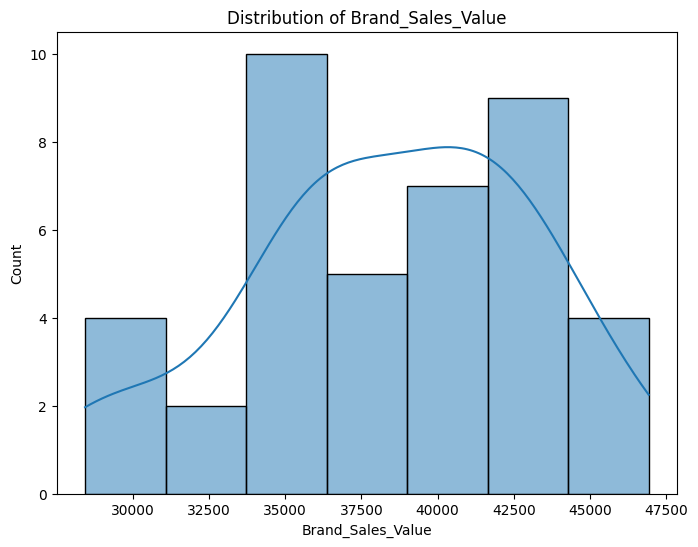

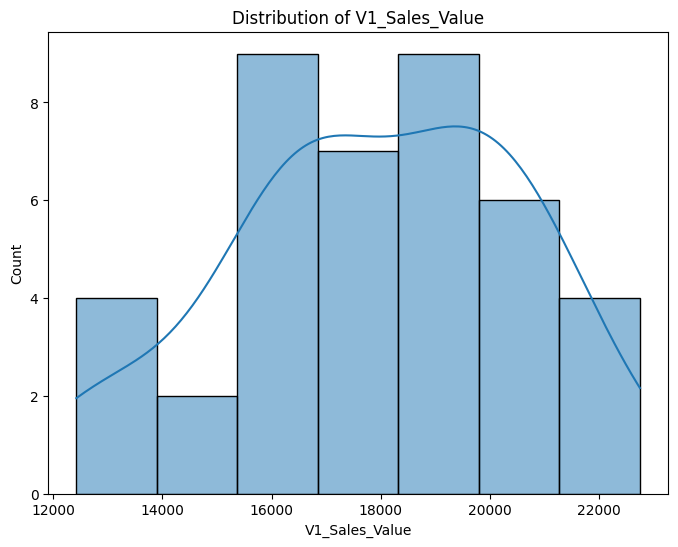

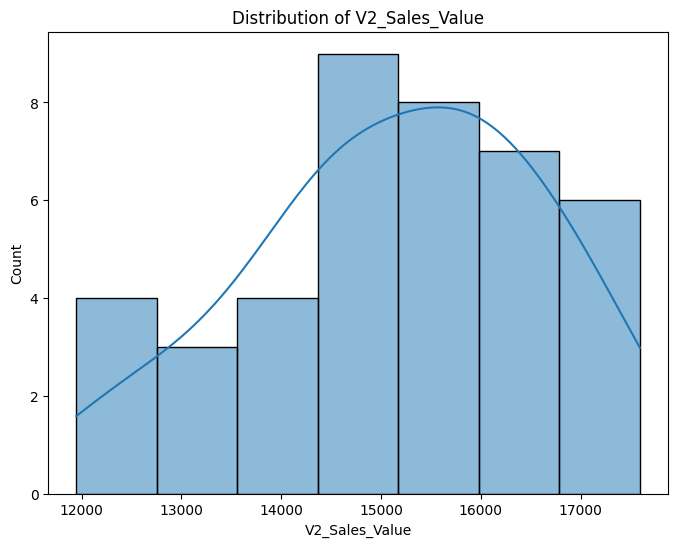

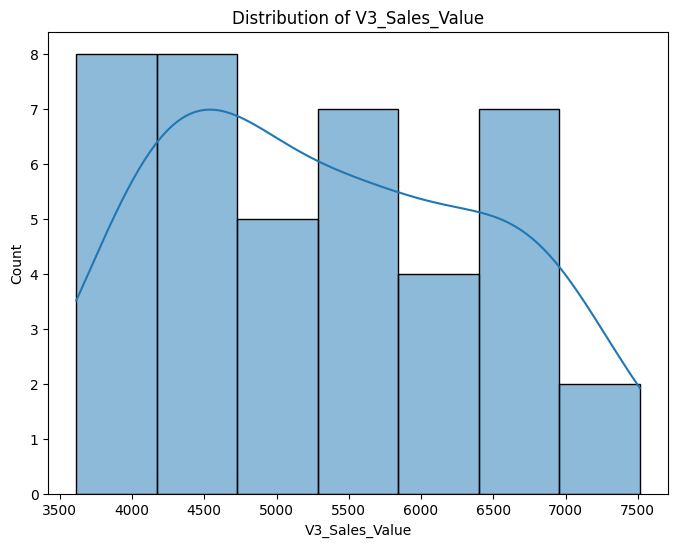

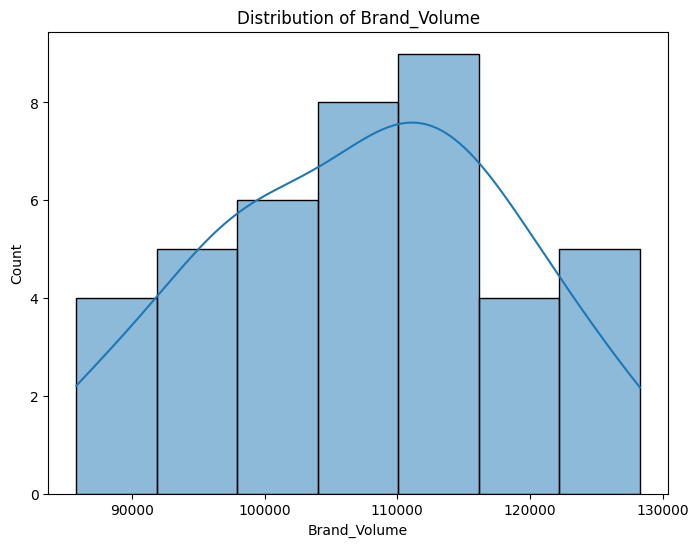

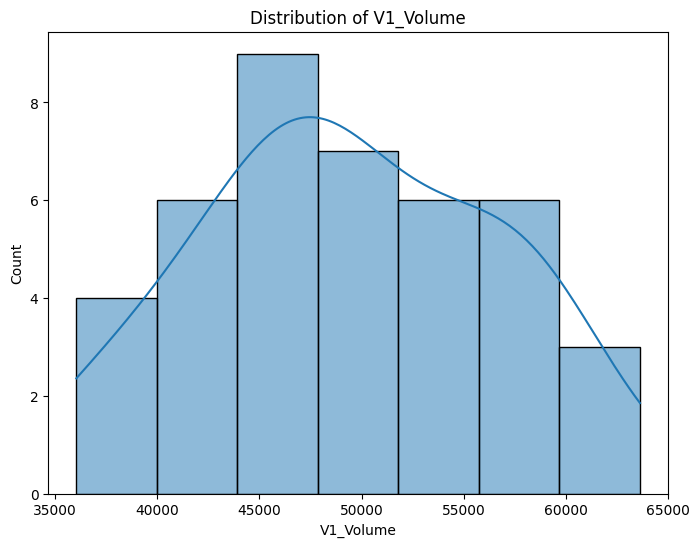

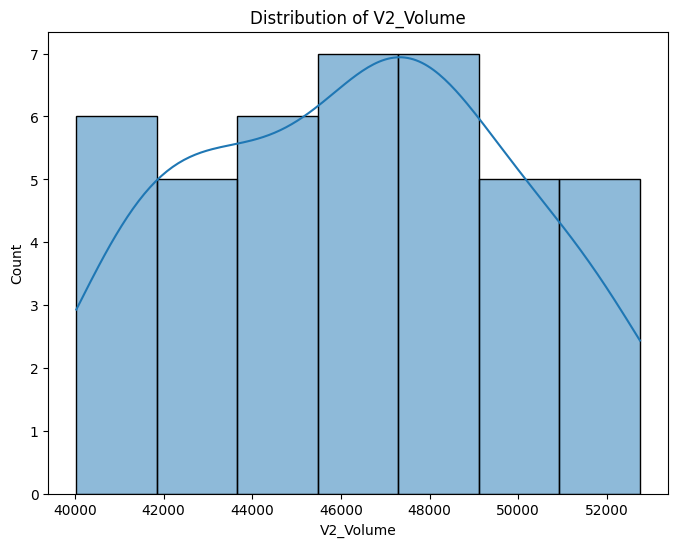

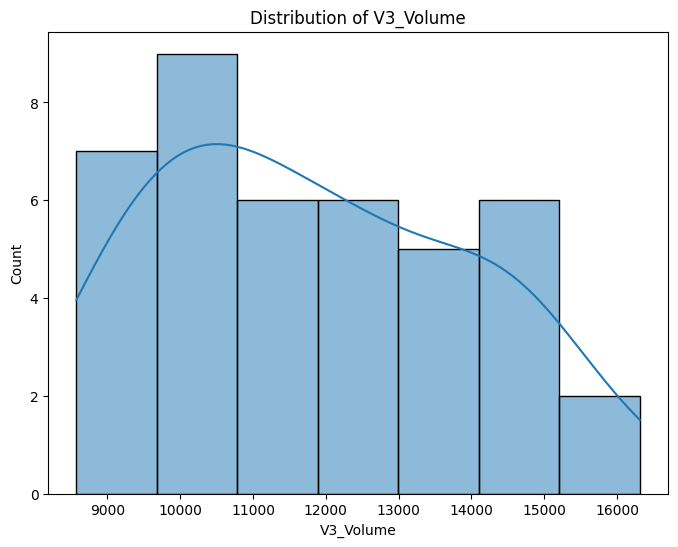

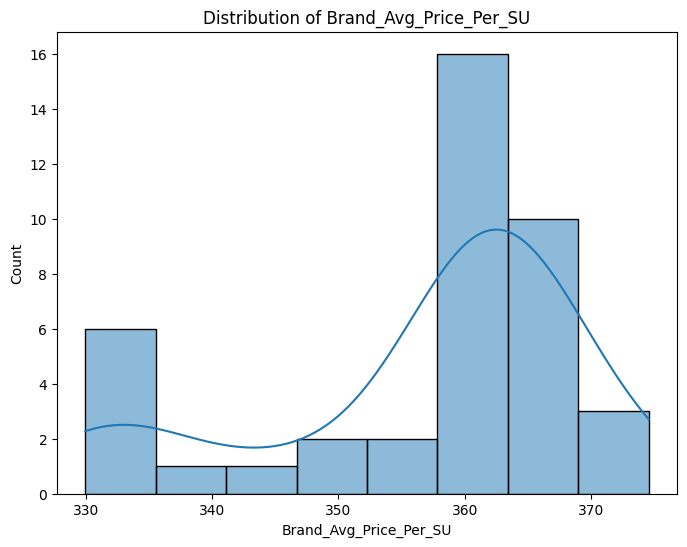

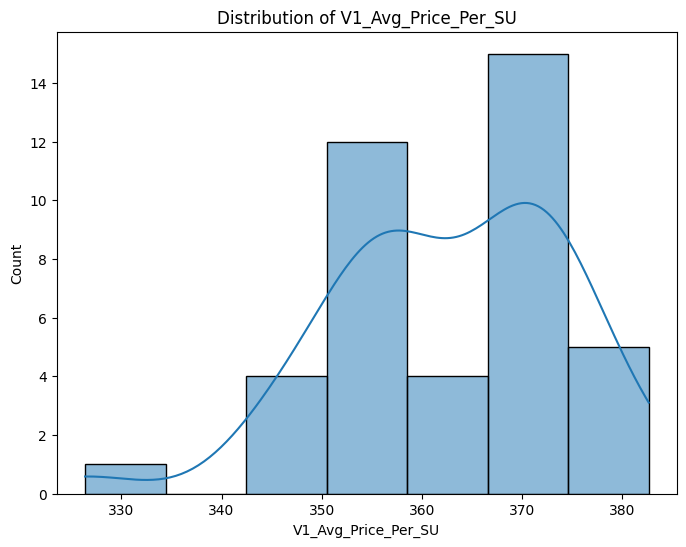

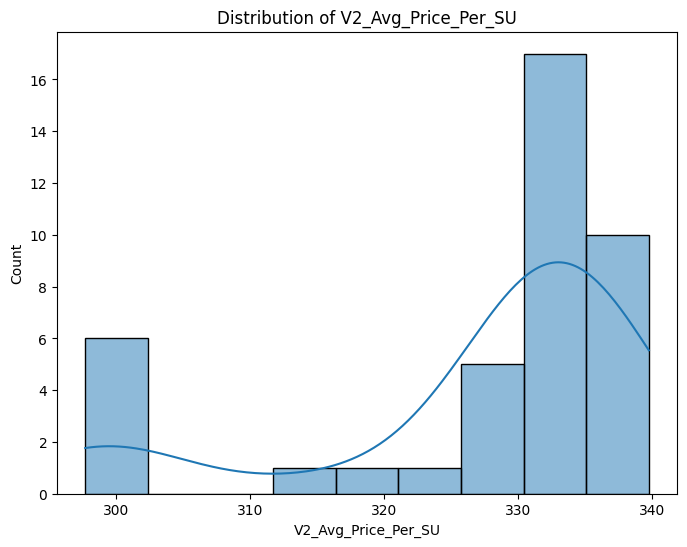

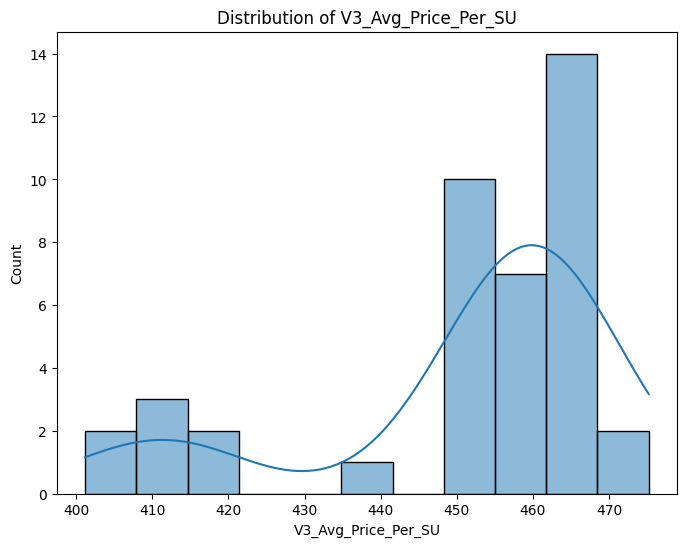

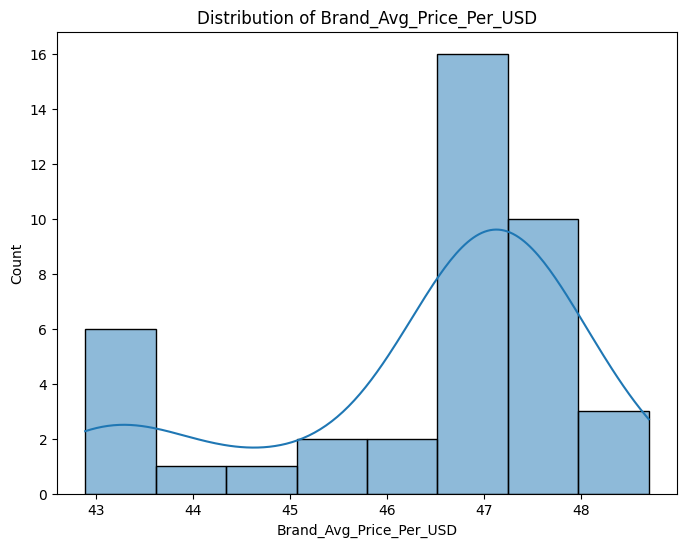

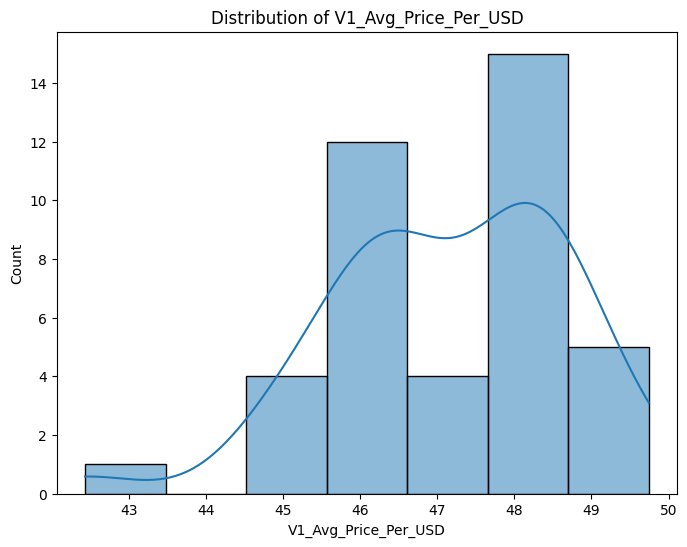

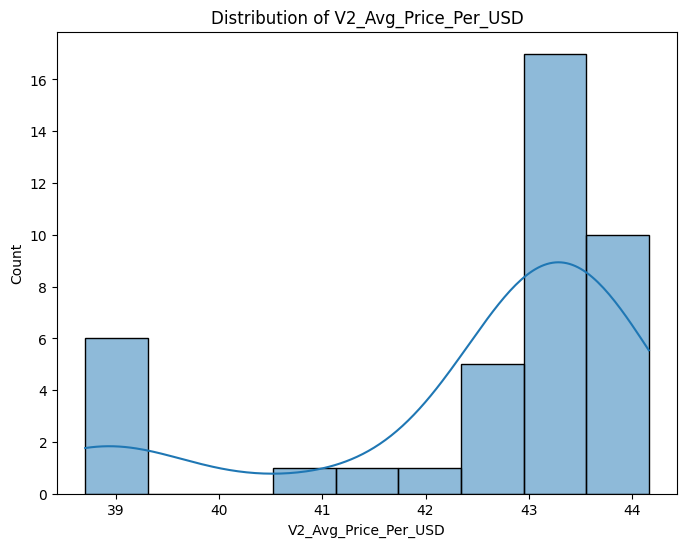

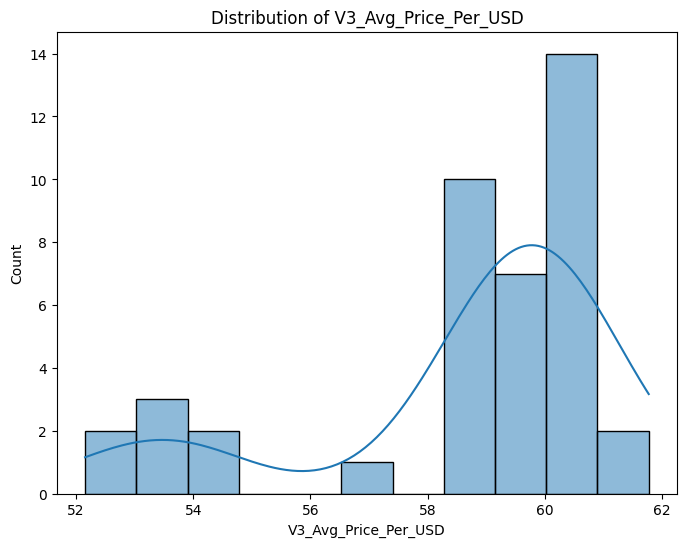

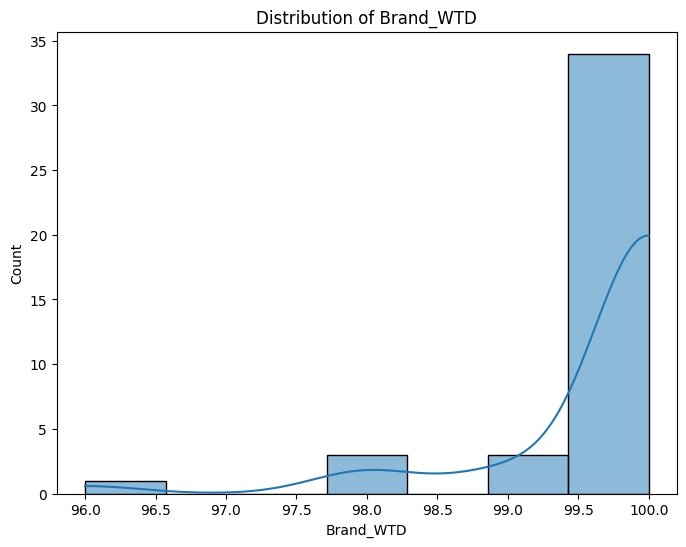

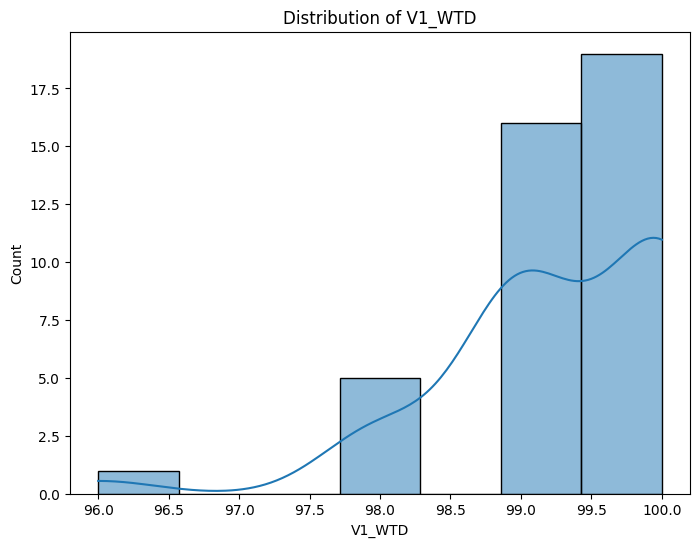

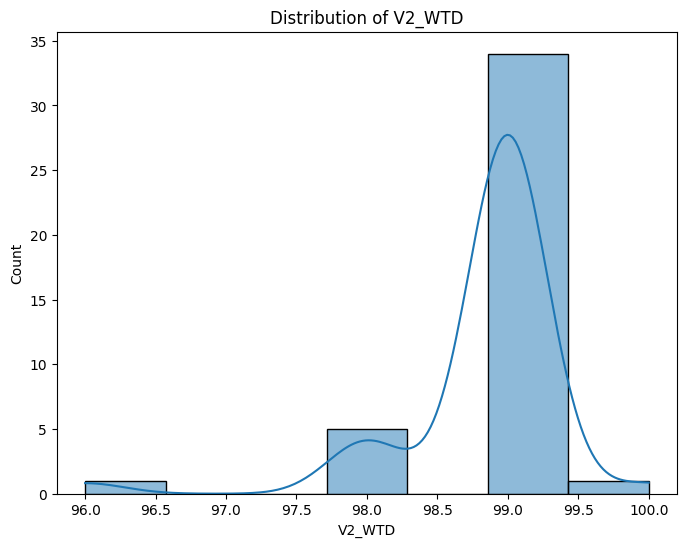

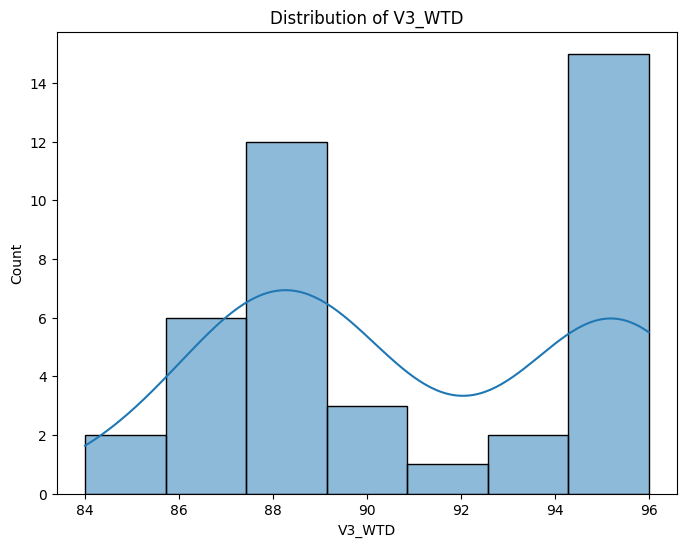

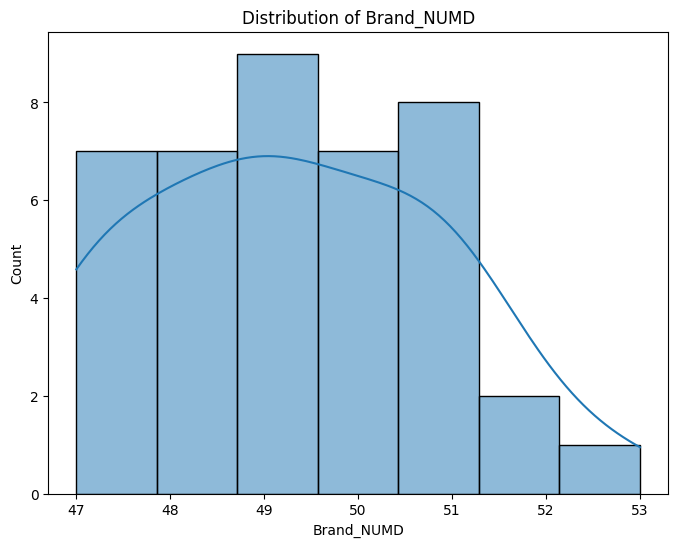

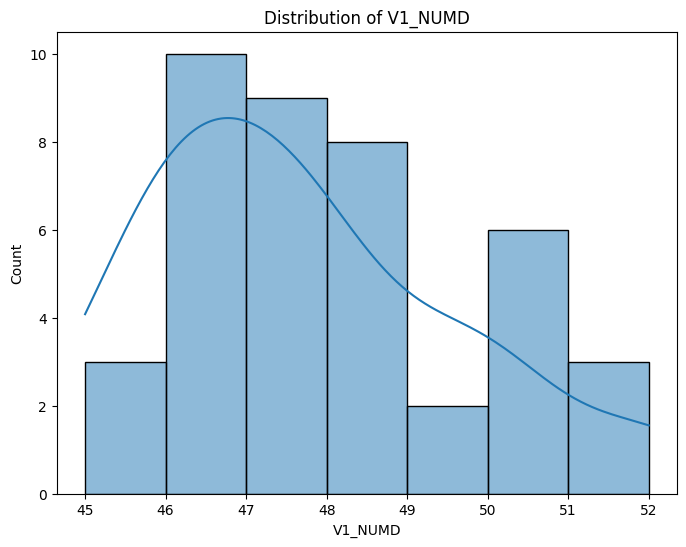

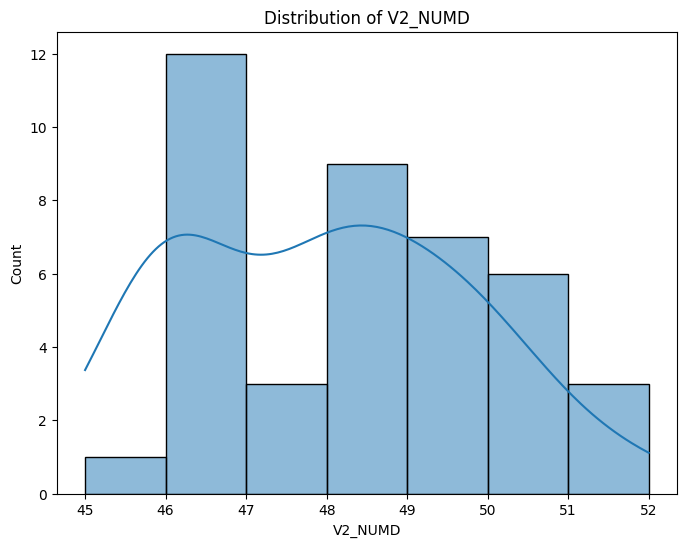

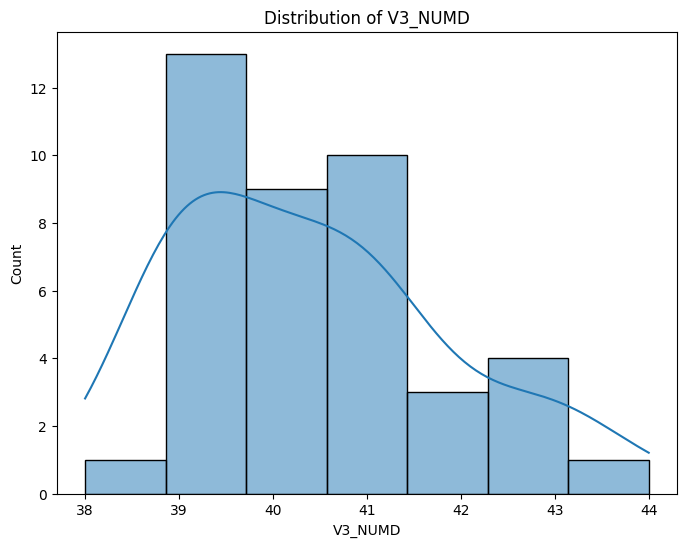

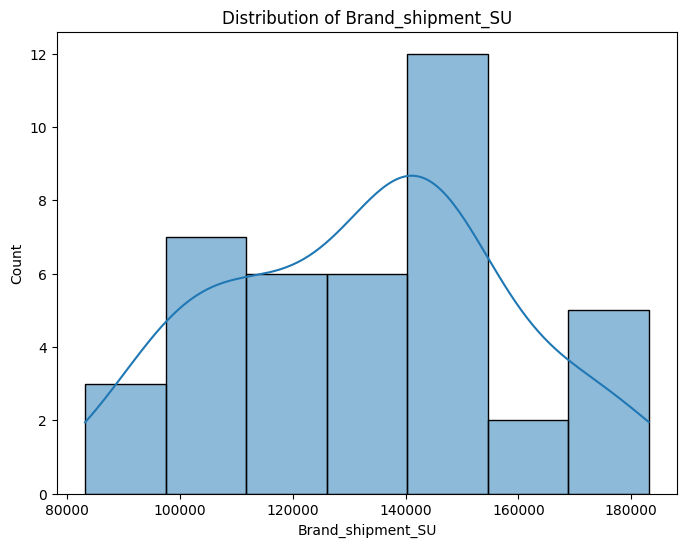

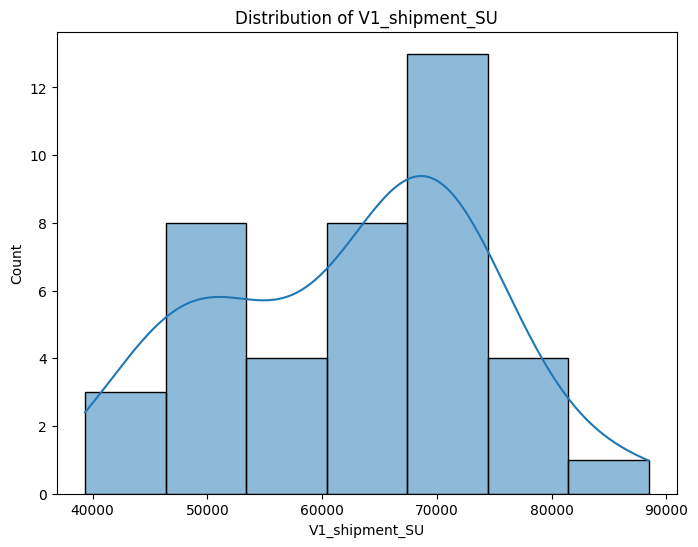

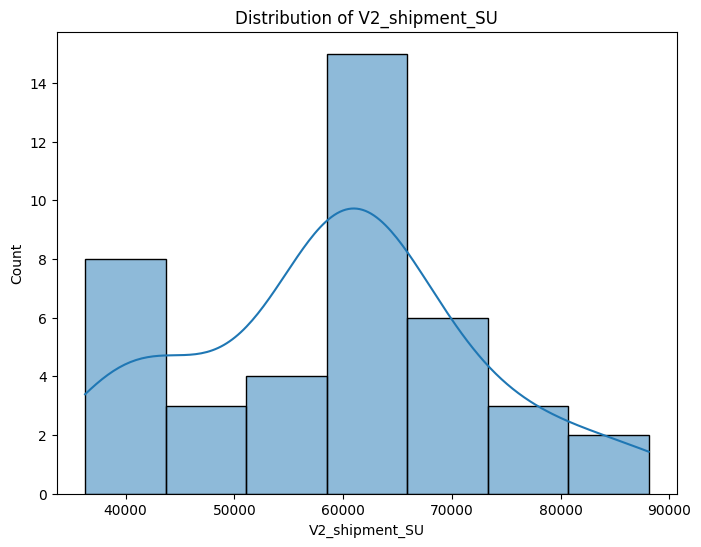

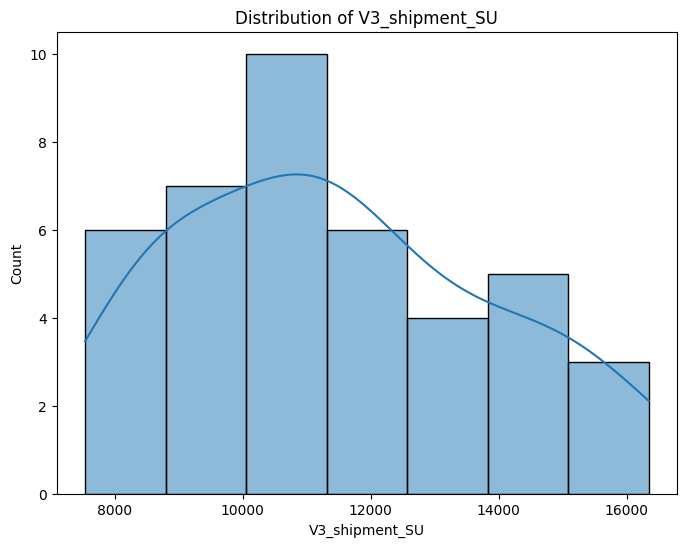

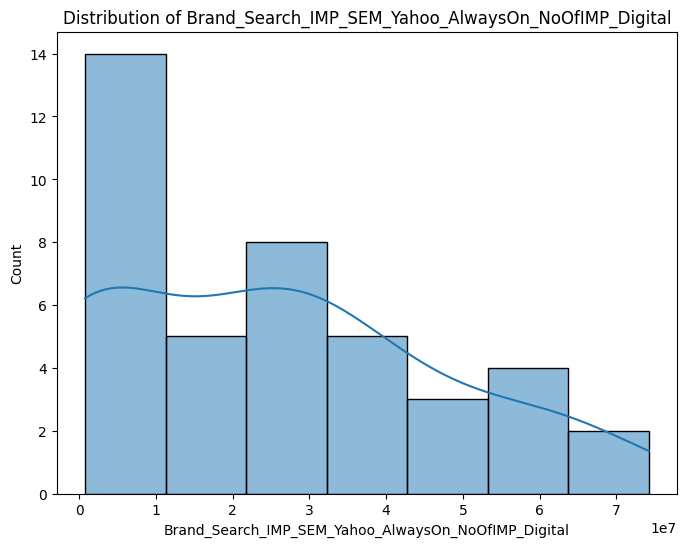

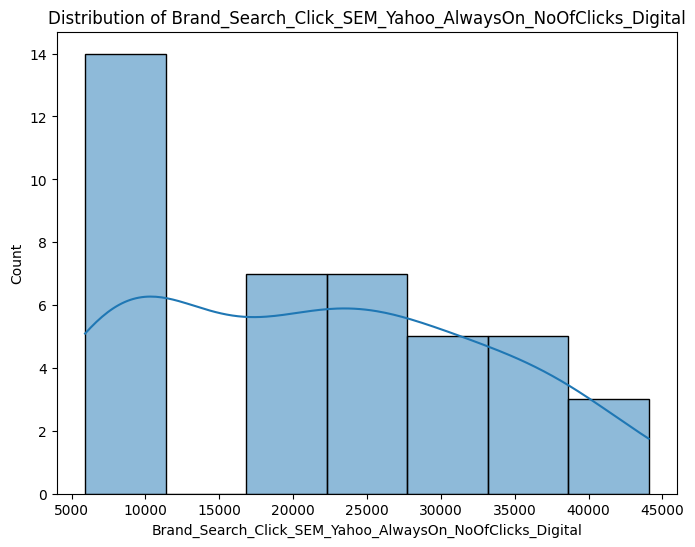

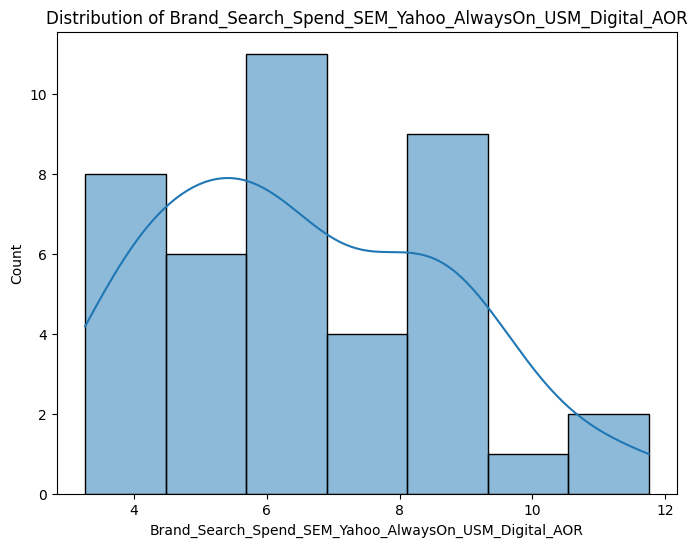

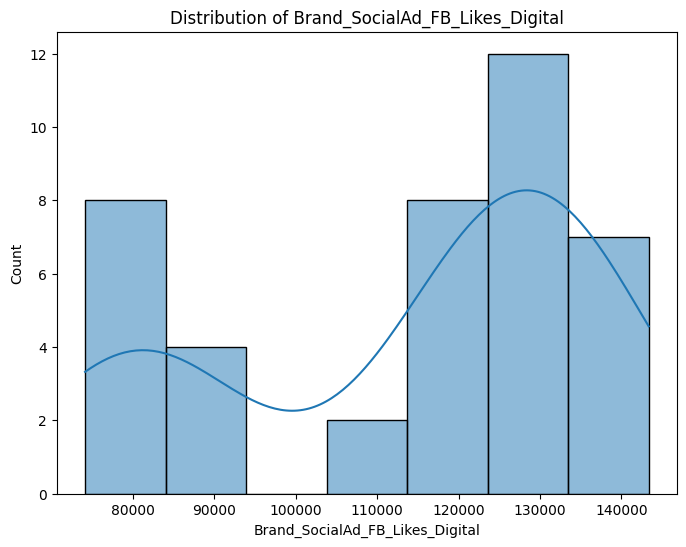

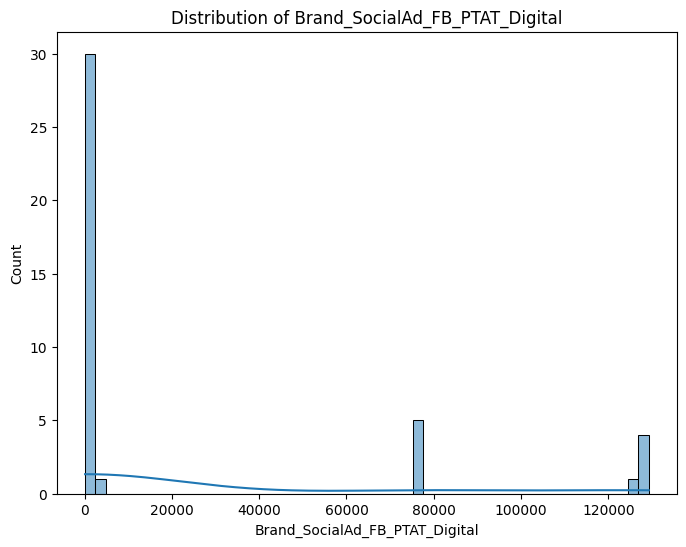

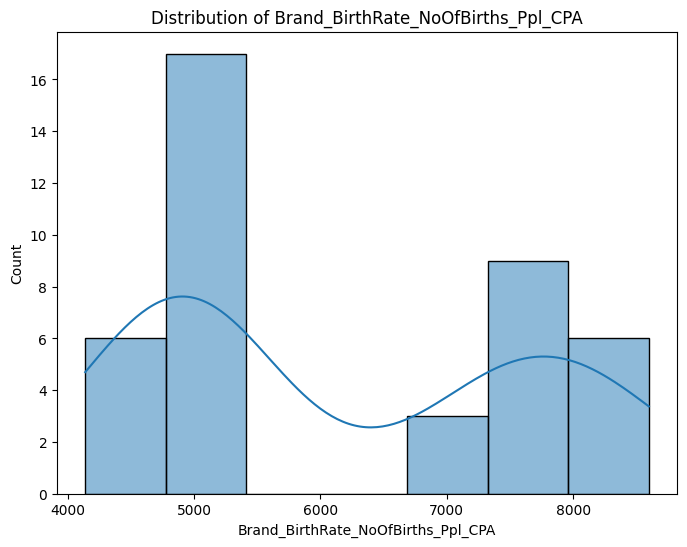

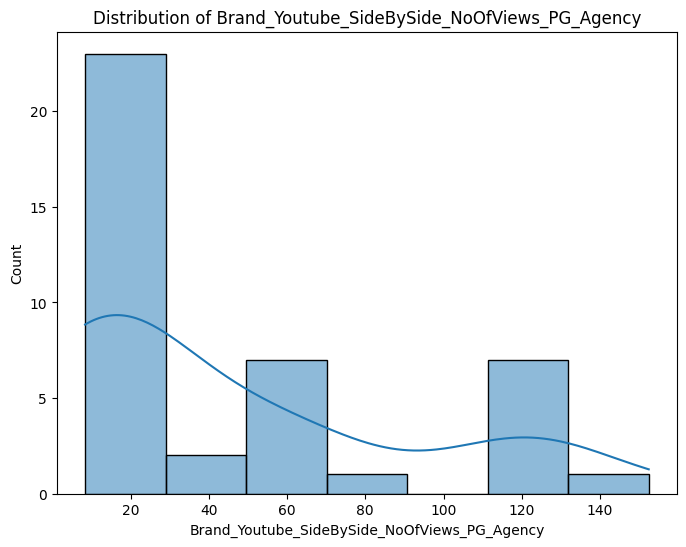

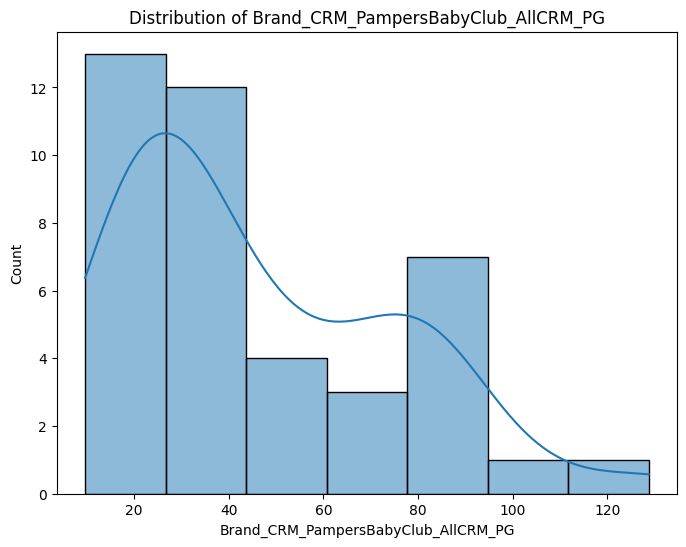

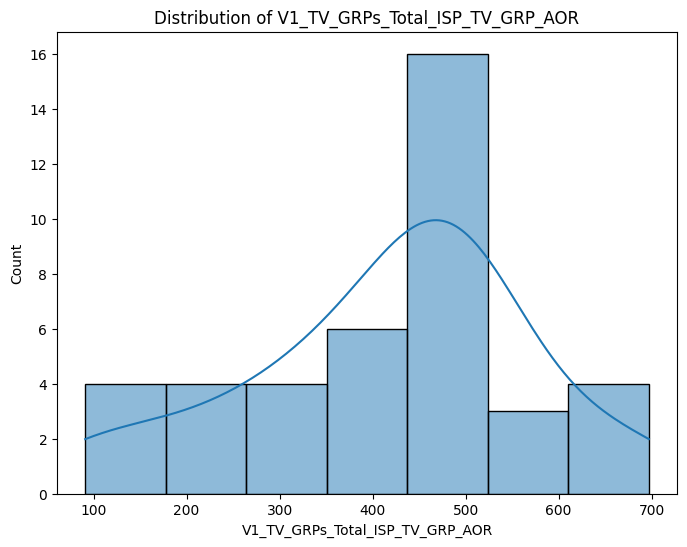

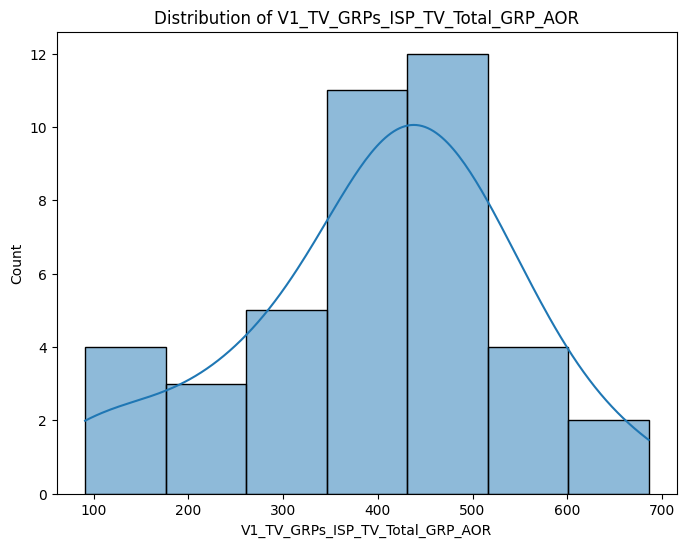

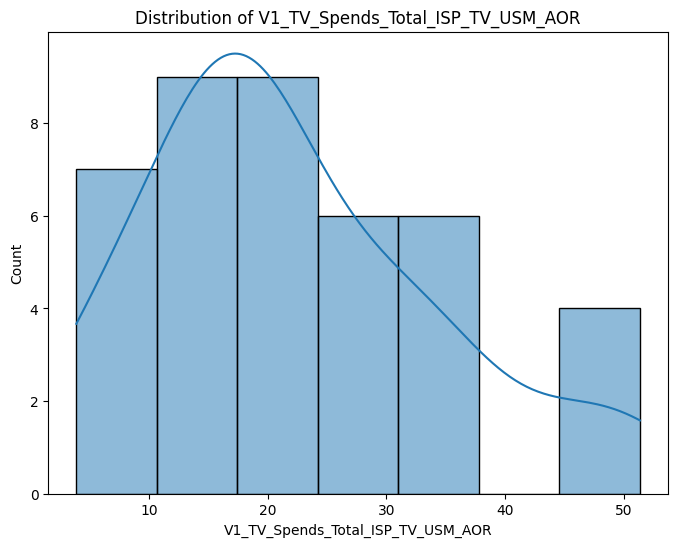

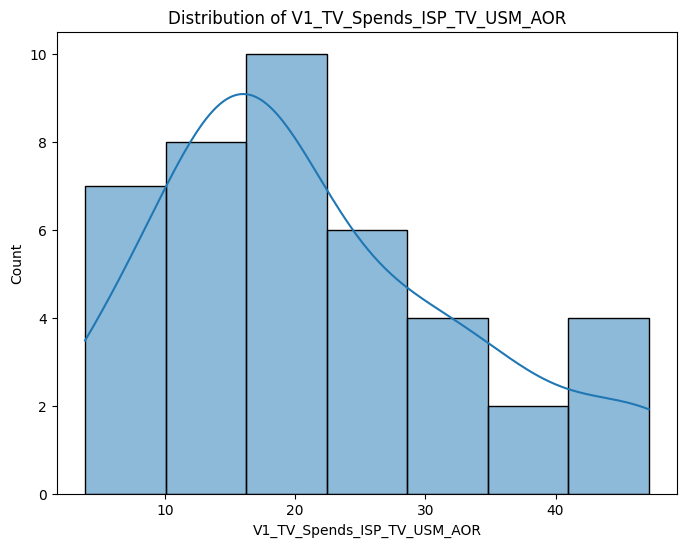

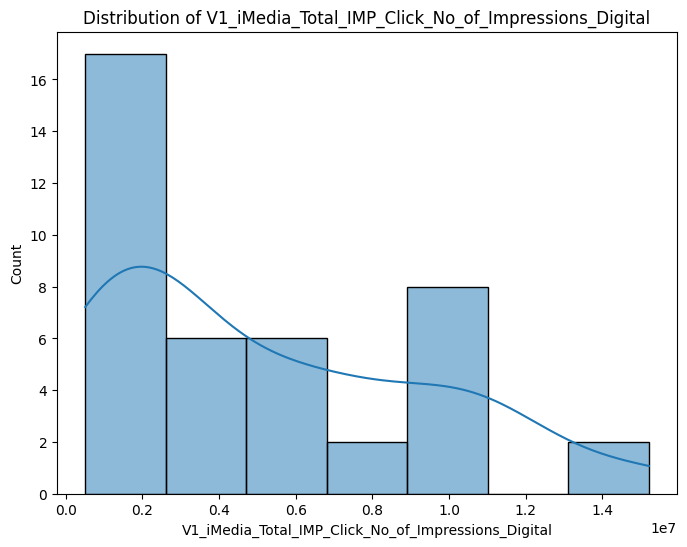

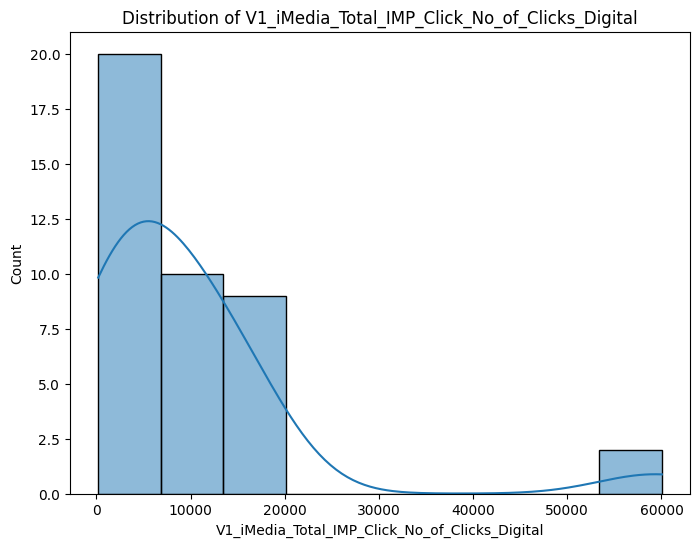

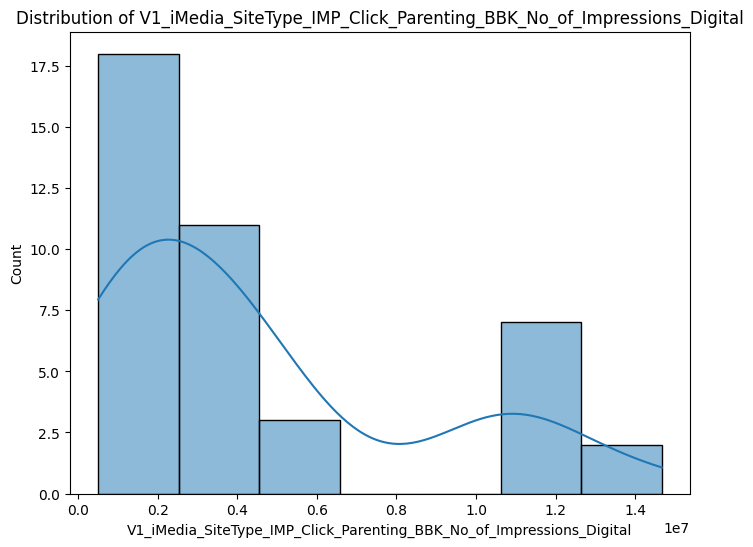

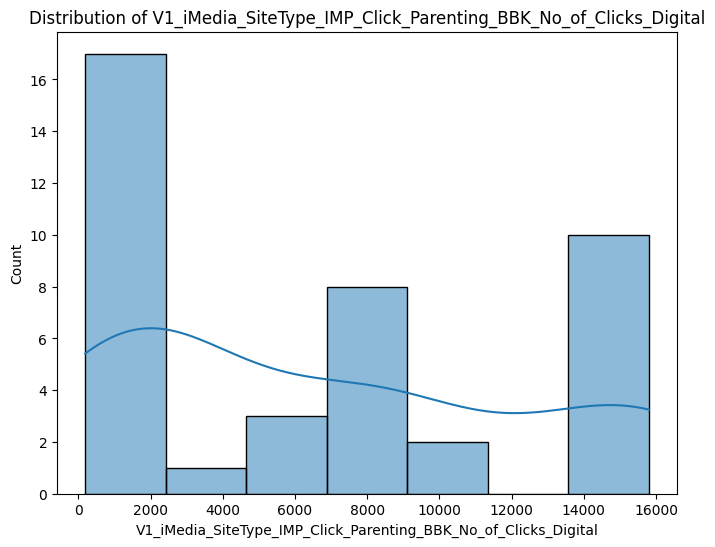

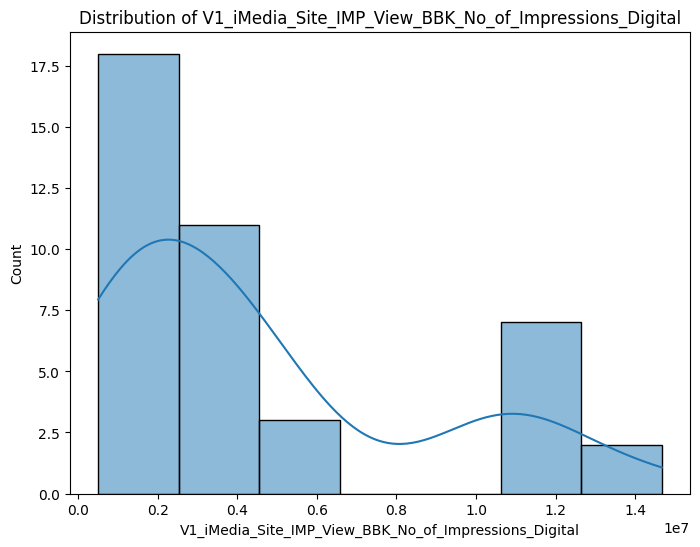

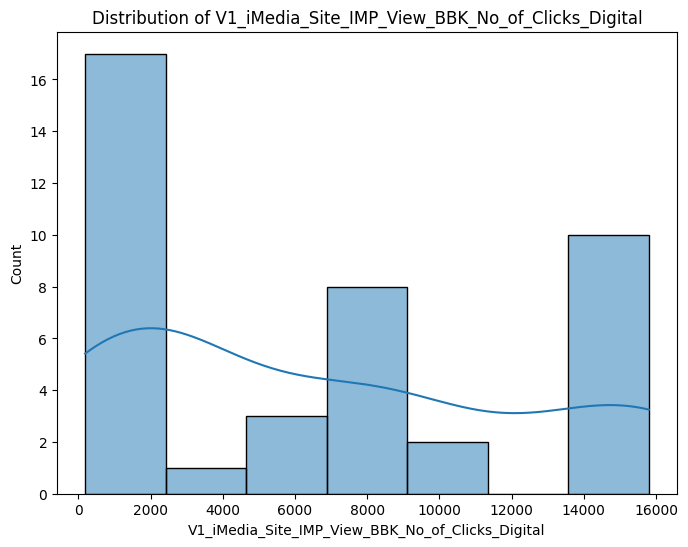

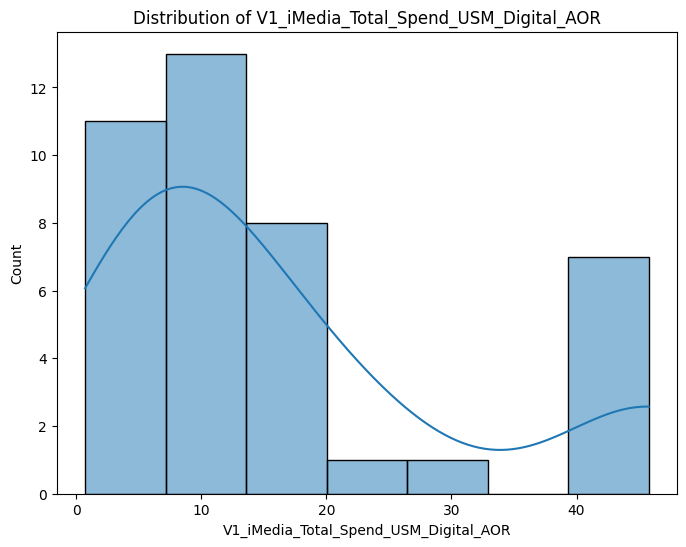

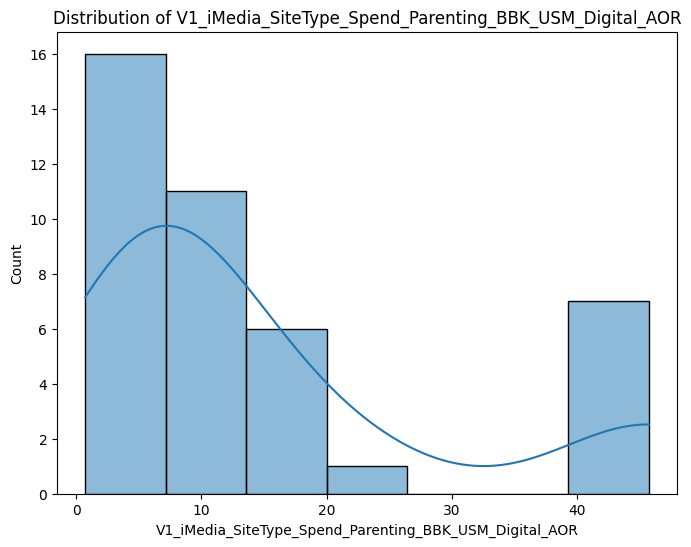

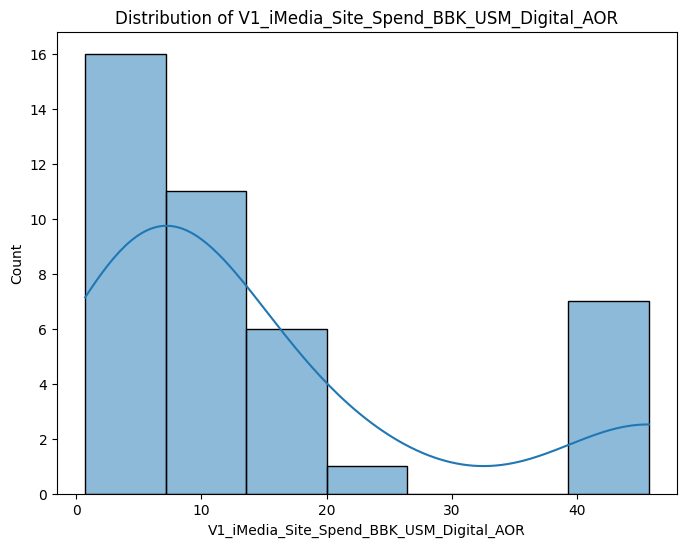

In [ ]:
# a. Histograms for numerical features
numerical_features = final_merged_df.select_dtypes(include=np.number).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(final_merged_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Outlier Analysis Using Box Plot**

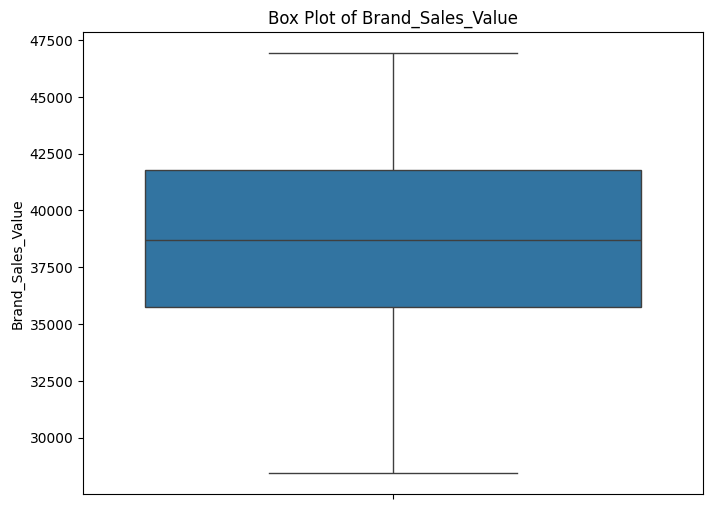

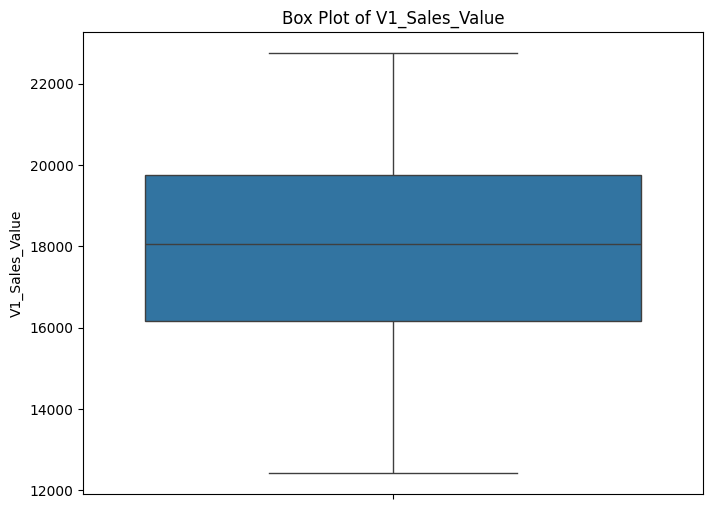

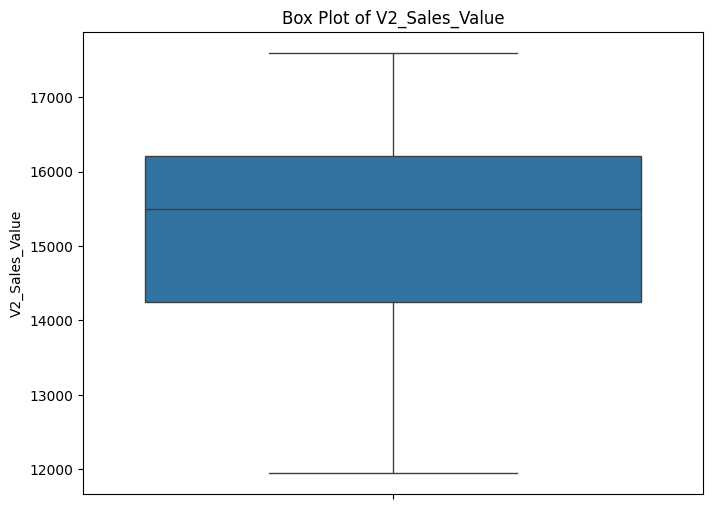

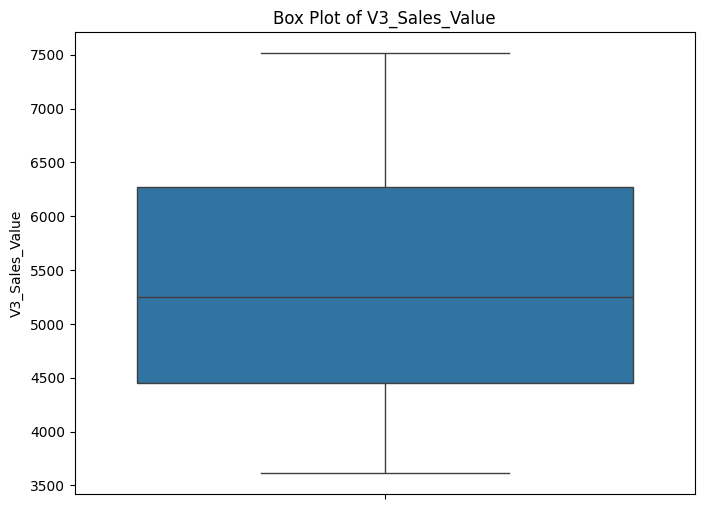

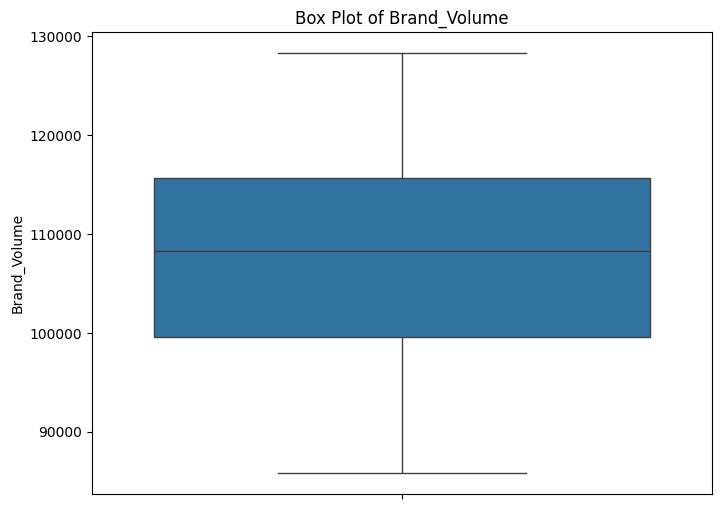

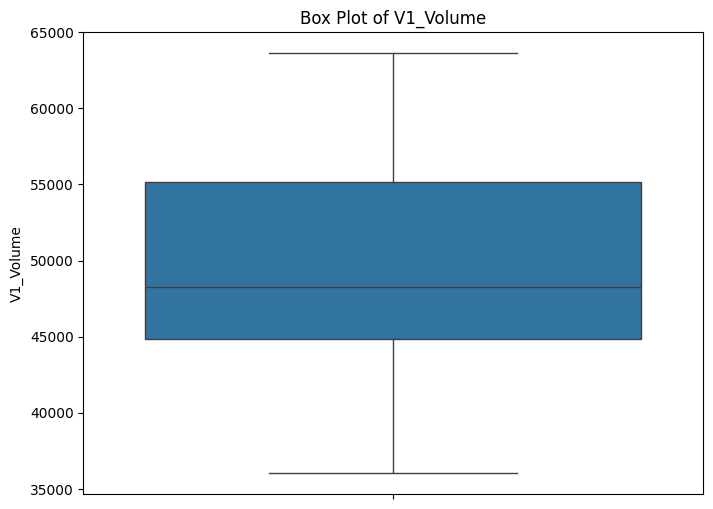

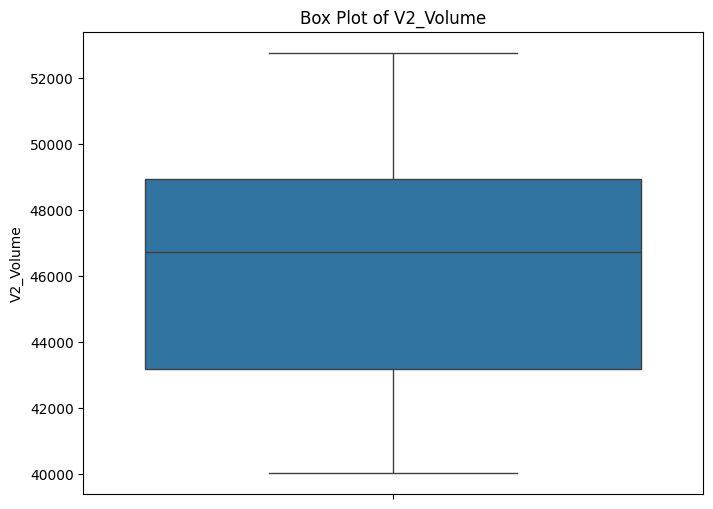

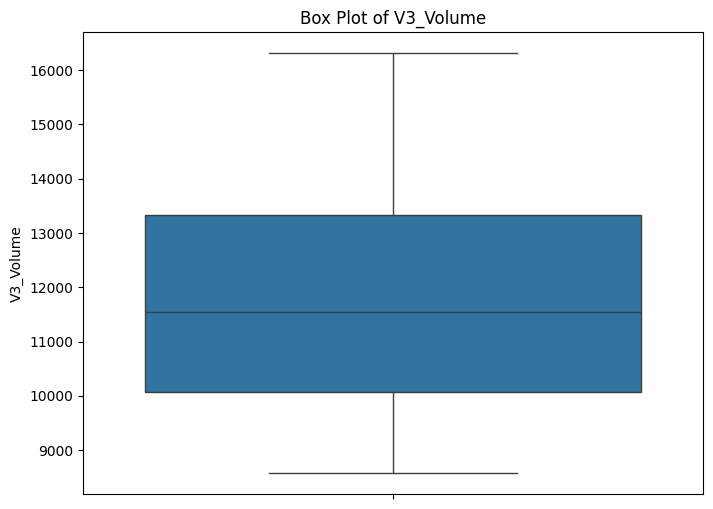

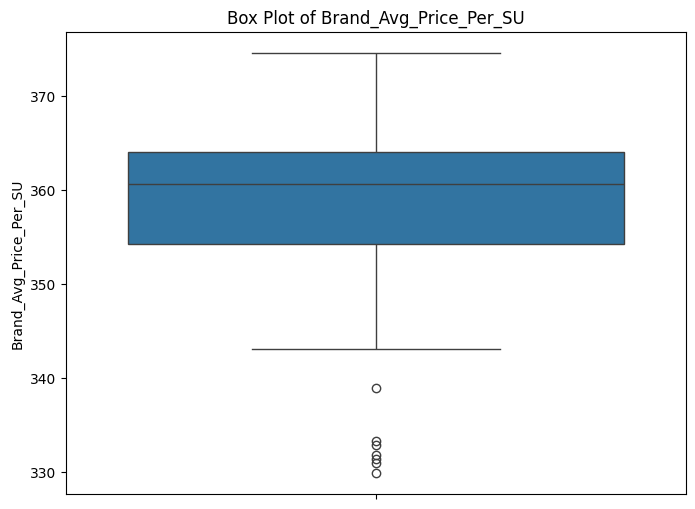

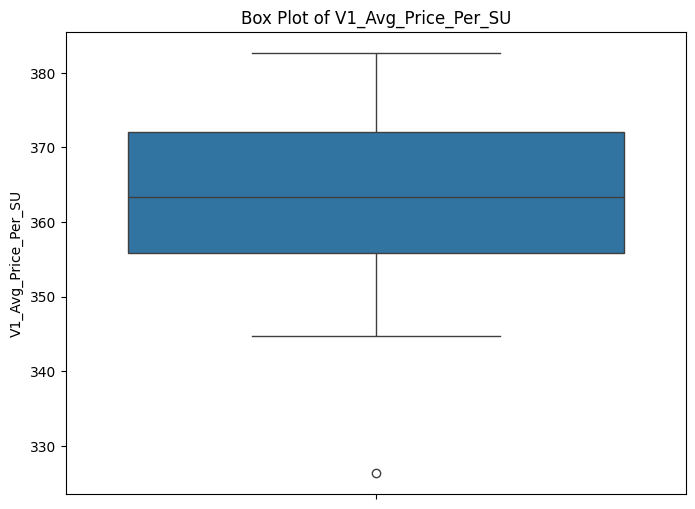

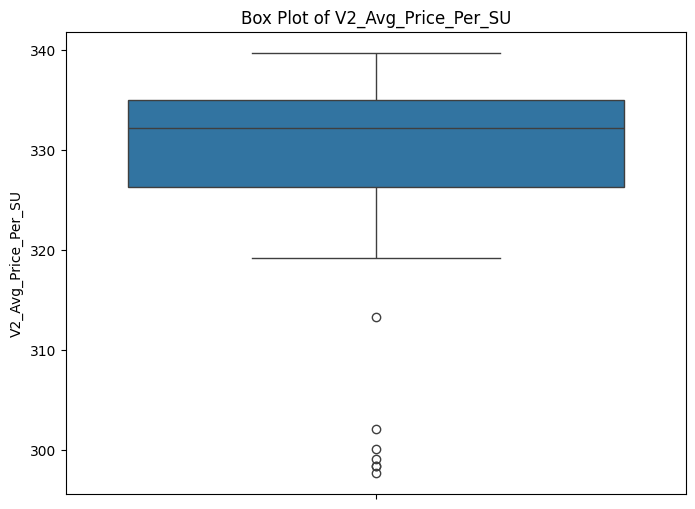

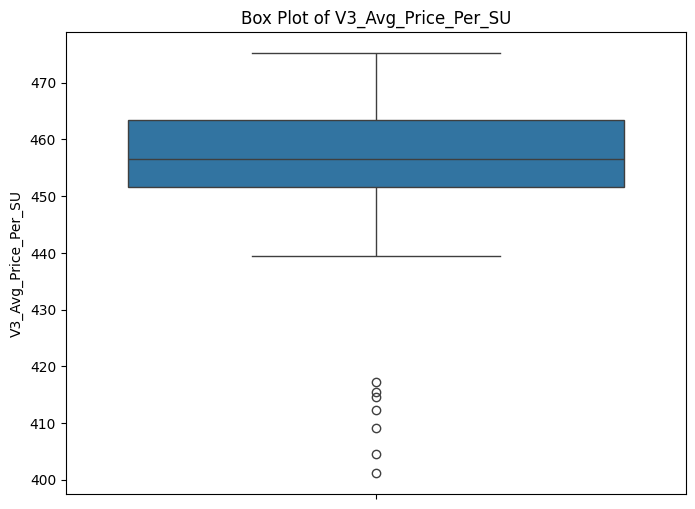

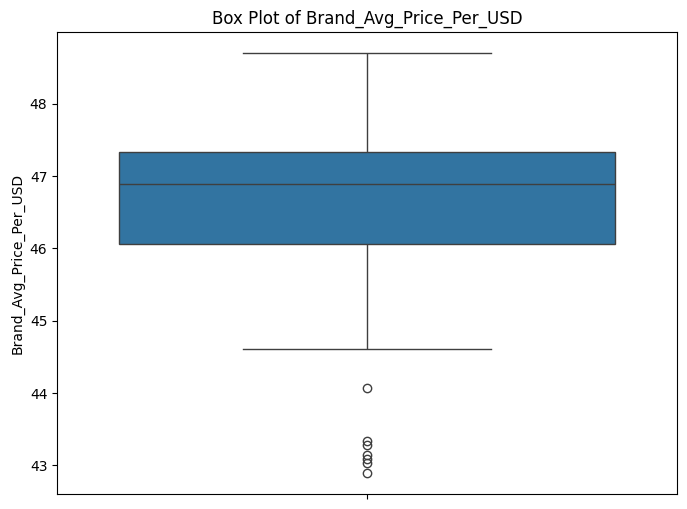

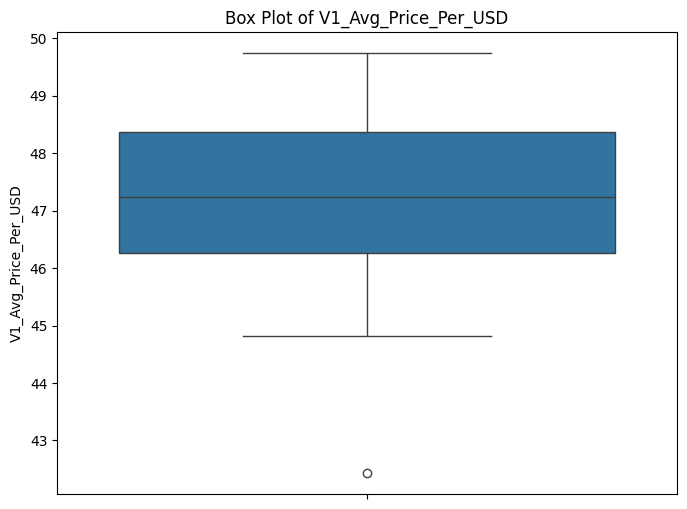

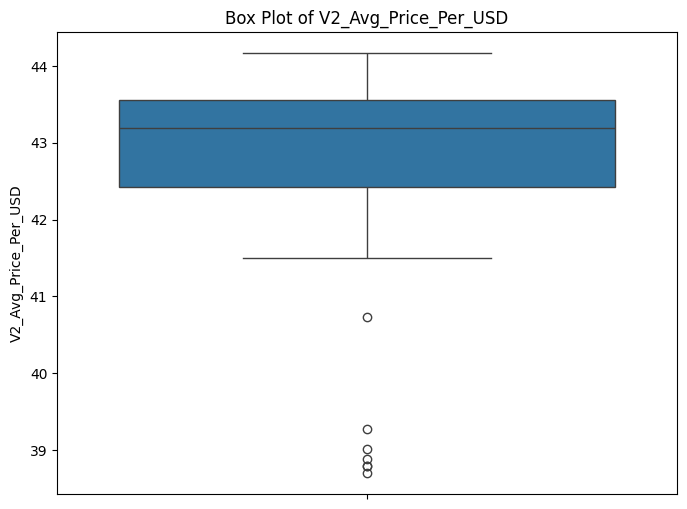

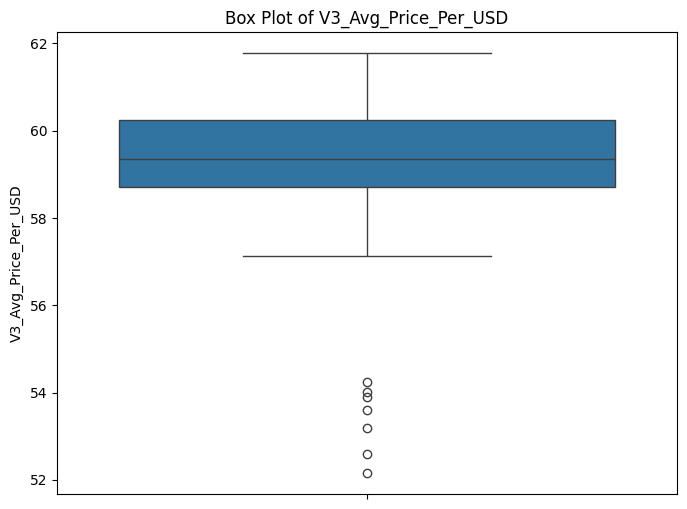

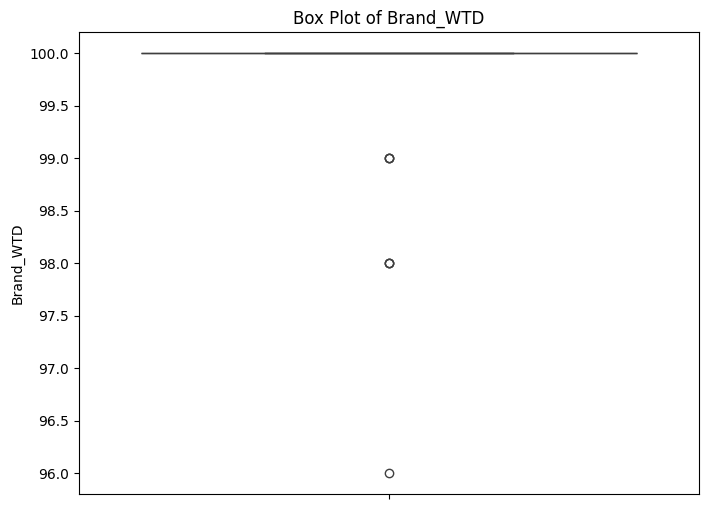

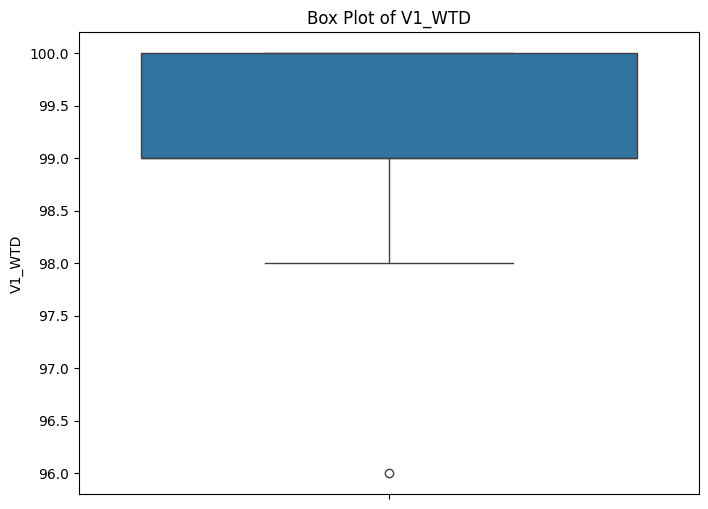

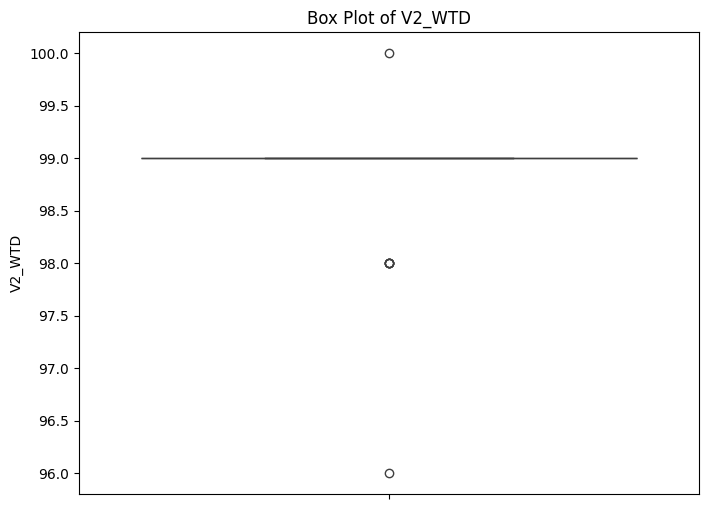

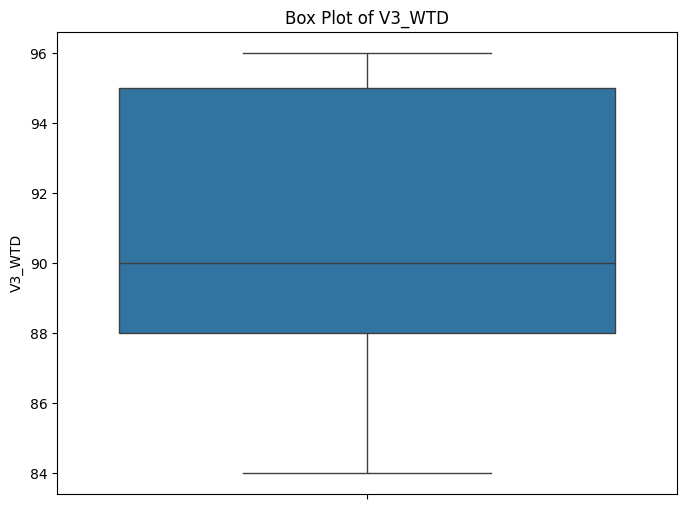

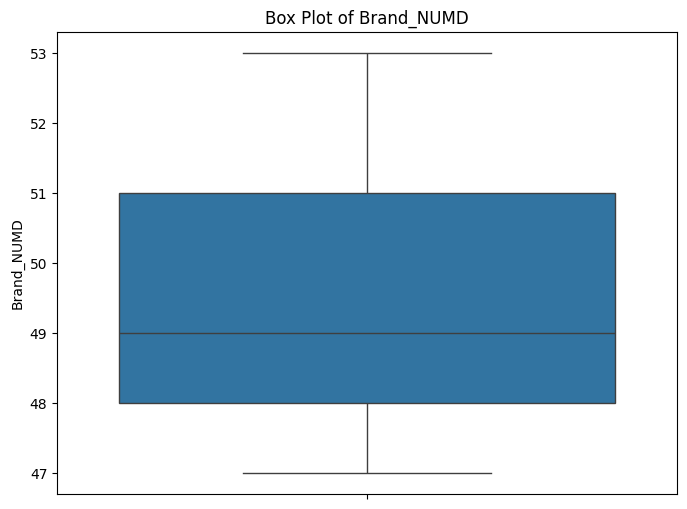

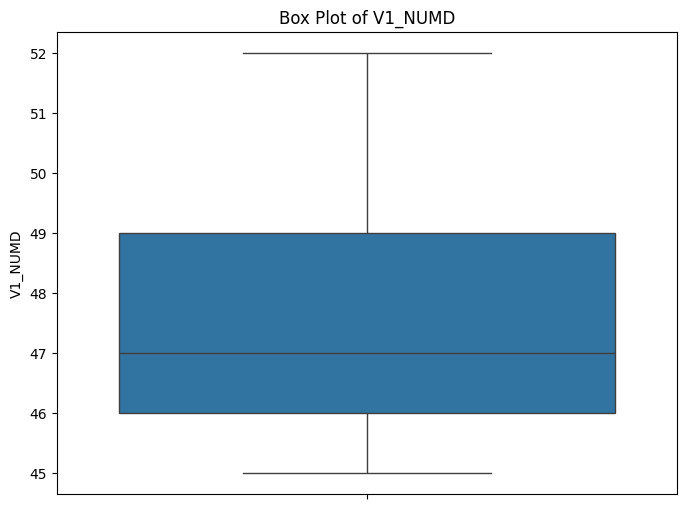

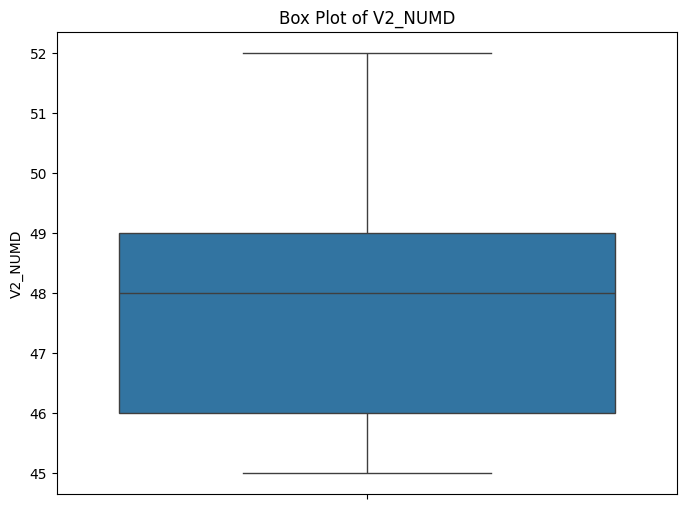

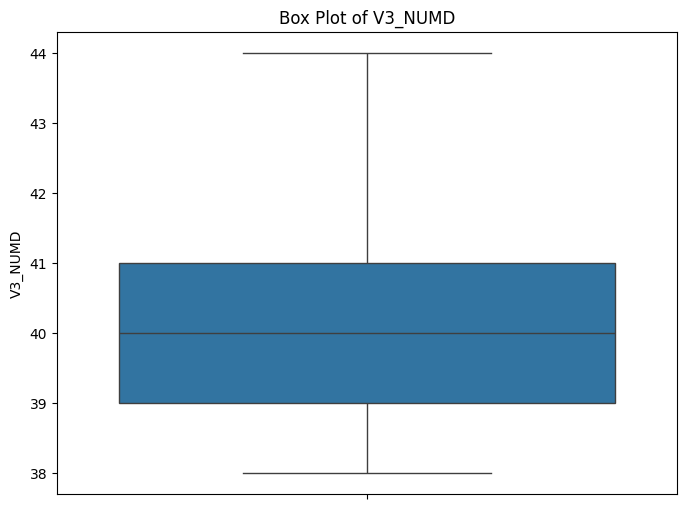

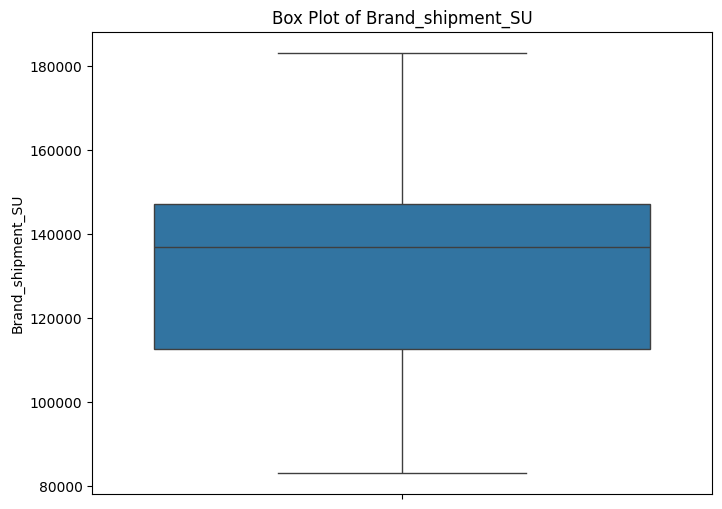

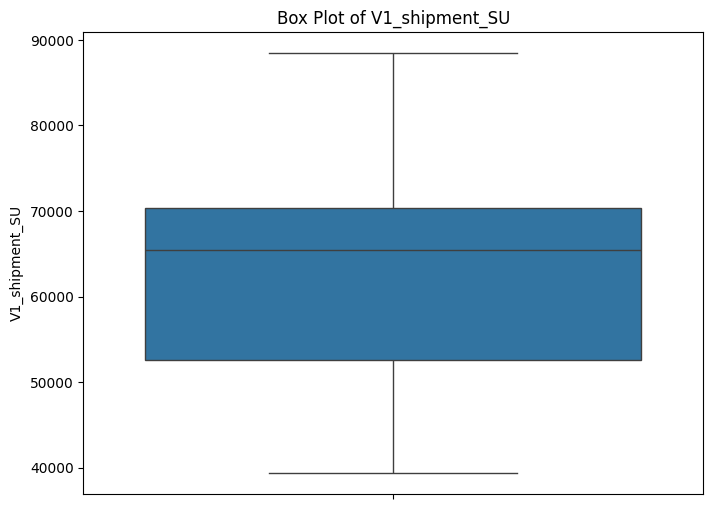

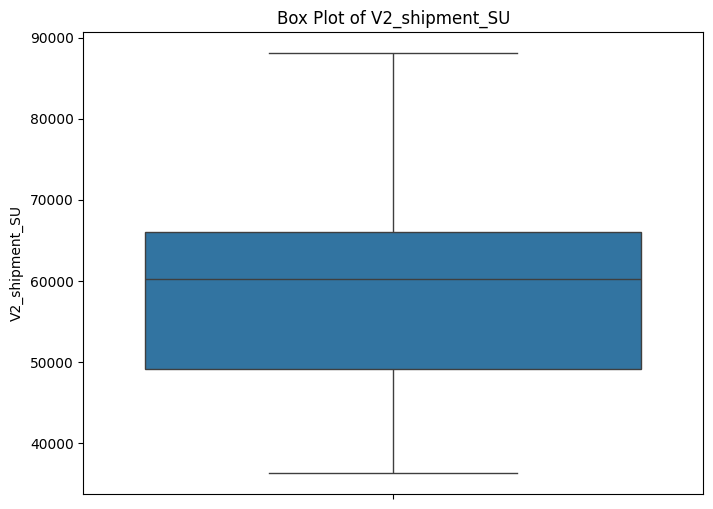

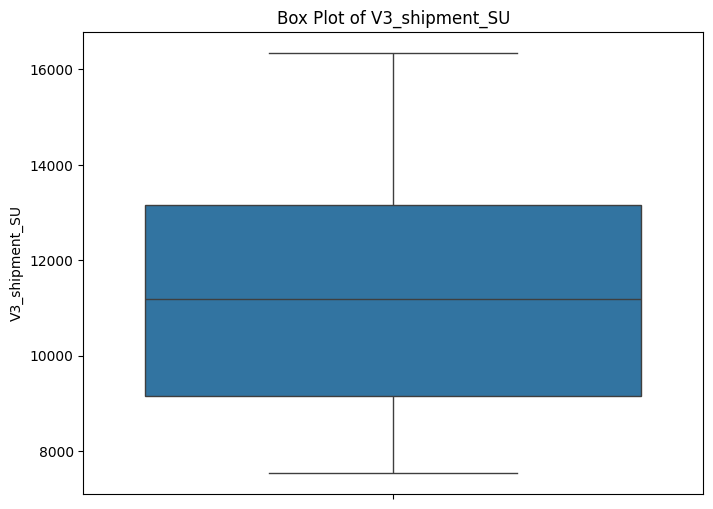

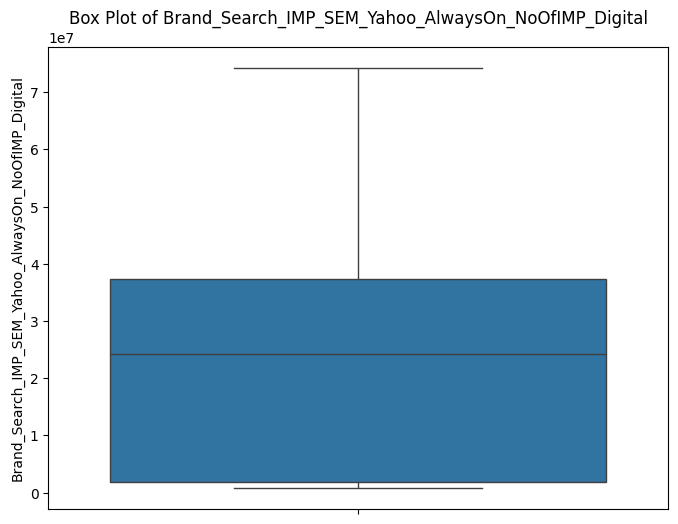

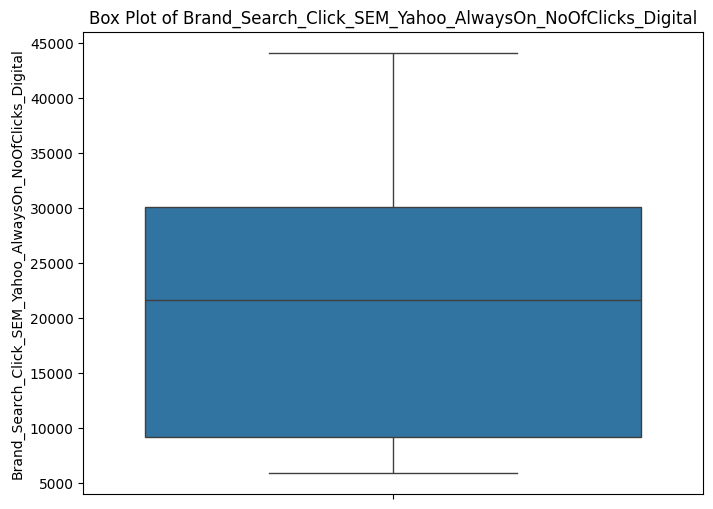

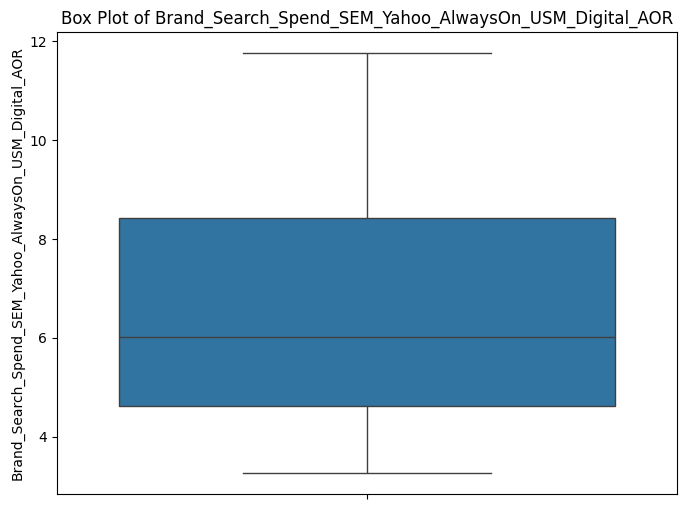

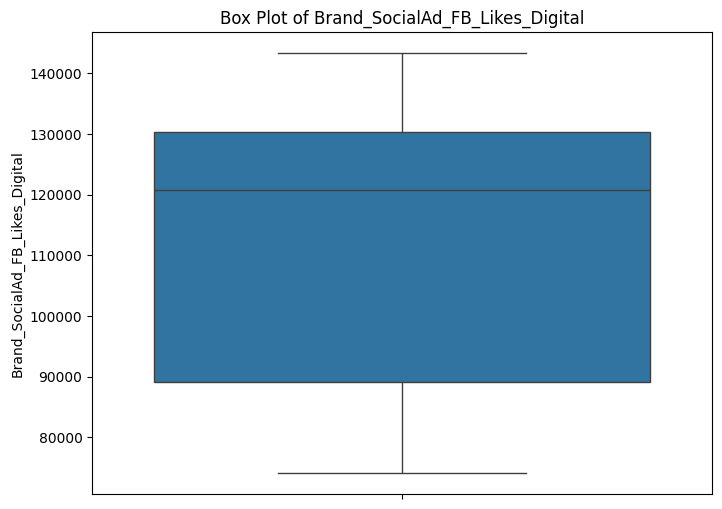

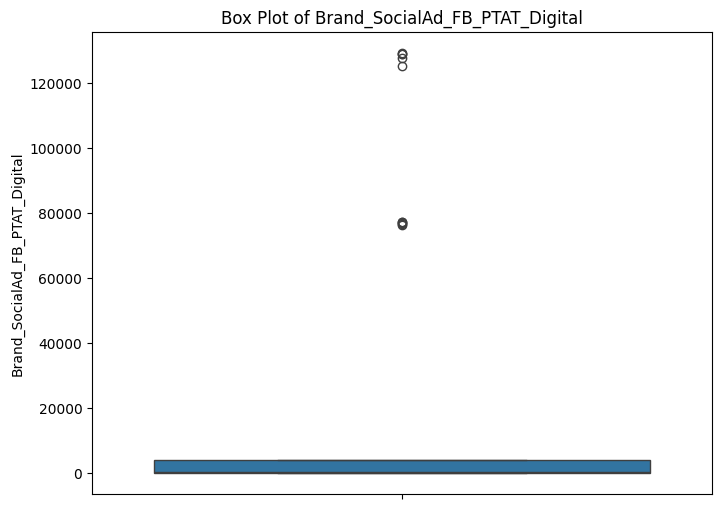

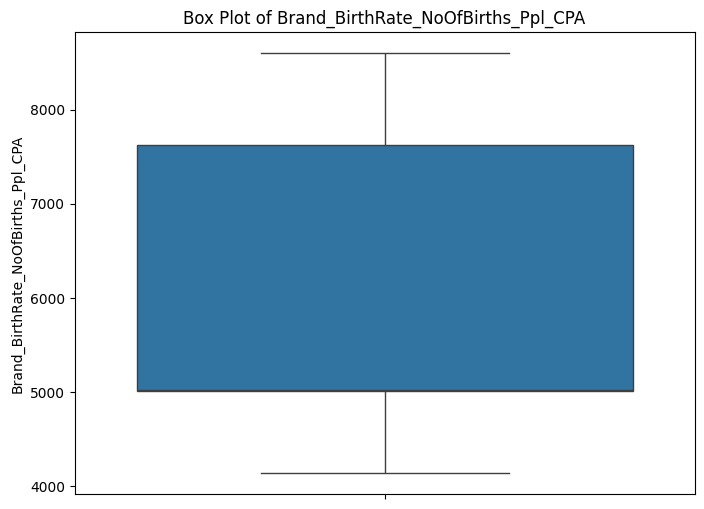

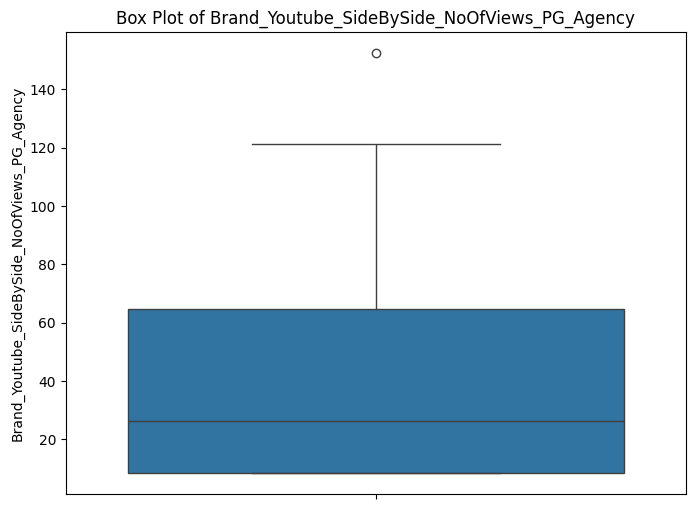

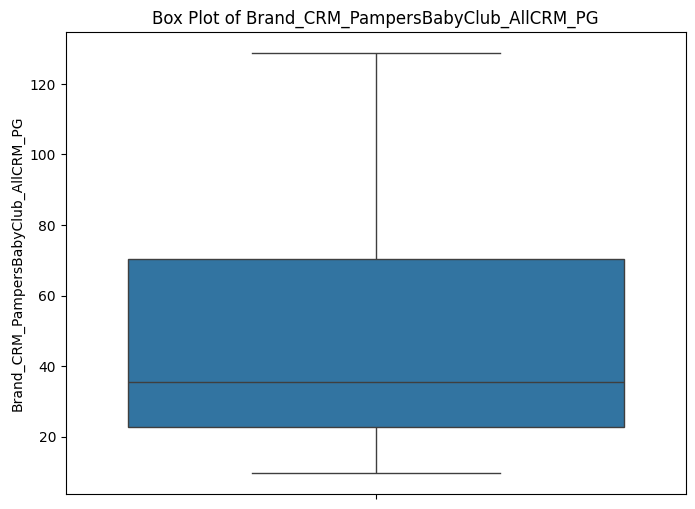

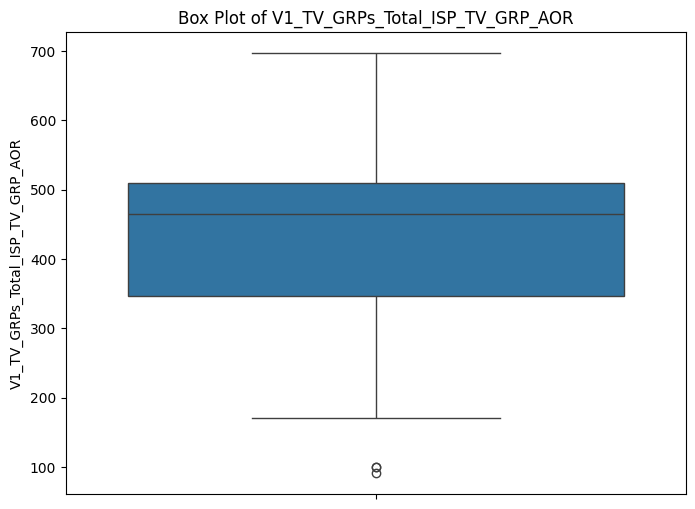

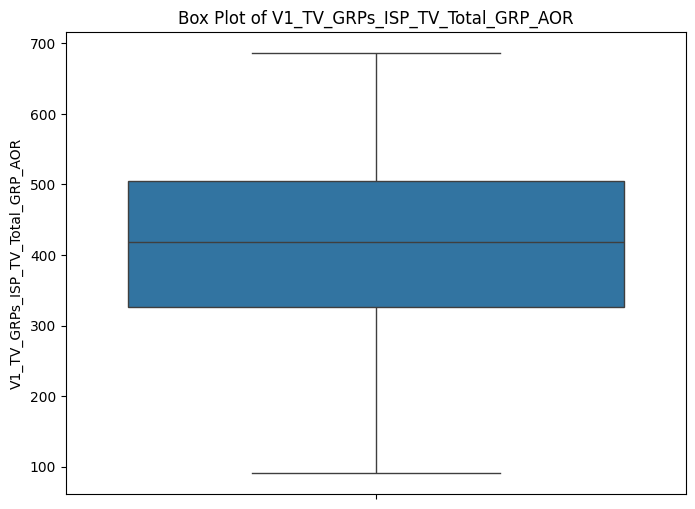

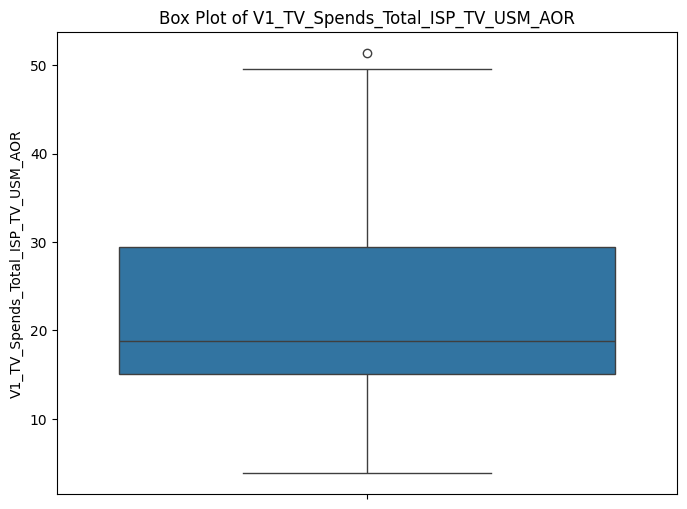

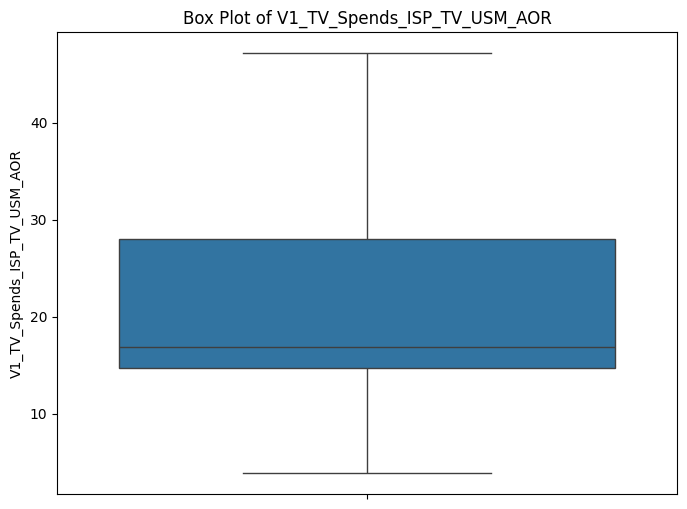

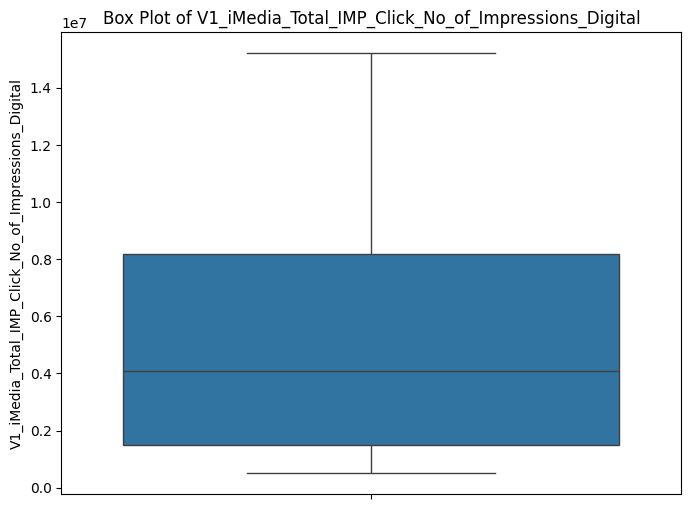

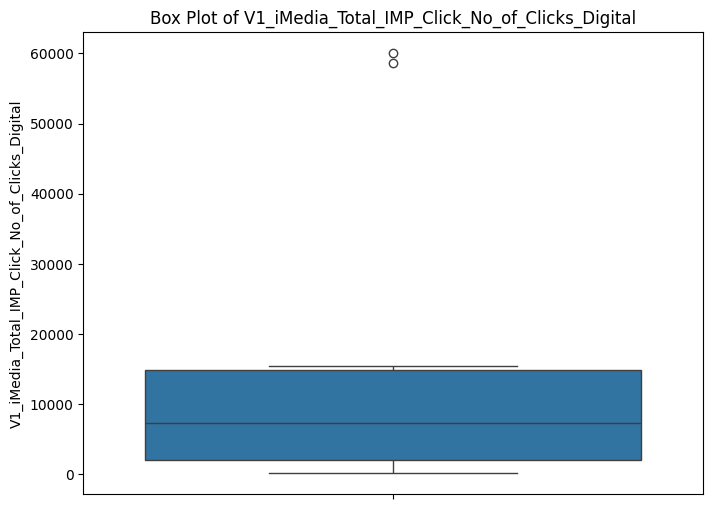

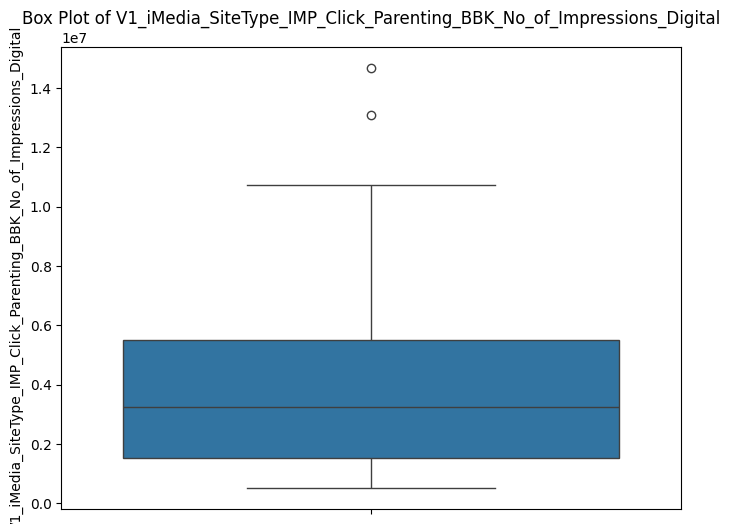

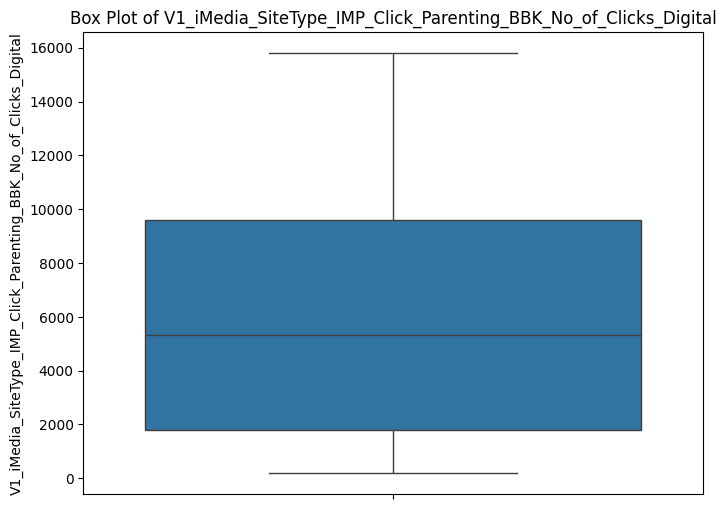

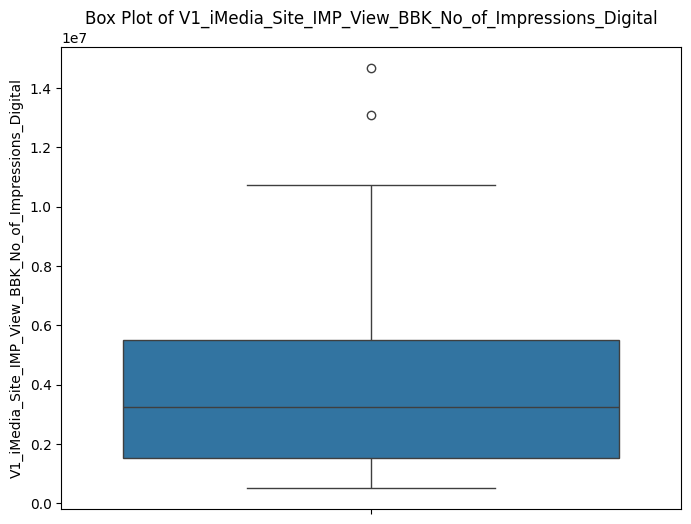

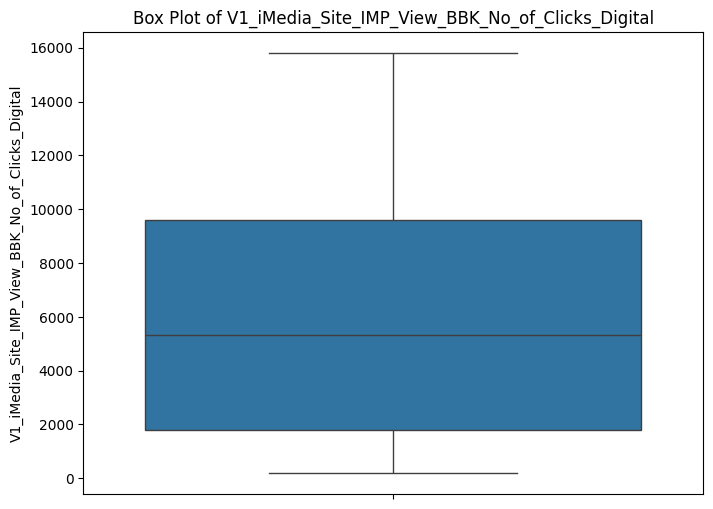

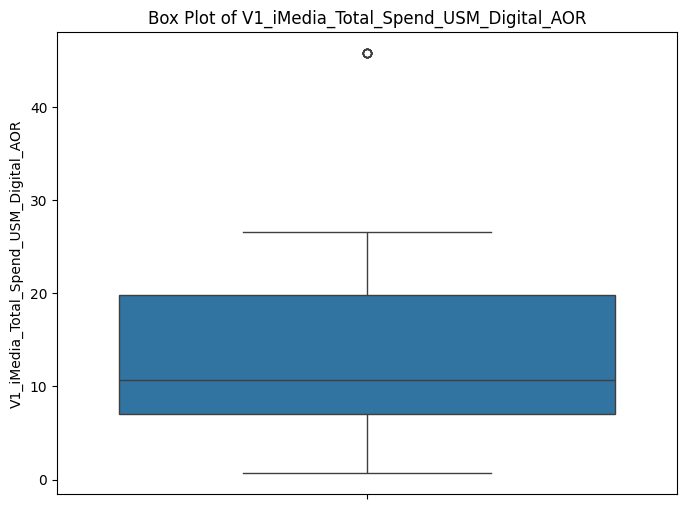

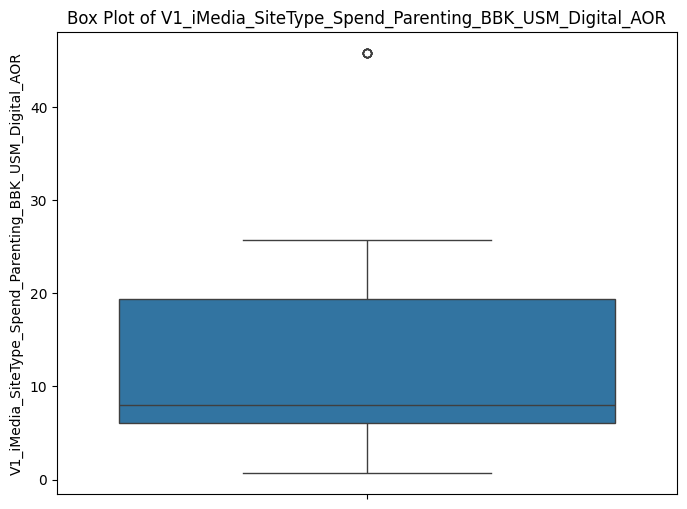

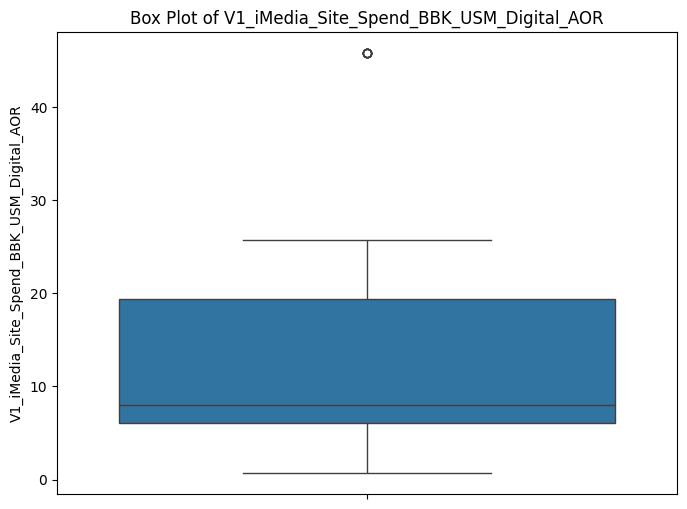

In [ ]:
# b. Box plots for numerical features to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=final_merged_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Scatter Plot for Relationship between Brand_Sales_Value and Brand_Volume**

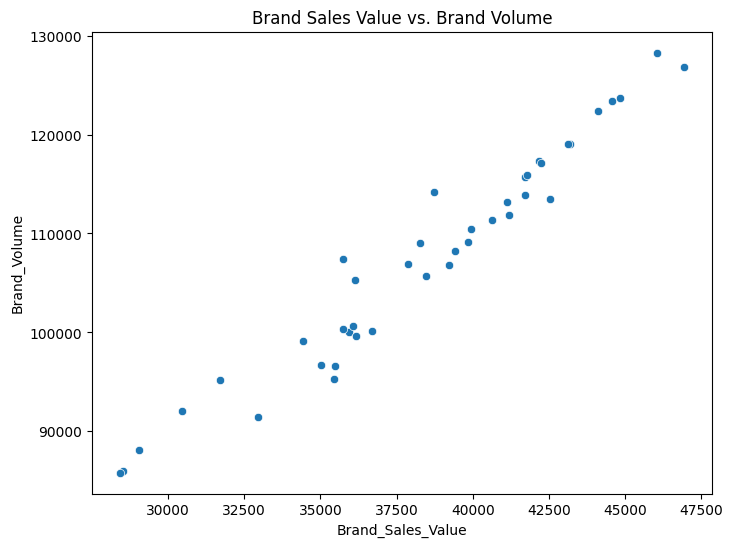

In [ ]:
# Relationship between Brand_Sales_Value and Brand_Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Brand_Sales_Value', y='Brand_Volume', data=final_merged_df)
plt.title('Brand Sales Value vs. Brand Volume')
plt.show()

The scatter plot shows a positive linear relationship between Brand Sales Value and Brand Volume. This suggests that as the sales value of the brand increases, the volume (units sold) also tends to increase. The strong clustering around an upward trend line indicates a high correlation between these two variables, which is typical for sales data: higher revenue is often associated with higher sales volume.

**Sales and Volume Over Time Using Time Series Plot**

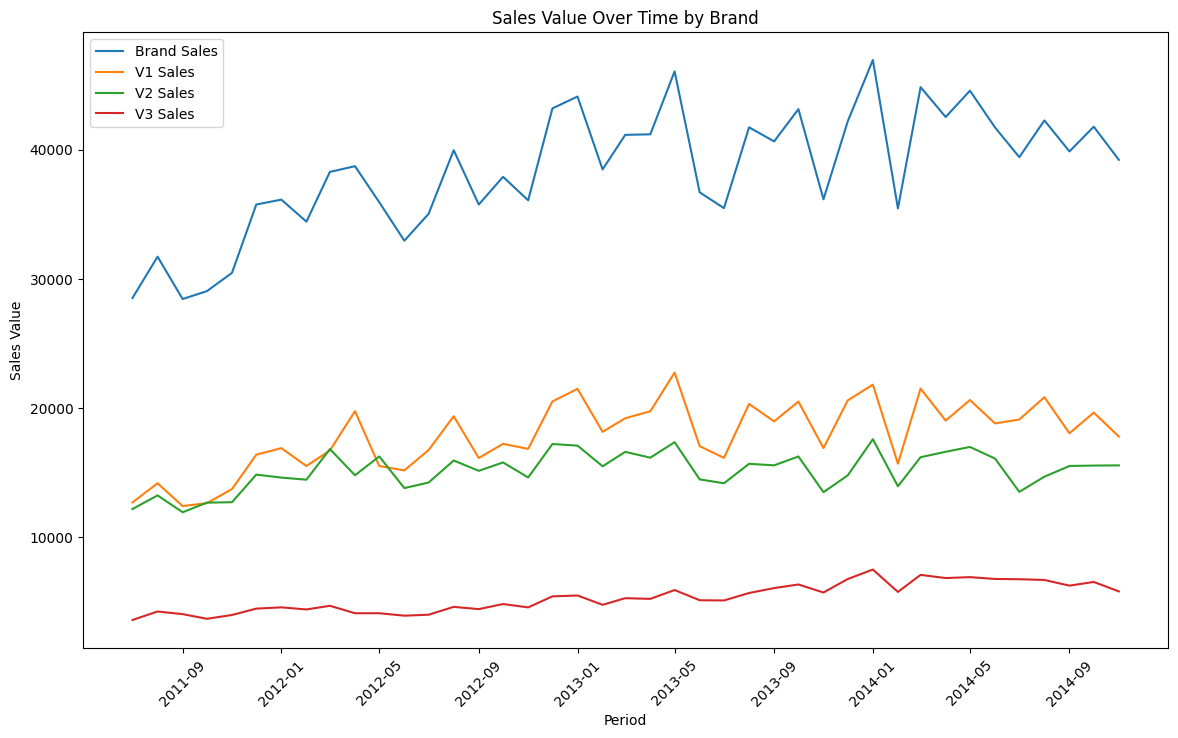

In [ ]:
#Sales and Volume over time
plt.figure(figsize=(14, 8))

# Plot sales
plt.plot(final_merged_df['Period'], final_merged_df['Brand_Sales_Value'], label='Brand Sales')
plt.plot(final_merged_df['Period'], final_merged_df['V1_Sales_Value'], label='V1 Sales')
plt.plot(final_merged_df['Period'], final_merged_df['V2_Sales_Value'], label='V2 Sales')
plt.plot(final_merged_df['Period'], final_merged_df['V3_Sales_Value'], label='V3 Sales')

# Customize plot
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.title('Sales Value Over Time by Brand')
plt.legend()
plt.xticks(rotation=45)
plt.show()


The plot shows that Brand Sales has the highest sales value, with noticeable seasonal fluctuations, followed by V1 Sales. Both display periodic peaks, likely reflecting promotional activities or seasonal demand. V2 and V3 Sales have lower and relatively stable values, indicating limited market growth. By early 2014, all brands exhibit stability, suggesting a steady demand or market saturation.

**Price Comparison Using Bar Plot**

In [ ]:
avg_price_data = {
    'Brand': ['Brand', 'V1', 'V2', 'V3'],
    'Avg_Price_Per_SU': [
        final_merged_df['Brand_Avg_Price_Per_SU'].mean(),
        final_merged_df['V1_Avg_Price_Per_SU'].mean(),
        final_merged_df['V2_Avg_Price_Per_SU'].mean(),
        final_merged_df['V3_Avg_Price_Per_SU'].mean()
    ],
    'Avg_Price_Per_USD': [
        final_merged_df['Brand_Avg_Price_Per_USD'].mean(),
        final_merged_df['V1_Avg_Price_Per_USD'].mean(),
        final_merged_df['V2_Avg_Price_Per_USD'].mean(),
        final_merged_df['V3_Avg_Price_Per_USD'].mean()
    ]
}

price_df = pd.DataFrame(avg_price_data)

<ipython-input-640-fb3350433ee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Avg_Price_Per_SU', data=price_df, palette='Blues')


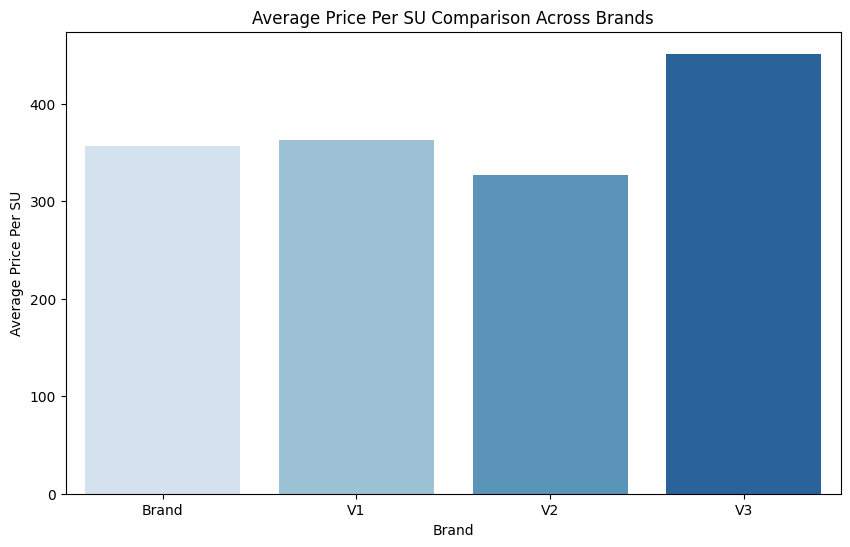

In [ ]:
# Average Price per SU comparison across brands
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand',y='Avg_Price_Per_SU', data=price_df, palette='Blues')
plt.title('Average Price Per SU Comparison Across Brands')
plt.ylabel('Average Price Per SU')
plt.xlabel('Brand')
plt.show()

The plot shows that the average price per SU varies across brands, with "V3" having the highest price, followed by "V1" and "Brand." "V2" has the lowest price among the brands compared. This indicates that "V3" is priced higher relative to the others.

<ipython-input-641-3f6bcdfbf324>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Avg_Price_Per_USD', data=price_df, palette='Greens')


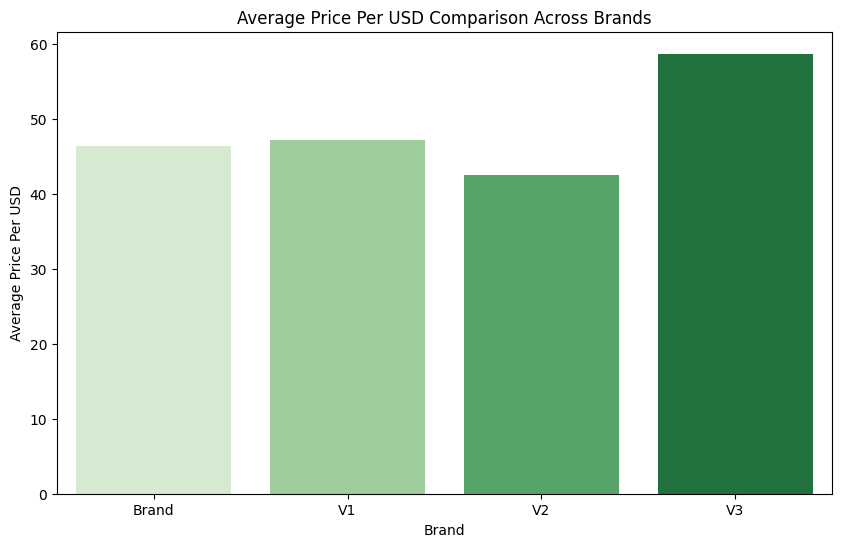

In [ ]:
# Average Price per USD comparison across brands
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Avg_Price_Per_USD', data=price_df, palette='Greens')
plt.title('Average Price Per USD Comparison Across Brands')
plt.ylabel('Average Price Per USD')
plt.show()

The bar chart shows that Brand V3 has the highest average price per USD, followed by V1, V2, and the overall Brand average. This suggests that Brand V3 is positioned as a premium offering compared to the others.

**Comparison of Price Versus Sales Using Scatter Plot**

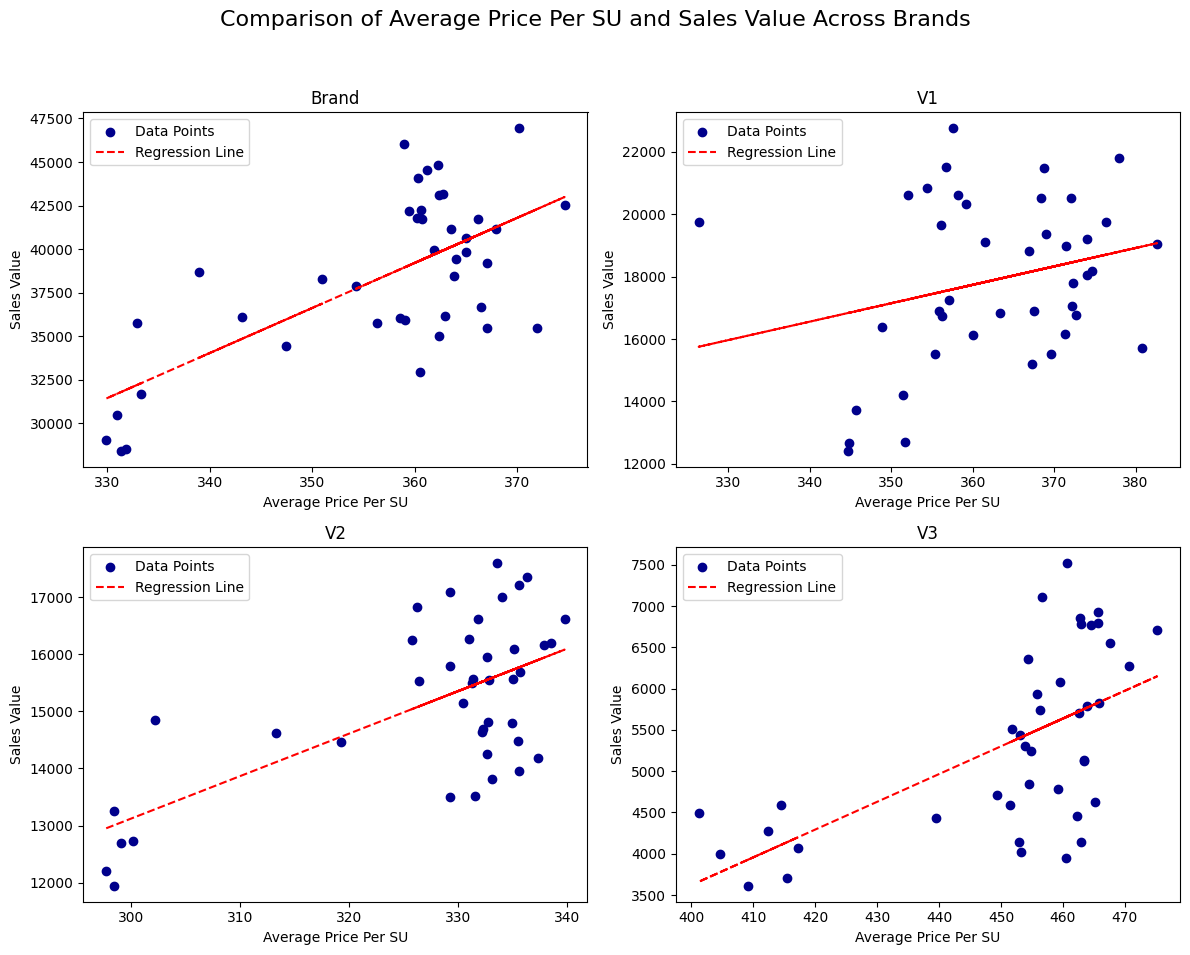

In [ ]:
# Prepare data for Price and Sales comparison
price_sales_data = {
    'Brand': ['Brand', 'V1', 'V2', 'V3'],
    'Avg_Price_Per_SU': [
        final_merged_df['Brand_Avg_Price_Per_SU'],
        final_merged_df['V1_Avg_Price_Per_SU'],
        final_merged_df['V2_Avg_Price_Per_SU'],
        final_merged_df['V3_Avg_Price_Per_SU']
    ],
    'Sales_Value': [
        final_merged_df['Brand_Sales_Value'],
        final_merged_df['V1_Sales_Value'],
        final_merged_df['V2_Sales_Value'],
        final_merged_df['V3_Sales_Value']
    ]
}

# Convert to DataFrame
price_sales_df = pd.DataFrame(price_sales_data)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparison of Average Price Per SU and Sales Value Across Brands', fontsize=16)

# Scatter plot and regression line for each brand
brand_names = price_sales_df['Brand']
for i, ax in enumerate(axs.flatten()):
    x = price_sales_df['Avg_Price_Per_SU'][i]
    y = price_sales_df['Sales_Value'][i]

    # Scatter plot
    ax.scatter(x, y, color='darkblue', label='Data Points')

    # Calculate and plot regression line
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    ax.plot(x, p(x), color='red', linestyle='--', label='Regression Line')

    # Titles and labels
    ax.set_title(f'{brand_names[i]}')
    ax.set_xlabel('Average Price Per SU')
    ax.set_ylabel('Sales Value')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leaves space for the main title
plt.show()



The scatter plots show a positive correlation between average price per SU and sales value across all brands, with Brand and V1 having a stronger trend. V2 and V3 display tighter clustering, suggesting pricing affects sales differently across brands, possibly due to market positioning.

**Weekly TV GRP and Spend Comparison (V1 Brand)**

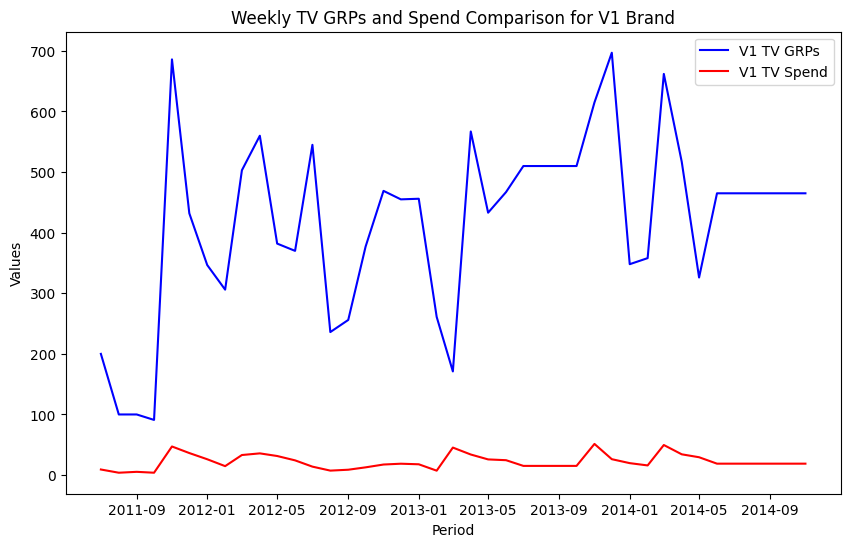

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(final_merged_df['Period'], final_merged_df['V1_TV_GRPs_Total_ISP_TV_GRP_AOR'], label='V1 TV GRPs', color='b')
plt.plot(final_merged_df['Period'], final_merged_df['V1_TV_Spends_Total_ISP_TV_USM_AOR'], label='V1 TV Spend', color='r')
plt.xlabel('Period')
plt.ylabel('Values')
plt.title('Weekly TV GRPs and Spend Comparison for V1 Brand')
plt.legend()
plt.show()


This indicates that while TV GRPs (blue) show high fluctuations and peaks over time, TV Spend (red) remains relatively low and steady, suggesting limited correlation between spend and GRP trends for the V1 brand.

**Social Media Engagement: Facebook Likes vs. PTAT (People Talking About This)**

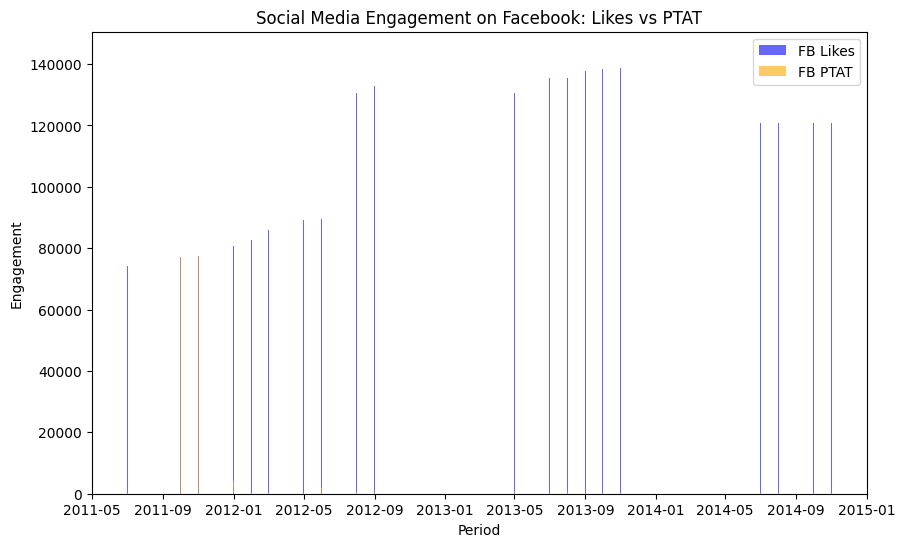

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(final_merged_df['Period'], final_merged_df['Brand_SocialAd_FB_Likes_Digital'], color='blue', label='FB Likes', alpha=0.6)
plt.bar(final_merged_df['Period'], final_merged_df['Brand_SocialAd_FB_PTAT_Digital'], color='orange', label='FB PTAT', alpha=0.6)
plt.xlabel('Period')
plt.ylabel('Engagement')
plt.title('Social Media Engagement on Facebook: Likes vs PTAT')
plt.legend()
plt.show()


The shows that Facebook Likes (blue) exhibit consistent and significant engagement over the observed period, while PTAT (People Talking About This) engagement (orange) appears intermittently and at much lower levels, indicating lower user-driven conversations compared to passive engagement like likes.

**Brand Sales Value vs. Google SEM Clicks and Impressions**

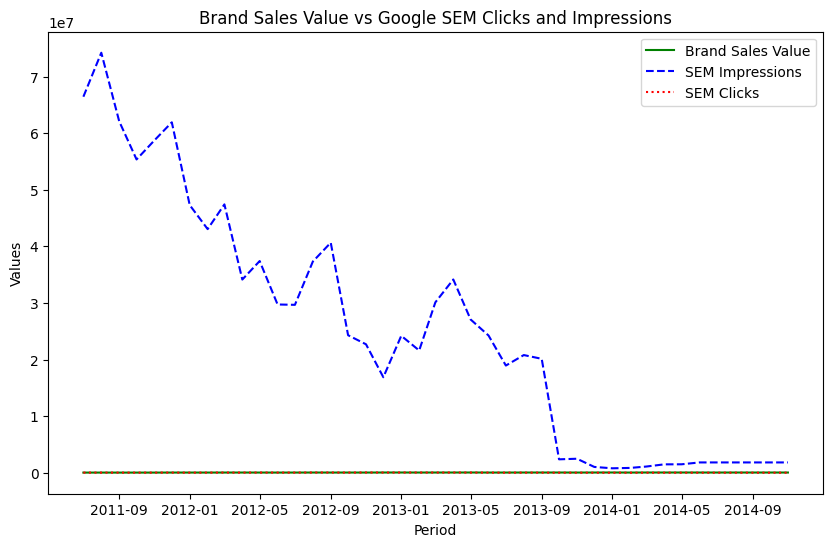

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(final_merged_df['Period'], final_merged_df['Brand_Sales_Value'], label='Brand Sales Value', color='g')
plt.plot(final_merged_df['Period'], final_merged_df['Brand_Search_IMP_SEM_Yahoo_AlwaysOn_NoOfIMP_Digital'], label='SEM Impressions', color='b', linestyle='--')
plt.plot(final_merged_df['Period'], final_merged_df['Brand_Search_Click_SEM_Yahoo_AlwaysOn_NoOfClicks_Digital'], label='SEM Clicks', color='r', linestyle=':')
plt.xlabel('Period')
plt.ylabel('Values')
plt.title('Brand Sales Value vs Google SEM Clicks and Impressions')
plt.legend()
plt.show()


The decreasing SEM impressions, combined with consistently low clicks, suggest
an ineffective SEM strategy or declining ad reach.
The minimal brand sales value highlights a lack of correlation between SEM efforts and sales performance, possibly requiring a re-evaluation of marketing strategies.

**Shipment Volumes across Brands**

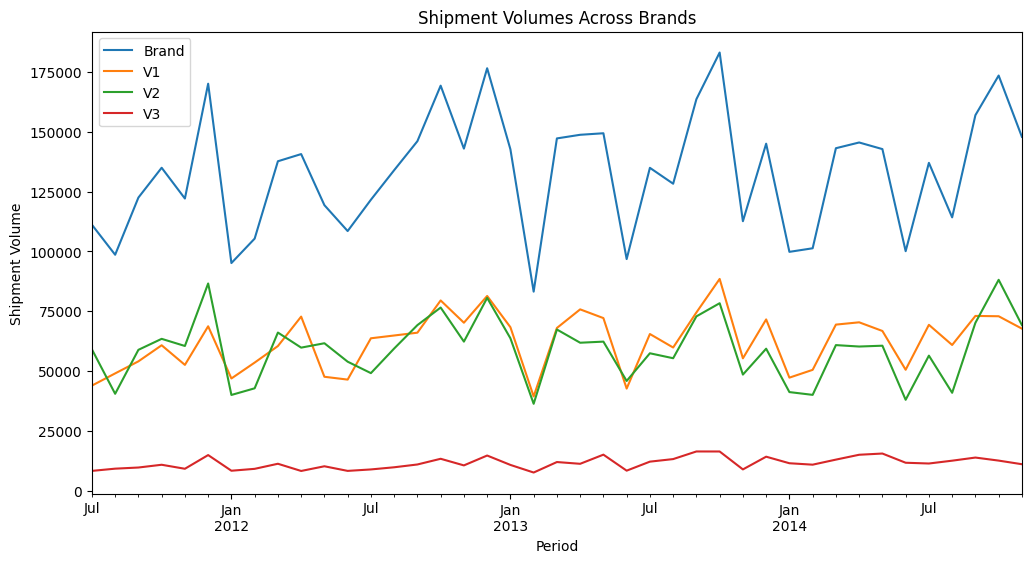

In [ ]:
final_merged_df[['Period', 'Brand_shipment_SU', 'V1_shipment_SU', 'V2_shipment_SU', 'V3_shipment_SU']].plot(
    x='Period', kind='line', figsize=(12, 6)
)
plt.xlabel('Period')
plt.ylabel('Shipment Volume')
plt.title('Shipment Volumes Across Brands')
plt.legend(['Brand', 'V1', 'V2', 'V3'])
plt.show()


The plot shows shipment volumes across three brands (V1, V2, and V3) over time. Brand V1 consistently has the highest shipment volume, showing a strong seasonal trend with peaks around the middle of each year. Brand V2 follows with moderate volumes, also displaying a seasonal pattern, while Brand V3 has the lowest and relatively stable shipment volume throughout the period.

**Correlation Matrix Across Brands**

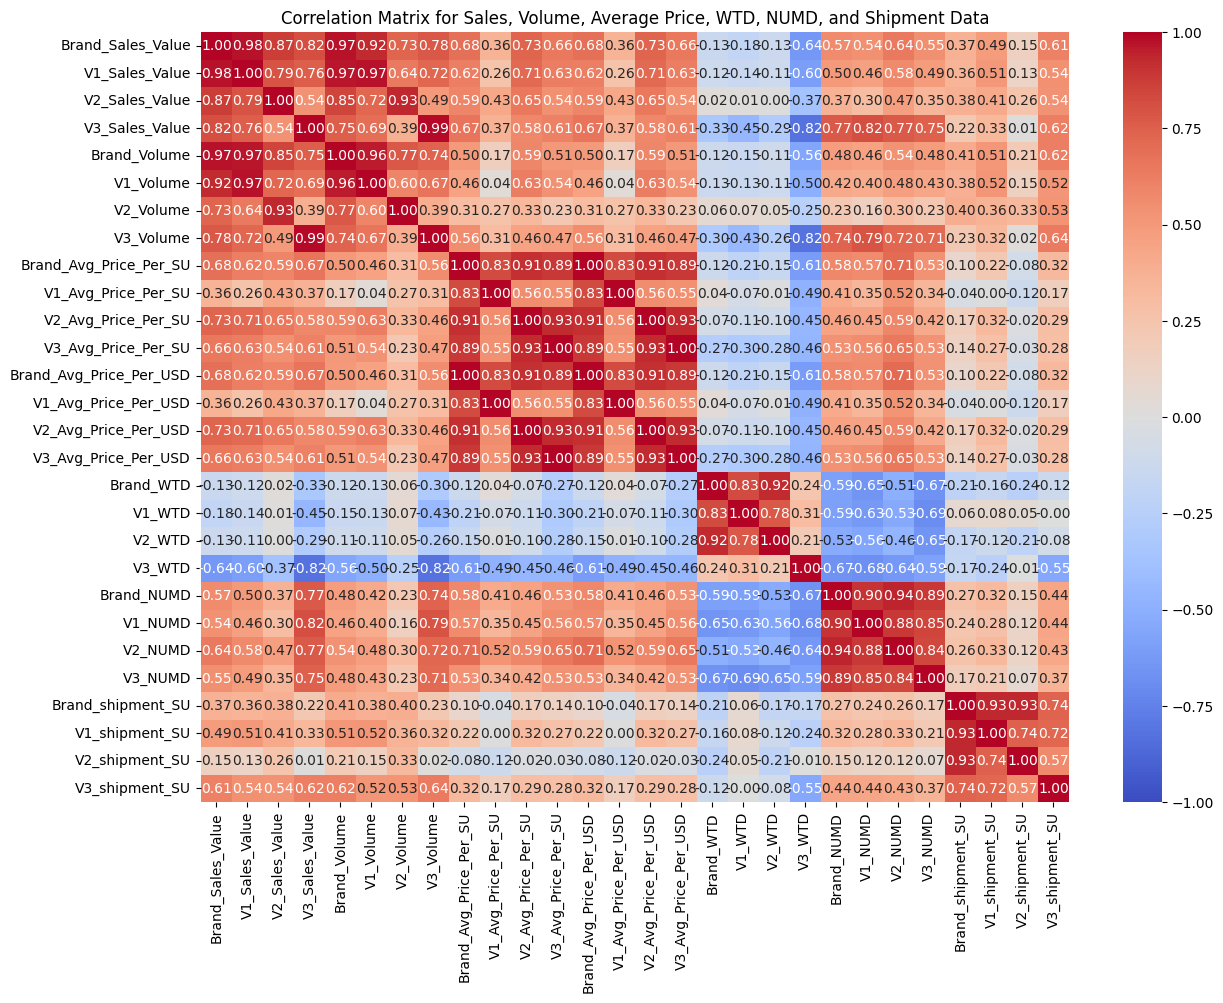

In [ ]:
# Select the specified columns
selected_columns = [
    'Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value', 'V3_Sales_Value',
    'Brand_Volume', 'V1_Volume', 'V2_Volume', 'V3_Volume',
    'Brand_Avg_Price_Per_SU', 'V1_Avg_Price_Per_SU', 'V2_Avg_Price_Per_SU', 'V3_Avg_Price_Per_SU',
    'Brand_Avg_Price_Per_USD', 'V1_Avg_Price_Per_USD', 'V2_Avg_Price_Per_USD', 'V3_Avg_Price_Per_USD',
    'Brand_WTD', 'V1_WTD', 'V2_WTD', 'V3_WTD',
    'Brand_NUMD', 'V1_NUMD', 'V2_NUMD', 'V3_NUMD',
    'Brand_shipment_SU', 'V1_shipment_SU', 'V2_shipment_SU', 'V3_shipment_SU'
]

# Extract only the selected columns
correlation_data = final_merged_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix for Sales, Volume, Average Price, WTD, NUMD, and Shipment Data')
plt.show()

The correlation matrix shows strong positive correlations between sales values and volumes across brands, suggesting that higher volumes drive higher sales. Brand-level shipment data also has a positive correlation with both sales value and volume, while average price per unit is less correlated with sales and volume, indicating that price fluctuations have less impact on sales and shipment volumes.

**Total Sales percentage for Brand, V1, V2, V3 using pie chart**

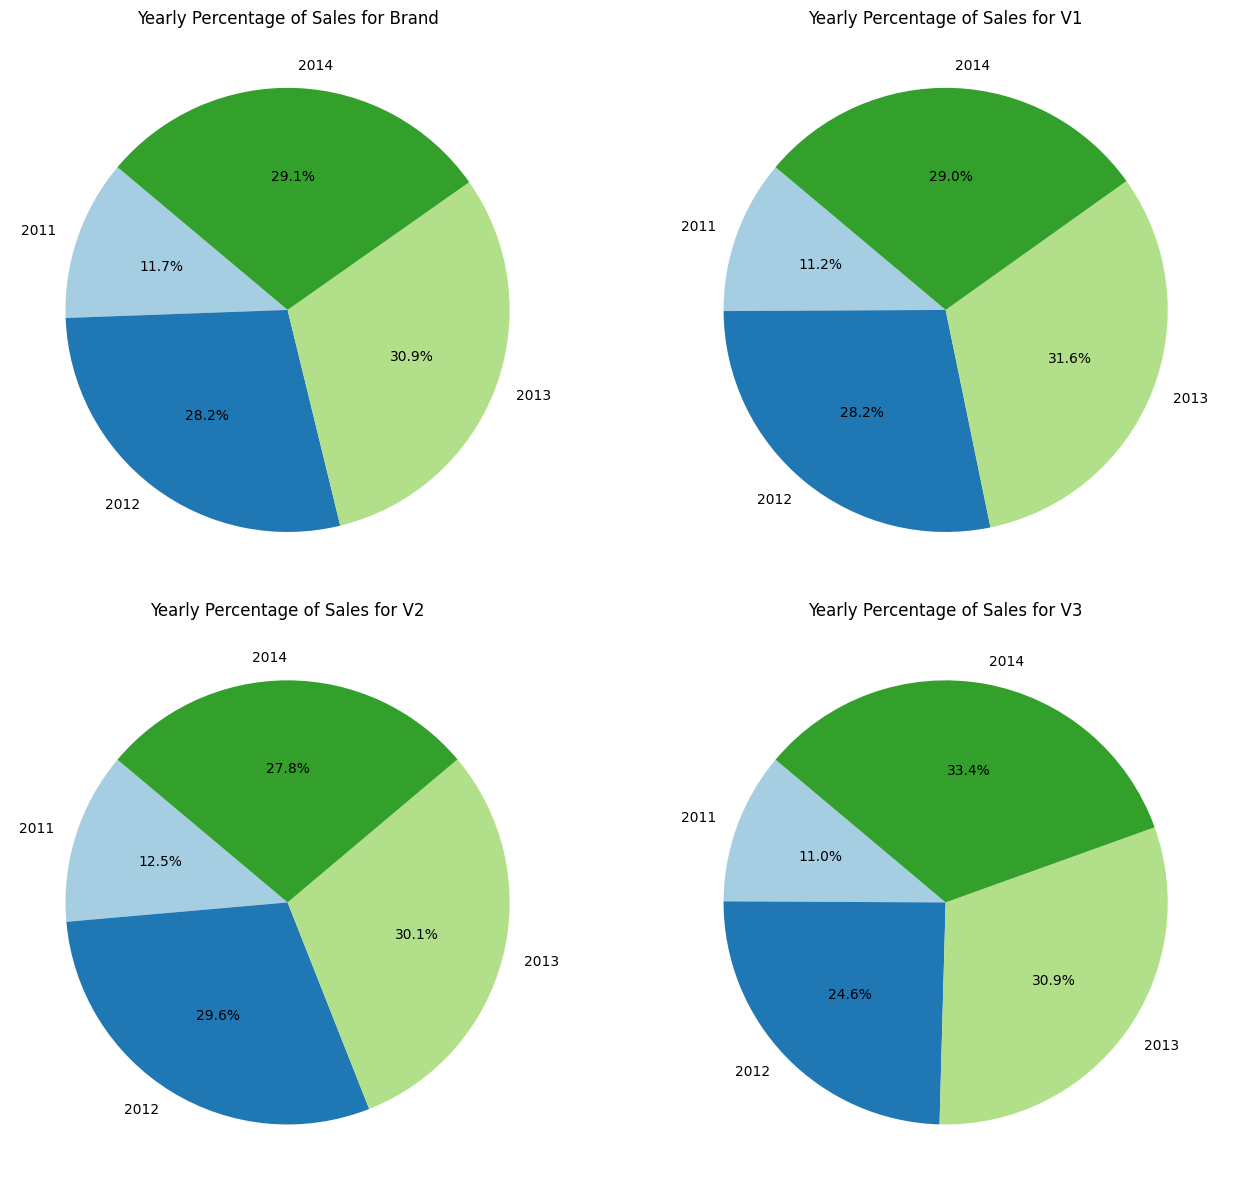

In [ ]:
# Extract the 'Year' from the 'Period' column if necessary
final_merged_df['Year'] = pd.to_datetime(final_merged_df['Period']).dt.year

# List of sales columns and corresponding titles
sales_columns = ['Brand_Sales_Value', 'V1_Sales_Value', 'V2_Sales_Value', 'V3_Sales_Value']
titles = ['Yearly Percentage of Sales for Brand', 'Yearly Percentage of Sales for V1',
          'Yearly Percentage of Sales for V2', 'Yearly Percentage of Sales for V3']

# Set up the 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot each pie chart in a subplot
for i, column in enumerate(sales_columns):
    yearly_sales = final_merged_df.groupby('Year')[column].sum()

    axes[i].pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(titles[i])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



The pie charts show the yearly percentage distribution of sales for the Brand, V1, V2, and V3 from 2011 to 2014. Across all categories, sales were most significant in 2013 and 2014, indicating a peak in sales during these years. While 2012 had the lowest sales share, each category followed a similar trend, suggesting consistent performance patterns across all product lines during this period.

**Monthly Sales distribution of Brand Using Histogram**

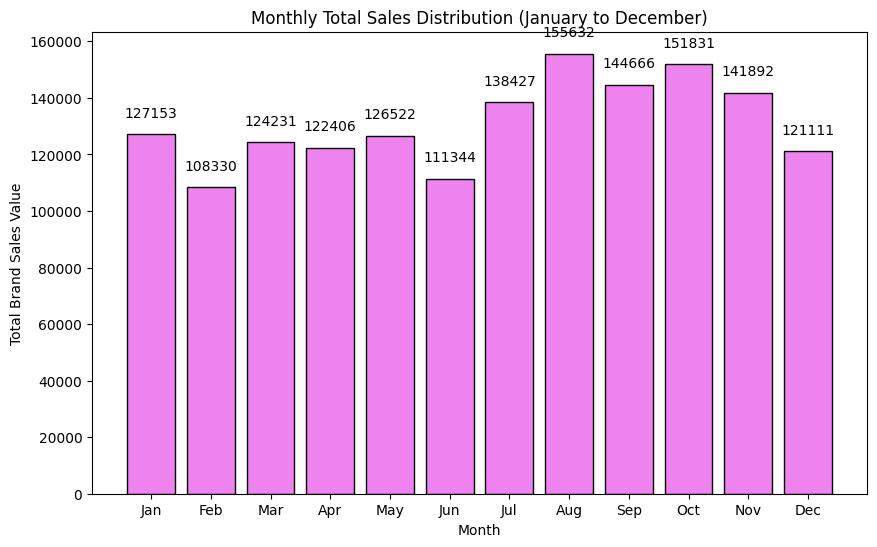

In [ ]:
# Extract the month from the 'Period' column
final_merged_df['Month'] = final_merged_df['Period'].dt.month

# Group by month and calculate the sum of 'Brand_Sales_Value' for each month
monthly_sales = final_merged_df.groupby('Month')['Brand_Sales_Value'].sum()

# Plotting the histogram (using bar plot to represent monthly sales distribution)
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='violet', edgecolor='black')
plt.title('Monthly Total Sales Distribution (January to December)')
plt.xlabel('Month')
plt.ylabel('Total Brand Sales Value')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding labels on top of each bar
for index, value in enumerate(monthly_sales.values):
    plt.text(index + 1, value + 5000, f'{int(value)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

The bar chart shows that the highest brand sales values occur from August to October, with a noticeable peak in August. Sales are relatively consistent across other months but slightly dip in February, June, and December. This trend suggests a seasonal increase in demand during late summer to early fall.

**Linear Regression model for Brand**

**Creating dummy varaiables**

In [ ]:
# Convert 'period' to datetime format if not already
final_merged_df['Period'] = pd.to_datetime(final_merged_df['Period'])

# Generate month and quarter features dynamically
for month in range(1, 13):
    final_merged_df[f'month_{month}'] = (final_merged_df['Period'].dt.month == month).astype(int)

for quarter in range(1, 5):
    final_merged_df[f'q_{quarter}'] = (final_merged_df['Period'].dt.quarter == quarter).astype(int)

In [ ]:
# Define features and target
X = final_merged_df[['Brand_Avg_Price_Per_SU',
                     'Brand_shipment_SU',
                     'Brand_SocialAd_FB_Likes_Digital',
                     'month_3',
                     'month_5',
                     'month_7',
                     'month_9'
                    ]]
y = final_merged_df['Brand_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract Coefficients
brand_coefficients = model.coef_
brand_intercept = model.intercept_

# Print coefficients and intercept
print("Coefficients:", brand_coefficients)
print("Intercept:", brand_intercept)


# Create a DataFrame for better visualization (optional)
brand_coef_df = pd.DataFrame({'Feature': X.columns, 'Co-efficient':     brand_coefficients})
brand_coef_df

Coefficients: [ 1.18842173e+02  4.39537328e-02  8.01347260e-02  2.47888418e+03
  3.12465237e+03 -3.00748967e+03 -3.12235330e+03]
Intercept: -18692.818418605588


Feature  Co-efficient
0           Brand_Avg_Price_Per_SU    118.842173
1                Brand_shipment_SU      0.043954
2  Brand_SocialAd_FB_Likes_Digital      0.080135
3                          month_3   2478.884179
4                          month_5   3124.652367
5                          month_7  -3007.489671
6                          month_9  -3122.353298

In [ ]:
brand_X_means = X.mean()
brand_X_means
brand_avg_df = pd.DataFrame({'Feature': X.columns,'Average': brand_X_means})
brand_avg_df.reset_index(drop=True, inplace=True)
brand_avg_df

Feature        Average
0           Brand_Avg_Price_Per_SU     356.788095
1                Brand_shipment_SU  132997.959612
2  Brand_SocialAd_FB_Likes_Digital  114265.756098
3                          month_3       0.073171
4                          month_5       0.073171
5                          month_7       0.097561
6                          month_9       0.097561

In [ ]:
brand_X_variables = pd.DataFrame({'brand_X_variables': X.columns})
brand_X_variables

brand_X_variables
0           Brand_Avg_Price_Per_SU
1                Brand_shipment_SU
2  Brand_SocialAd_FB_Likes_Digital
3                          month_3
4                          month_5
5                          month_7
6                          month_9

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
brand_linear_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
brand_linear_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - brand_linear_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {brand_linear_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {brand_linear_mape * 100:.2f}%")
print("\n")

  R-squared: 0.8277369860222228
  Adjusted R-squared: -0.3781041118222177
  Mean Squared Error: 2123243.992843201
  Root Mean Squared Error: 1457.1355437443701
Mean Absolute Error (MAE): 1080.188562621402
  Mean Absolute Percentage Error: 2.96%




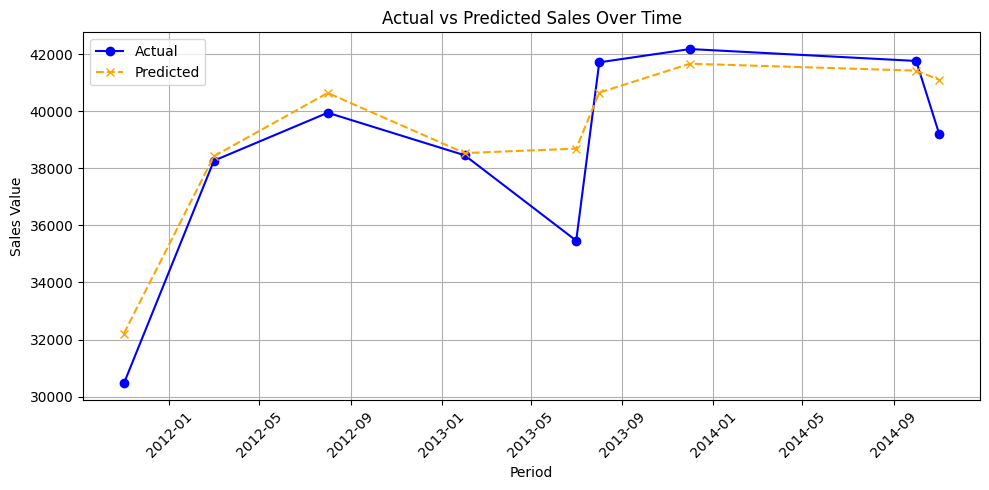

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save the plot to a file
plt.savefig('actual_vs_predicted_brand_model.png', dpi=300)
plt.show()

**Linear Regression Model for V1**

**Creating Adstock Variable**

In [ ]:
# Function to apply Adstock
def apply_adstock(data, decay):
    adstock = np.zeros(len(data))
    adstock[0] = data[0]  # Initialize the first value
    for t in range(1, len(data)):
        adstock[t] = data[t] + decay * adstock[t-1]
    return adstock

# Parameters for Adstock
decay_factor = 0.7  # Adjust based on domain knowledge

# Apply Adstock transformation
final_merged_df['V1_Adstock'] = apply_adstock(
    final_merged_df['V1_TV_GRPs_Total_ISP_TV_GRP_AOR'].values,
    decay_factor
)

In [ ]:
X= final_merged_df[['V1_Avg_Price_Per_SU',
                    'V1_NUMD',
                    'V2_NUMD',
                    'V1_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
                    'V1_Adstock',
                    'month_7',
                    'month_8',
                    'month_9'
]]
y = final_merged_df['V1_Sales_Value']


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract Coefficients
V1_coefficients = model.coef_
V1_intercept = model.intercept_

# Print coefficients and intercept
print("Coefficients:", V1_coefficients)
print("Intercept:", V1_intercept)


# Create a DataFrame for better visualization (optional)
V1_coef_df = pd.DataFrame({'Feature': X.columns, 'Co-efficient':     V1_coefficients})
V1_coef_df

Coefficients: [-4.26060253e+01 -5.69459426e+02  9.28067086e+02  4.93758225e-02
  9.21552032e-06  3.10942613e-01  3.91758199e+00 -4.65134456e+02
  1.87661430e+03 -7.74146100e+02]
Intercept: 7627.929881188769


Feature  Co-efficient
0                                V1_Avg_Price_Per_SU    -42.606025
1                                            V1_NUMD   -569.459426
2                                            V2_NUMD    928.067086
3                                     V1_shipment_SU      0.049376
4  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...      0.000009
5                    V1_TV_GRPs_ISP_TV_Total_GRP_AOR      0.310943
6                                         V1_Adstock      3.917582
7                                            month_7   -465.134456
8                                            month_8   1876.614297
9                                            month_9   -774.146100

In [ ]:
V1_X_means = X.mean()
V1_X_means
V1_avg_df = pd.DataFrame({'Feature': X.columns,'Average': V1_X_means})
V1_avg_df.reset_index(drop=True, inplace=True)
V1_avg_df

Feature       Average
0                                V1_Avg_Price_Per_SU  3.626144e+02
1                                            V1_NUMD  4.770732e+01
2                                            V2_NUMD  4.797561e+01
3                                     V1_shipment_SU  6.245768e+04
4  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...  5.203598e+06
5                    V1_TV_GRPs_ISP_TV_Total_GRP_AOR  4.013317e+02
6                                         V1_Adstock  1.303921e+03
7                                            month_7  9.756098e-02
8                                            month_8  9.756098e-02
9                                            month_9  9.756098e-02

In [ ]:
V1_X_variables = pd.DataFrame({'V1_X_variables': X.columns})
V1_X_variables

V1_X_variables
0                                V1_Avg_Price_Per_SU
1                                            V1_NUMD
2                                            V2_NUMD
3                                     V1_shipment_SU
4  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...
5                    V1_TV_GRPs_ISP_TV_Total_GRP_AOR
6                                         V1_Adstock
7                                            month_7
8                                            month_8
9                                            month_9

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
V1_linear_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V1_linear_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V1_linear_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V1_linear_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V1_linear_mape * 100:.2f}%")
print("\n")

  R-squared: 0.8504058391512095
  Adjusted R-squared: 1.0997294405658604
  Mean Squared Error: 830702.1891787719
  Root Mean Squared Error: 911.4286528186241
Mean Absolute Error (MAE): 713.6112917518738
  Mean Absolute Percentage Error: 4.49%




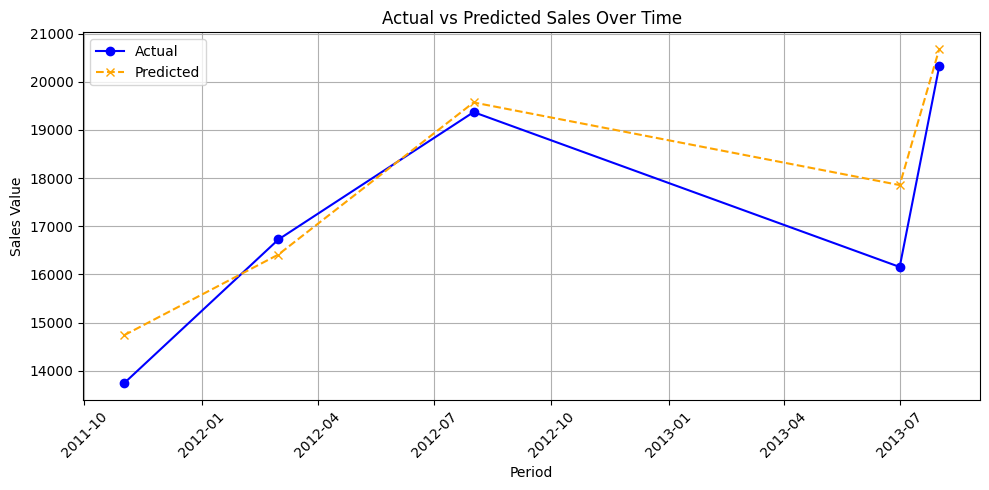

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_V1_model.png', dpi=300)
plt.show()

**Linear Regression Model for V2**

In [ ]:
X =final_merged_df [['V2_Avg_Price_Per_SU',
                     'V1_TV_Spends_ISP_TV_USM_AOR',
                     'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                     'V1_Adstock',
                     'month_4',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['V2_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
V2_linear_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V2_linear_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V2_linear_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V2_linear_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V2_linear_mape * 100:.2f}%")
print("\n")

  R-squared: 0.5090207938156429
  Adjusted R-squared: -2.9278336494748567
  Mean Squared Error: 608286.8075122304
  Root Mean Squared Error: 779.9274373377502
Mean Absolute Error (MAE): 594.4142626153139
  Mean Absolute Percentage Error: 3.96%




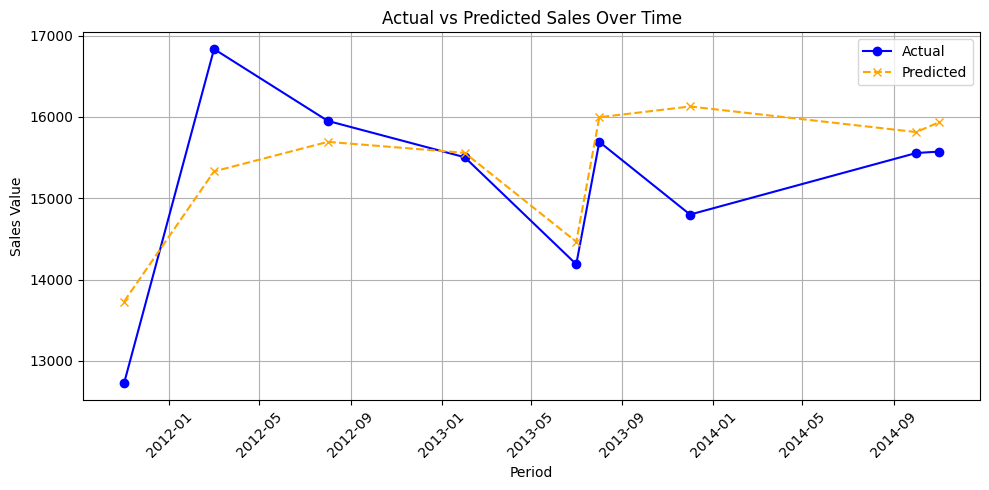

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Linear Regression Model for V3**

In [ ]:
X=final_merged_df [['V3_Avg_Price_Per_SU',
                    'V3_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_Adstock',
                    'month_7',
                    'month_1'
]]
y = final_merged_df['V3_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Extract Coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Create a DataFrame for better visualization (optional)
V3_coef_df = pd.DataFrame({'Feature': X.columns, 'Co-efficient': coefficients})
V3_coef_df

Coefficients: [ 2.07009961e+01  1.88255866e-01 -8.20883962e-05  7.30276339e-01
  1.53304722e+02  6.57835736e+02]
Intercept: -6680.290323621413


Feature  Co-efficient
0                                V3_Avg_Price_Per_SU     20.700996
1                                     V3_shipment_SU      0.188256
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...     -0.000082
3                                         V1_Adstock      0.730276
4                                            month_7    153.304722
5                                            month_1    657.835736

In [ ]:
V3_X_means = X.mean()
V3_X_means
V3_avg_df = pd.DataFrame({'Feature': X.columns,'Average': V3_X_means})
V3_avg_df.reset_index(drop=True, inplace=True)
V3_avg_df

Feature       Average
0                                V3_Avg_Price_Per_SU  4.511267e+02
1                                     V3_shipment_SU  1.143121e+04
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...  5.203598e+06
3                                         V1_Adstock  1.303921e+03
4                                            month_7  9.756098e-02
5                                            month_1  7.317073e-02

In [ ]:
V3_X_variables = pd.DataFrame({'V3_X_variables': X.columns})
V3_X_variables

V3_X_variables
0                                V3_Avg_Price_Per_SU
1                                     V3_shipment_SU
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...
3                                         V1_Adstock
4                                            month_7
5                                            month_1

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
V3_linear_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V3_linear_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V3_linear_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V3_linear_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V3_linear_mape * 100:.2f}%")
print("\n")

  R-squared: 0.7749375776134341
  Adjusted R-squared: 0.09975031045373628
  Mean Squared Error: 174241.91920499384
  Root Mean Squared Error: 417.42295002190986
Mean Absolute Error (MAE): 316.71891691442977
  Mean Absolute Percentage Error: 6.18%




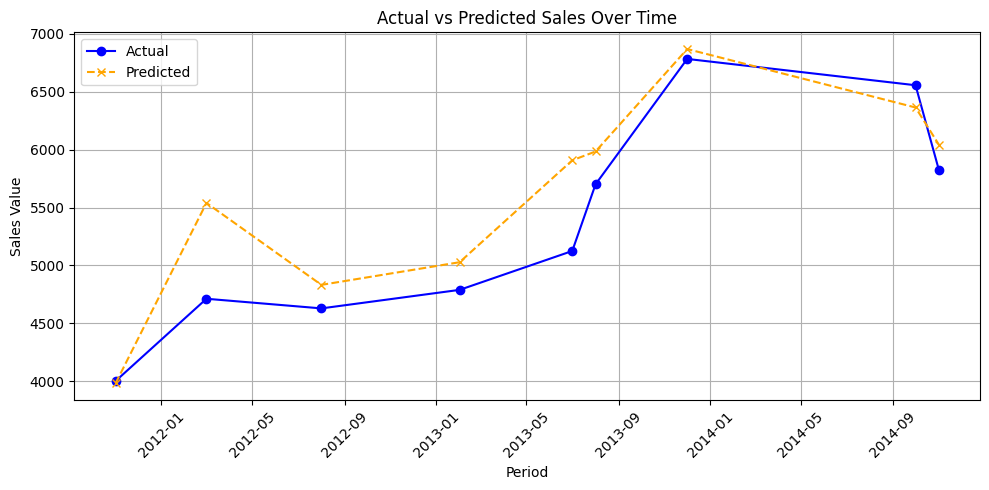

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_V3_model.png', dpi=300)
plt.show()

**L2-Regularization-Ridge Regression - Brand**

In [ ]:
# Define features and target
X = final_merged_df[['Brand_Avg_Price_Per_SU',
                     'Brand_shipment_SU',
                     'Brand_SocialAd_FB_Likes_Digital',
                     'month_3',
                     'month_5',
                     'month_7',
                     'month_9'
                    ]]
y = final_merged_df['Brand_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

1.0

In [ ]:
y_pred=ridge_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
brand_ridge_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
brand_ridge_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - brand_ridge_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {brand_ridge_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {brand_ridge_mape * 100:.2f}%")
print("\n")

  R-squared: 0.7709424376100634
  Adjusted R-squared: -0.8324604991194926
  Mean Squared Error: 2823270.545019492
  Root Mean Squared Error: 1680.2590708041103
Mean Absolute Error (MAE): 1229.2522112554095
  Mean Absolute Percentage Error: 3.34%




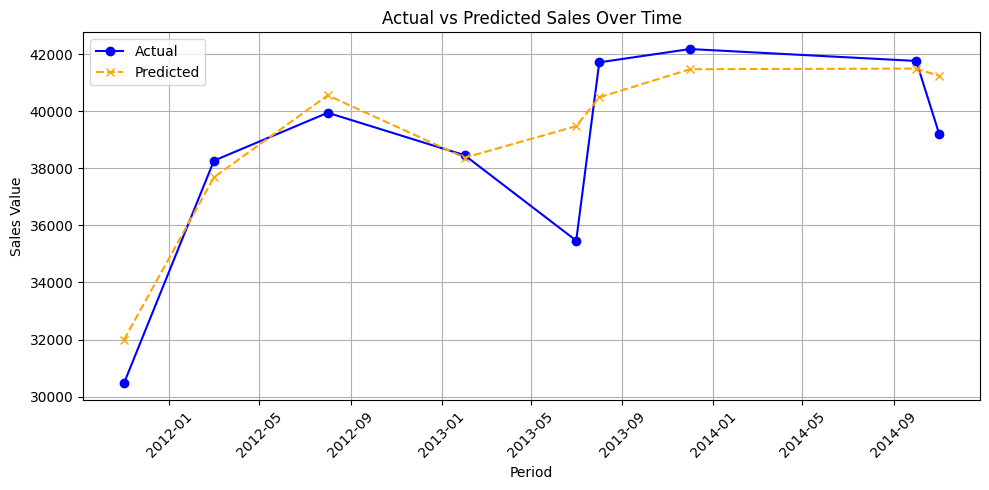

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L2-Regularization-Ridge Regression - V1**

In [ ]:
X= final_merged_df[['V1_Avg_Price_Per_SU',
                    'V1_NUMD',
                    'V2_NUMD',
                    'V1_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
                    'V1_Adstock',
                    'month_7',
                    'month_8',
                    'month_9'
]]
y = final_merged_df['V1_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

0.1

In [ ]:
y_pred=ridge_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V1_ridge_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V1_ridge_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V1_ridge_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V1_ridge_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V1_ridge_mape * 100:.2f}%")
print("\n")

  R-squared: 0.7248801852650322
  Adjusted R-squared: 1.1834132098233119
  Mean Squared Error: 1527751.0237702825
  Root Mean Squared Error: 1236.0222586063255
Mean Absolute Error (MAE): 1025.4903237938809
  Mean Absolute Percentage Error: 5.88%




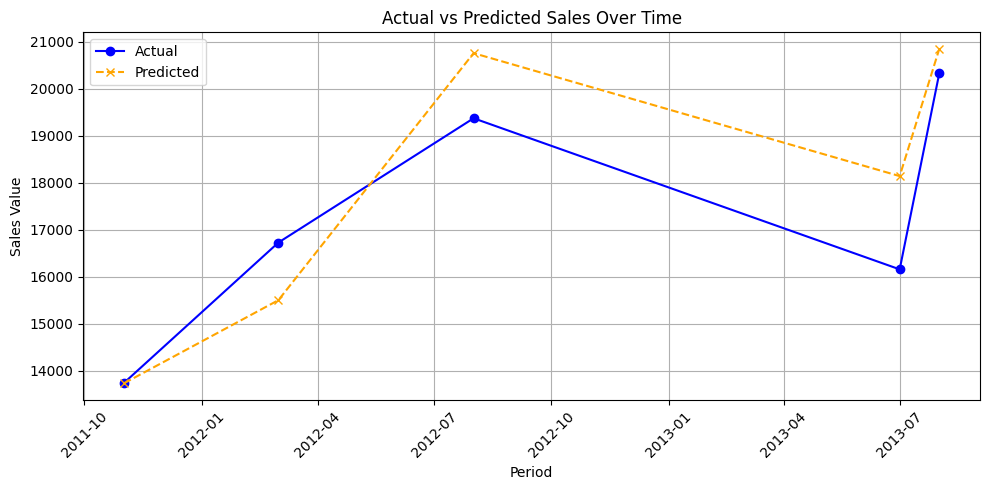

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L2-Regularization-Ridge Regression - V2**

In [ ]:
X =final_merged_df [['V2_Avg_Price_Per_SU',
                     'V1_TV_Spends_ISP_TV_USM_AOR',
                     'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                     'V1_Adstock',
                     'month_4',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['V2_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [ ]:
# Extract Coefficients
coefficients = ridge_cv_model.coef_
intercept = ridge_cv_model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Create a DataFrame for better visualization (optional)
V2_coef_df = pd.DataFrame({'Feature': X.columns, 'Co-efficient': coefficients})
V2_coef_df

Coefficients: [ 5.93967766e+01  7.52424841e+00  1.43051147e-05  3.88871940e-01
 -1.40800895e+02 -1.10355302e+03 -2.52993929e+02]
Intercept: -4851.745369346343


Feature  Co-efficient
0                                V2_Avg_Price_Per_SU     59.396777
1                        V1_TV_Spends_ISP_TV_USM_AOR      7.524248
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...      0.000014
3                                         V1_Adstock      0.388872
4                                            month_4   -140.800895
5                                            month_7  -1103.553022
6                                            month_9   -252.993929

In [ ]:
V2_X_means = X.mean()
V2_X_means
V2_avg_df = pd.DataFrame({'Feature': X.columns,'Average': V2_X_means})
V2_avg_df.reset_index(drop=True, inplace=True)
V2_avg_df


Feature       Average
0                                V2_Avg_Price_Per_SU  3.271898e+02
1                        V1_TV_Spends_ISP_TV_USM_AOR  2.137642e+01
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...  5.203598e+06
3                                         V1_Adstock  1.303921e+03
4                                            month_4  7.317073e-02
5                                            month_7  9.756098e-02
6                                            month_9  9.756098e-02

In [ ]:
V2_X_variables = pd.DataFrame({'V2_X_variables': X.columns})
V2_X_variables

V2_X_variables
0                                V2_Avg_Price_Per_SU
1                        V1_TV_Spends_ISP_TV_USM_AOR
2  V1_iMedia_Total_IMP_Click_No_of_Impressions_Di...
3                                         V1_Adstock
4                                            month_4
5                                            month_7
6                                            month_9

In [ ]:
ridge_cv_model.alpha_

1.0

In [ ]:
y_pred=ridge_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V2_ridge_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V2_ridge_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V2_ridge_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V2_ridge_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V2_ridge_mape * 100:.2f}%")
print("\n")

  R-squared: 0.510026036565445
  Adjusted R-squared: -2.91979170747644
  Mean Squared Error: 607041.3863307429
  Root Mean Squared Error: 779.1286070545368
Mean Absolute Error (MAE): 598.5704792490467
  Mean Absolute Percentage Error: 4.00%




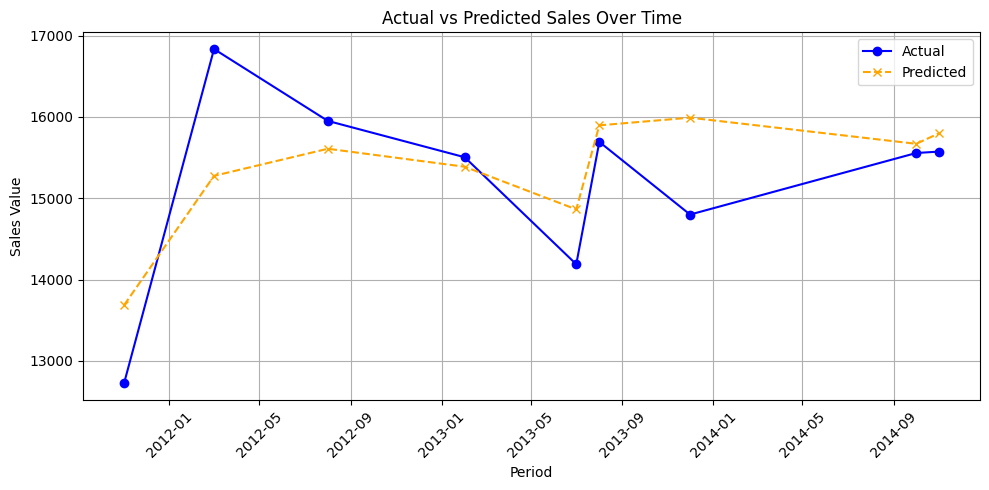

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_V2_model.png', dpi=300)
plt.show()

**L2-Regularization-Ridge Regression - V3**

In [ ]:
X=final_merged_df [['V3_Avg_Price_Per_SU',
                    'V3_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_Adstock',
                    'month_7',
                    'month_1'
]]
y = final_merged_df['V3_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.alpha_

10.0

In [ ]:
y_pred=ridge_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V3_ridge_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V3_ridge_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V3_ridge_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V3_ridge_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V3_ridge_mape * 100:.2f}%")
print("\n")

  R-squared: 0.7219495993216754
  Adjusted R-squared: -0.1122016027132986
  Mean Squared Error: 215264.8804547866
  Root Mean Squared Error: 463.966464795449
Mean Absolute Error (MAE): 388.9795935469112
  Mean Absolute Percentage Error: 7.70%




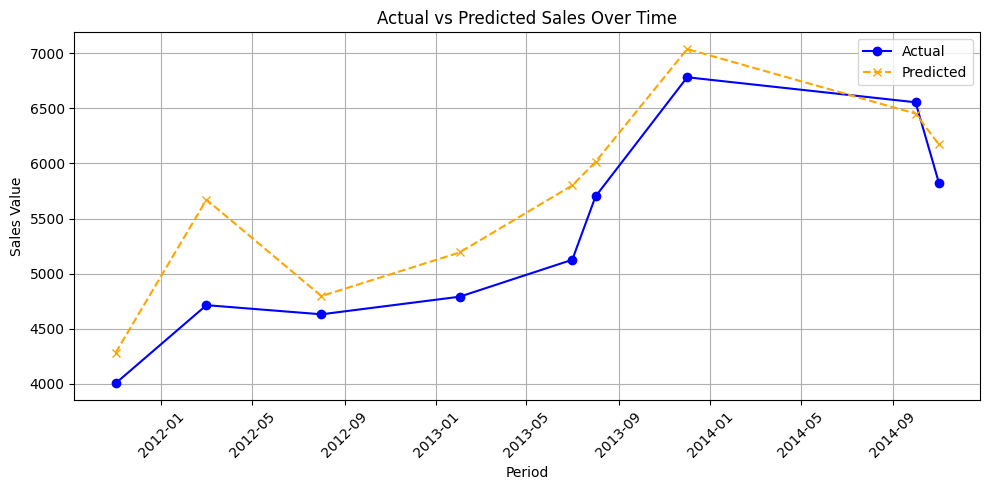

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L1-Regularization-Lasso Regression- Brand**

In [ ]:
# Define features and target
X = final_merged_df[['Brand_Avg_Price_Per_SU',
                     'Brand_shipment_SU',
                     'Brand_SocialAd_FB_Likes_Digital',
                     'month_3',
                     'month_5',
                     'month_7',
                     'month_9'
                    ]]
y = final_merged_df['Brand_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso_cv_model=LassoCV(alphas=np.logspace(-4, 4, 10), cv=5, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [ ]:
lasso_cv_model.alpha_

166.81005372000558

In [ ]:
y_pred=lasso_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
brand_lasso_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
brand_lasso_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - brand_lasso_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {brand_lasso_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {brand_lasso_mape * 100:.2f}%")
print("\n")

  R-squared: 0.6345380730829537
  Adjusted R-squared: -1.9236954153363701
  Mean Squared Error: 4504535.378903927
  Root Mean Squared Error: 2122.3890734038205
Mean Absolute Error (MAE): 1546.197335412834
  Mean Absolute Percentage Error: 4.17%




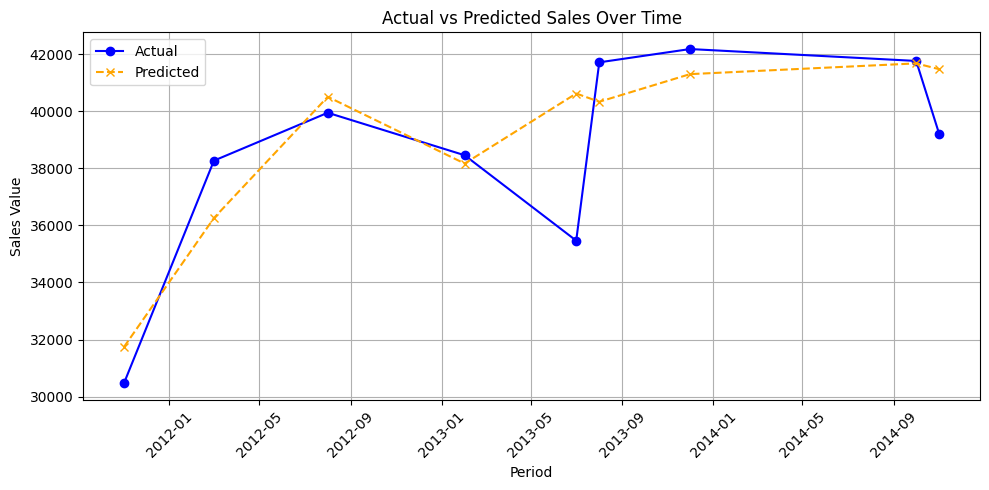

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L1-Regularization-Lasso Regression- V1**

In [ ]:
X= final_merged_df[['V1_Avg_Price_Per_SU',
                    'V1_NUMD',
                    'V2_NUMD',
                    'V1_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
                    'V1_Adstock',
                    'month_7',
                    'month_8',
                    'month_9'
]]
y = final_merged_df['V1_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lasso_cv_model=LassoCV(alphas=np.logspace(-4, 4, 10), cv=5, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [ ]:
lasso_cv_model.alpha_

10000.0

In [ ]:
y_pred=lasso_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V1_lasso_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V1_lasso_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V1_lasso_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V1_lasso_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V1_lasso_mape * 100:.2f}%")
print("\n")

  R-squared: 0.3639519717261519
  Adjusted R-squared: 1.4240320188492321
  Mean Squared Error: 3531999.4210469155
  Root Mean Squared Error: 1879.361439704166
Mean Absolute Error (MAE): 1793.4997625699302
  Mean Absolute Percentage Error: 10.78%




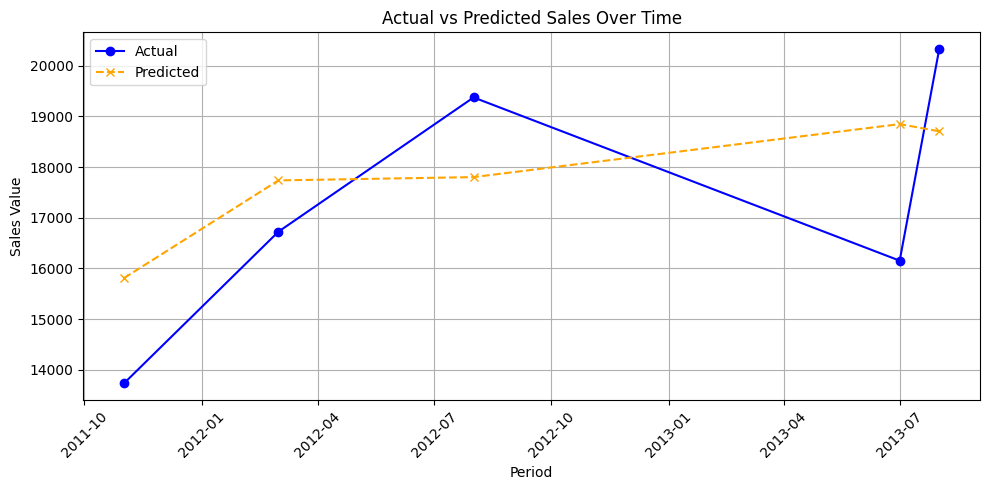

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L1-Regularization-Lasso Regression- V2**

In [ ]:
X =final_merged_df [['V2_Avg_Price_Per_SU',
                     'V1_TV_Spends_ISP_TV_USM_AOR',
                     'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                     'V1_Adstock',
                     'month_4',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['V2_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso_cv_model=LassoCV(alphas=np.logspace(-4, 4, 10), cv=5, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [ ]:
lasso_cv_model.alpha_

10000.0

In [ ]:
y_pred=lasso_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V2_lasso_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V2_lasso_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V2_lasso_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V2_lasso_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V2_lasso_mape * 100:.2f}%")
print("\n")

  R-squared: 0.050660638099690125
  Adjusted R-squared: -6.594714895202479
  Mean Squared Error: 1176161.0317142508
  Root Mean Squared Error: 1084.5095811998392
Mean Absolute Error (MAE): 847.0170108067279
  Mean Absolute Percentage Error: 5.70%




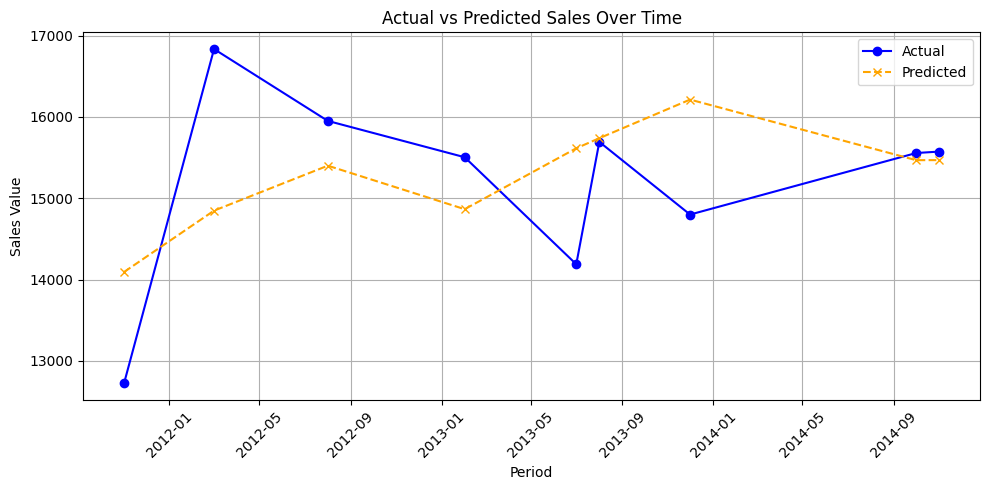

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**L1-Regularization-Lasso Regression- V3**

In [ ]:
X=final_merged_df [['V3_Avg_Price_Per_SU',
                    'V3_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_Adstock',
                    'month_7',
                    'month_1'
]]
y = final_merged_df['V3_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso_cv_model=LassoCV(alphas=np.logspace(-4, 4, 10), cv=5, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [ ]:
lasso_cv_model.alpha_

21.54434690031882

In [ ]:
y_pred=lasso_cv_model.predict(X_test)

In [ ]:
# Evaluate the model
V3_lasso_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V3_lasso_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - V3_lasso_r2) * (n - 1) / (n - p - 1)

In [ ]:
# Output the results
print(f"  R-squared: {V3_lasso_r2}")
print(f"  Adjusted R-squared: {adj_r2}")
print(f"  Mean Squared Error: {mse}")
print(f"  Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"  Mean Absolute Percentage Error: {V3_lasso_mape * 100:.2f}%")
print("\n")

  R-squared: 0.7575713237680829
  Adjusted R-squared: 0.030285295072331575
  Mean Squared Error: 187686.76427210047
  Root Mean Squared Error: 433.2283050218447
Mean Absolute Error (MAE): 358.72190311612763
  Mean Absolute Percentage Error: 7.07%




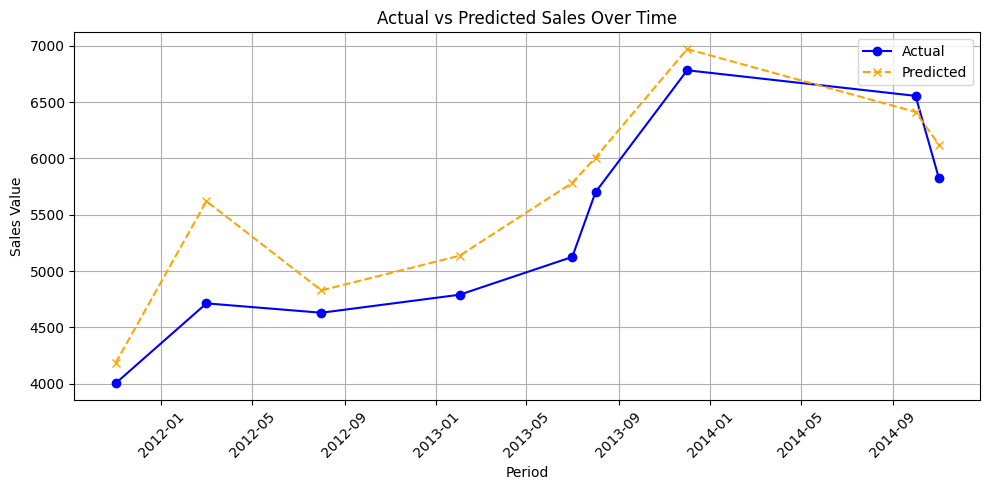

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**XGBoost Algorithm-Brand**

In [ ]:
X = final_merged_df[['Brand_Avg_Price_Per_SU',
                     'Brand_shipment_SU',
                     'Brand_SocialAd_FB_Likes_Digital',
                     'month_3',
                     'month_5',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['Brand_Sales_Value']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
brand_xgboost_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
brand_xgboost_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {brand_xgboost_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {brand_xgboost_mape * 100:.2f}%")

R-squared: 0.8854093143081252
Mean Squared Error: 1412398.2822130574
Root Mean Squared Error: 1188.4436386354455
Mean Absolute Error: 1081.9939843749994
Mean Absolute Percentage Error: 2.83%


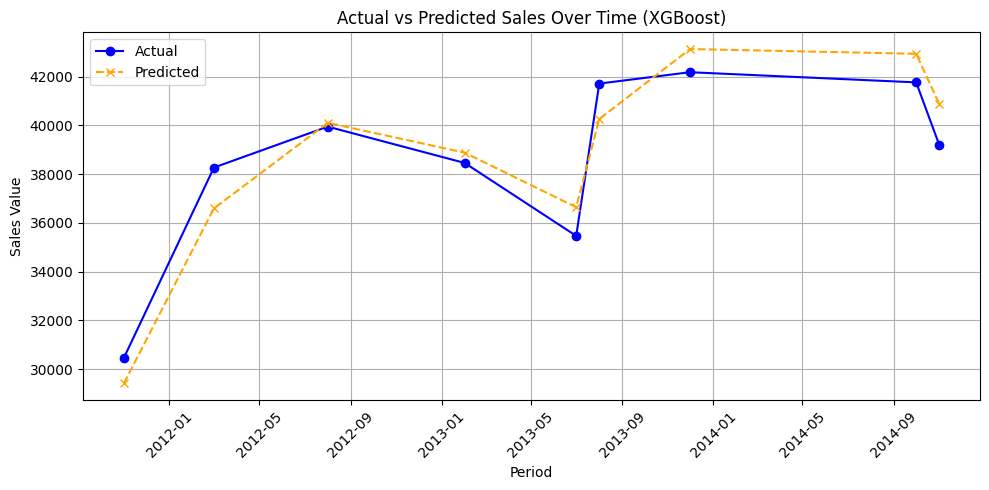

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (XGBoost)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**XGBoost Algorithm-V1**

In [ ]:
X= final_merged_df[['V1_Avg_Price_Per_SU',
                    'V1_NUMD',
                    'V2_NUMD',
                    'V1_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
                    'V1_Adstock',
                    'month_7',
                    'month_8',
                    'month_9'
]]
y = final_merged_df['V1_Sales_Value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
V1_xgboost_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V1_xgboost_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V1_xgboost_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V1_xgboost_mape * 100:.2f}%")

R-squared: 0.4141083415912361
Mean Squared Error: 3253479.1498559793
Root Mean Squared Error: 1803.740322179437
Mean Absolute Error: 1610.5538046875001
Mean Absolute Percentage Error: 9.17%


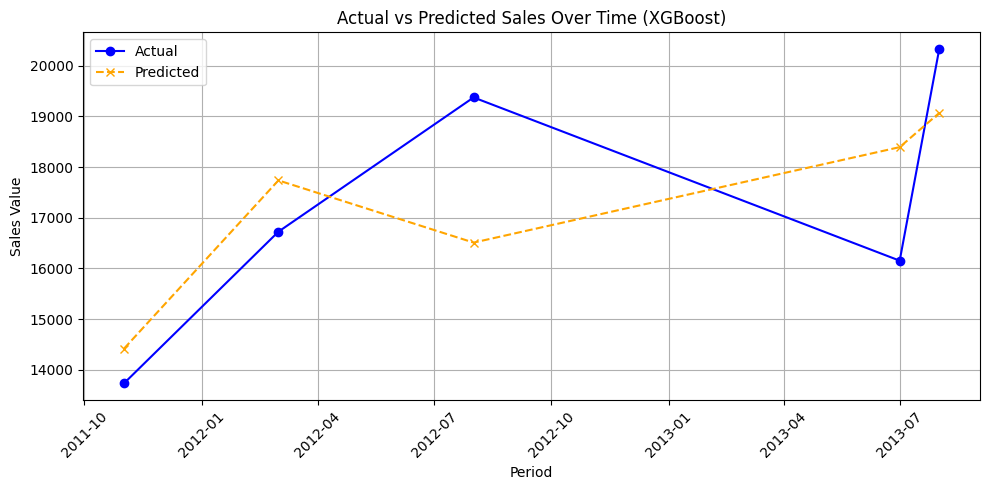

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (XGBoost)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**XGBoost Algorithm-V2**

In [ ]:
X =final_merged_df [['V2_Avg_Price_Per_SU',
                     'V1_TV_Spends_ISP_TV_USM_AOR',
                     'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                     'V1_Adstock',
                     'month_4',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['V2_Sales_Value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
V2_xgboost_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V2_xgboost_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V2_xgboost_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V2_xgboost_mape * 100:.2f}%")

R-squared: -0.11307810159818898
Mean Squared Error: 1379021.1813546824
Root Mean Squared Error: 1174.317325664014
Mean Absolute Error: 1090.6074522569443
Mean Absolute Percentage Error: 7.29%


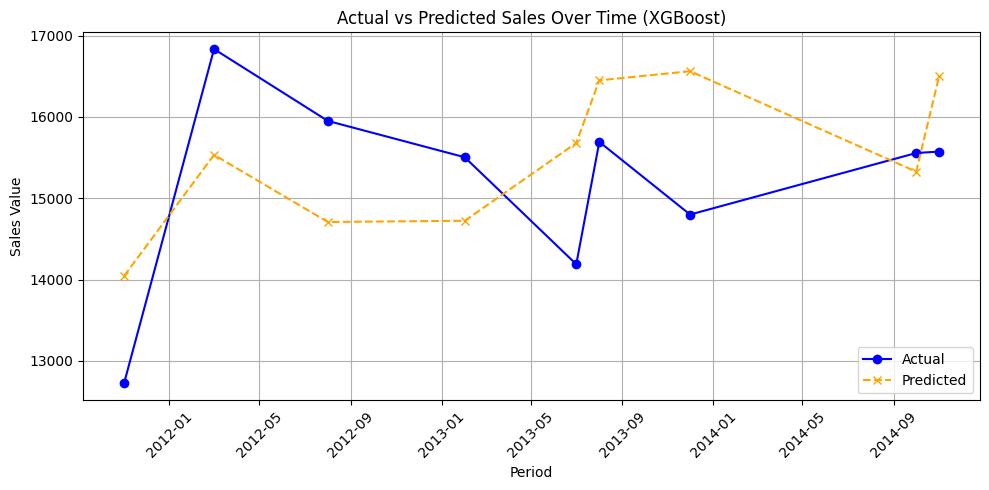

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (XGBoost)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**XGBoost Algorithm-V3**

In [ ]:
X=final_merged_df [['V3_Avg_Price_Per_SU',
                    'V3_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_Adstock',
                    'month_7',
                    'month_1'
]]
y = final_merged_df['V3_Sales_Value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model
V3_xgboost_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V3_xgboost_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V3_xgboost_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V3_xgboost_mape * 100:.2f}%")

R-squared: 0.5998206923563116
Mean Squared Error: 309816.31607162516
Root Mean Squared Error: 556.6114588037378
Mean Absolute Error: 449.61863064236104
Mean Absolute Percentage Error: 8.58%


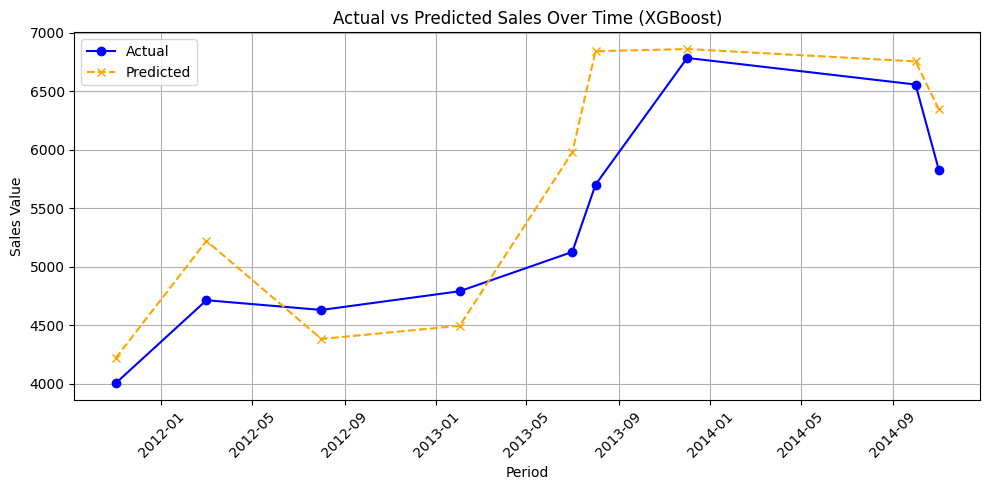

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (XGBoost)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest Algorithm - Brand**

In [ ]:
# Define features (X) and target (y)
X = final_merged_df[['Brand_Avg_Price_Per_SU',
                     'Brand_shipment_SU',
                     'Brand_SocialAd_FB_Likes_Digital',
                     'month_3',
                     'month_5',
                     'month_7',
                     'month_9']]
y = final_merged_df['Brand_Sales_Value']  # Target variable

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Expand trees until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
brand_rf_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
brand_rf_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {brand_rf_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {brand_rf_mape * 100:.2f}%")

R-squared: 0.775468774737219
Mean Squared Error: 2767480.750722407
Root Mean Squared Error: 1663.5746904549874
Mean Absolute Error: 1596.0848777777703
Mean Absolute Percentage Error: 4.18%


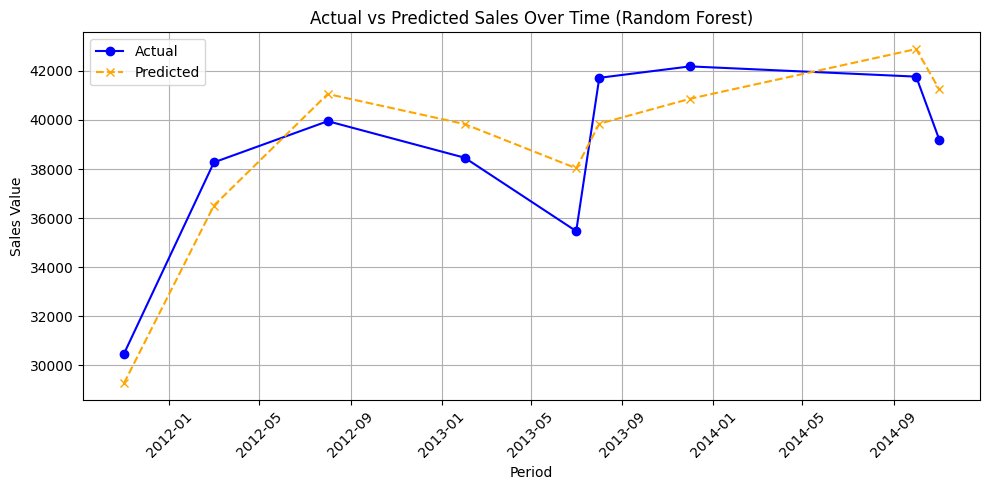

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (Random Forest)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest Algorithm - V1**

In [ ]:
X= final_merged_df[['V1_Avg_Price_Per_SU',
                    'V1_NUMD',
                    'V2_NUMD',
                    'V1_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_TV_GRPs_ISP_TV_Total_GRP_AOR',
                    'V1_Adstock',
                    'month_7',
                    'month_8',
                    'month_9'
]]
y = final_merged_df['V1_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Expand trees until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
V1_rf_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V1_rf_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V1_rf_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V1_rf_mape * 100:.2f}%")

R-squared: 0.25464111105086806
Mean Squared Error: 4139006.8787494884
Root Mean Squared Error: 2034.454934066982
Mean Absolute Error: 1820.475159999997
Mean Absolute Percentage Error: 10.97%


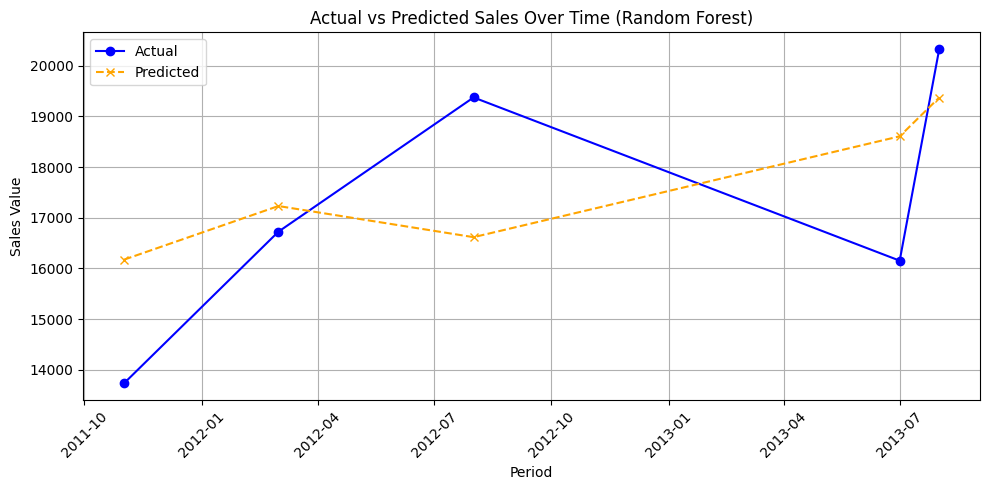

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (Random Forest)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest Algorithm - V2**

In [ ]:
X =final_merged_df [['V2_Avg_Price_Per_SU',
                     'V1_TV_Spends_ISP_TV_USM_AOR',
                     'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                     'V1_Adstock',
                     'month_4',
                     'month_7',
                     'month_9'
]]
y = final_merged_df['V2_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Expand trees until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
V2_rf_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V2_rf_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V2_rf_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V2_rf_mape * 100:.2f}%")

R-squared: 0.1085211997513924
Mean Squared Error: 1104476.0888803115
Root Mean Squared Error: 1050.940573429493
Mean Absolute Error: 900.2785333333322
Mean Absolute Percentage Error: 6.12%


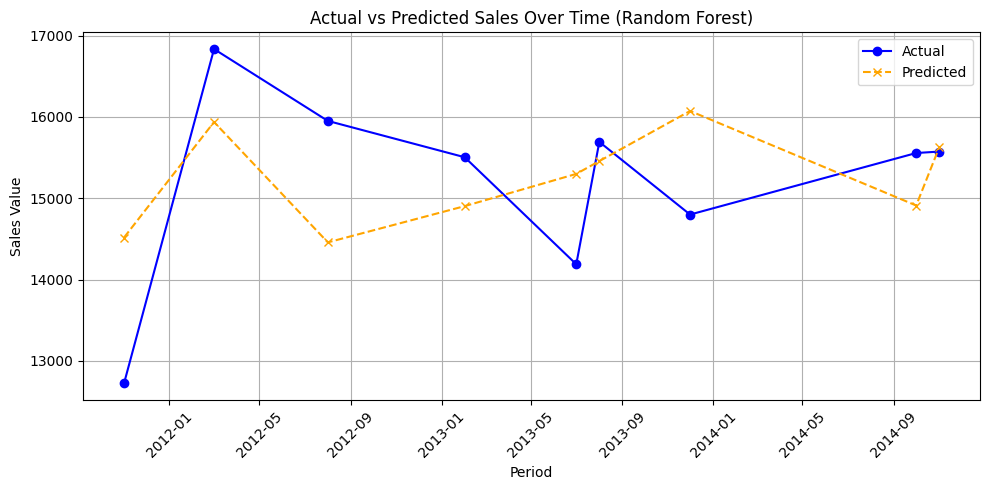

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (Random Forest)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest Algorithm - V3**

In [ ]:
X=final_merged_df [['V3_Avg_Price_Per_SU',
                    'V3_shipment_SU',
                    'V1_iMedia_Total_IMP_Click_No_of_Impressions_Digital',
                    'V1_Adstock',
                    'month_7',
                    'month_1'
]]
y = final_merged_df['V3_Sales_Value']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Expand trees until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
V3_rf_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
V3_rf_mape=mean_absolute_percentage_error(y_test, y_pred)

In [ ]:
# Output evaluation metrics
print(f"R-squared: {V3_rf_r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {V3_rf_mape * 100:.2f}%")

R-squared: 0.7573395524645465
Mean Squared Error: 187866.20016511448
Root Mean Squared Error: 433.4353471570062
Mean Absolute Error: 341.5815444444445
Mean Absolute Percentage Error: 6.61%


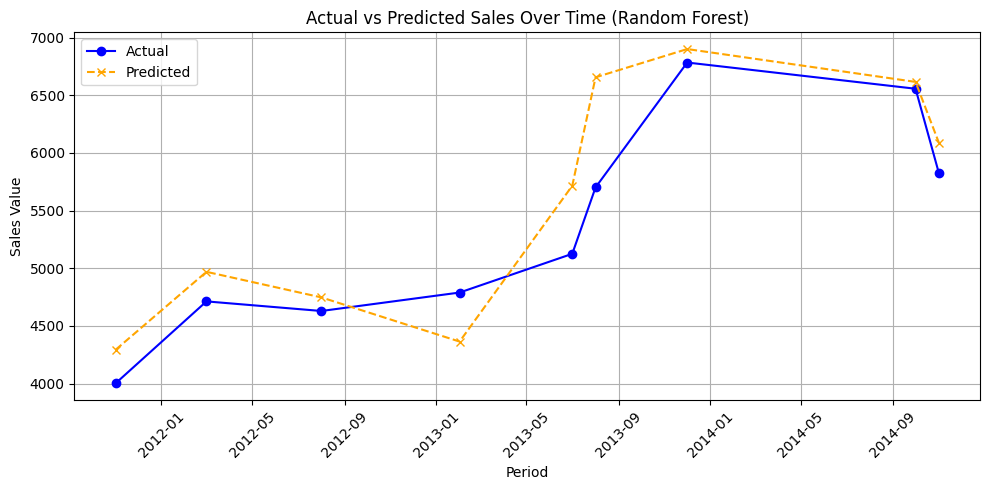

In [ ]:
# Create a DataFrame for actual vs predicted values, including the 'Period' column
results_df = pd.DataFrame({
    'Period': final_merged_df.loc[y_test.index, 'Period'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Period')

# Plotting actual vs predicted values with 'Period' on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(results_df['Period'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Period'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time (Random Forest)')
plt.xlabel('Period')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Performance Comparison Table**

In [ ]:
# Custom formatting function
def format_percentage(x):
  return f'{x * 100:.2f}%'

# Create a dictionary to store the data
results_data = {
    'Brand/Variant': ['Brand', 'V1', 'V2', 'V3'],
    'Linear Regression R^2': [brand_linear_r2, V1_linear_r2, V2_linear_r2, V3_linear_r2],
    'Linear Regression MAPE': [brand_linear_mape, V1_linear_mape, V2_linear_mape, V3_linear_mape],
    'Ridge Regression R^2': [brand_ridge_r2, V1_ridge_r2, V2_ridge_r2, V3_ridge_r2],
    'Ridge Regression MAPE': [brand_ridge_mape, V1_ridge_mape, V2_ridge_mape, V3_ridge_mape],
    'Lasso Regression R^2': [brand_lasso_r2, V1_lasso_r2, V2_lasso_r2, V3_lasso_r2],
    'Lasso Regression MAPE': [brand_lasso_mape, V1_lasso_mape, V2_lasso_mape, V3_lasso_mape],
    'XGBoost R^2': [brand_xgboost_r2, V1_xgboost_r2, V2_xgboost_r2, V3_xgboost_r2],
    'XGBoost MAPE': [brand_xgboost_mape, V1_xgboost_mape, V2_xgboost_mape, V3_xgboost_mape],
    'Random Forest R^2': [brand_rf_r2, V1_rf_r2, V2_rf_r2, V3_rf_r2],
    'Random Forest MAPE': [brand_rf_mape, V1_rf_mape, V2_rf_mape, V3_rf_mape],
}

results_df = pd.DataFrame(results_data)


results_df = results_df.style.format({
    'Linear Regression MAPE': format_percentage,
    'Ridge Regression MAPE': format_percentage,
    'Lasso Regression MAPE': format_percentage,
    'XGBoost MAPE': format_percentage,
    'Random Forest MAPE': format_percentage
})

# Display the formatted table
display(results_df)

**Best Performing models**


*   Brand - Linear Regression
*   V1 - Linear Regression
*   V2 - Ridge Regression
*   V3 - Linear Regression





**Actual vs Predicted Sales for Brand**

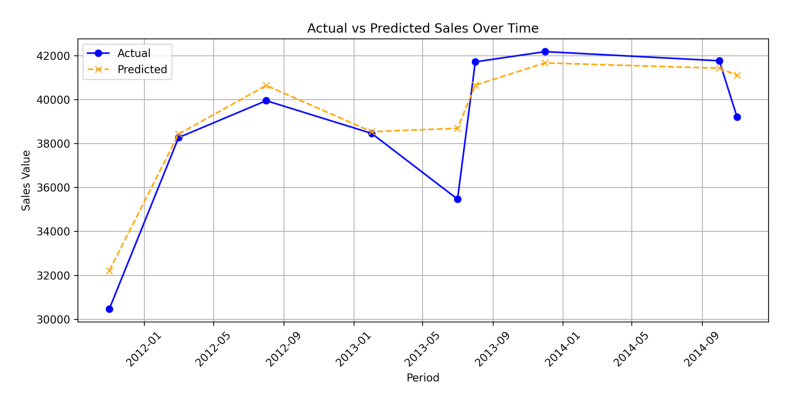

In [ ]:
# Load and display the saved plot
img = mpimg.imread('actual_vs_predicted_brand_model.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

**Actual vs Predicted Sales for V1**

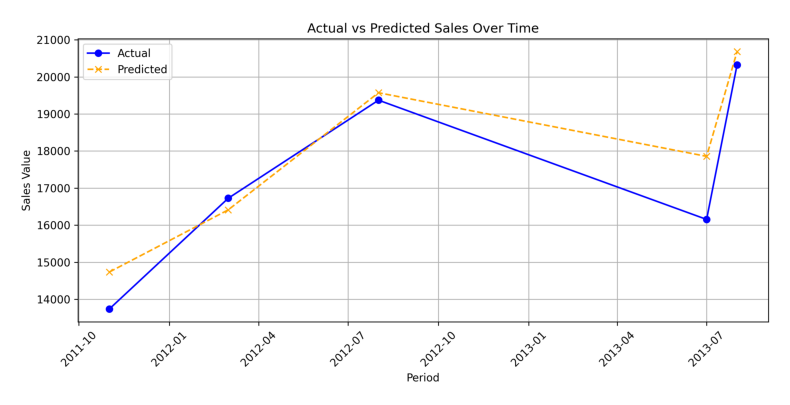

In [ ]:
# Load and display the saved plot
img = mpimg.imread('actual_vs_predicted_V1_model.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

**Actual vs Predicted Sales for V2**

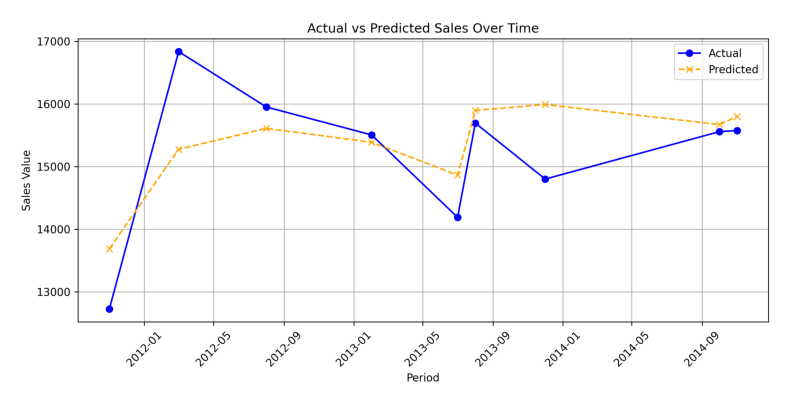

In [ ]:
# Load and display the saved plot
img = mpimg.imread('actual_vs_predicted_V2_model.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

**Actual vs Predicted Sales for V3**

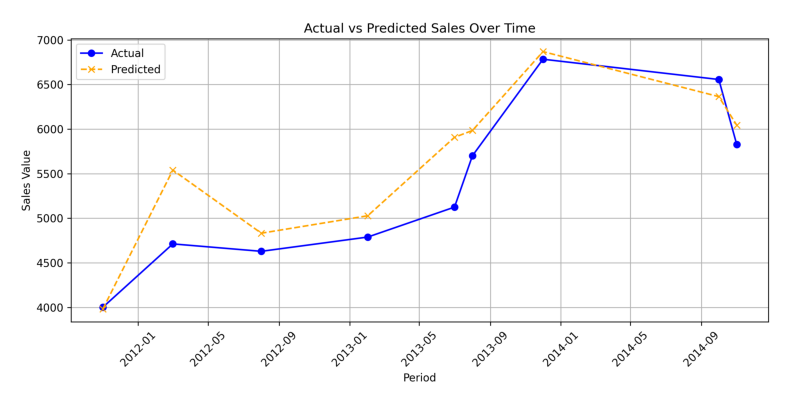

In [ ]:
# Load and display the saved plot
img = mpimg.imread('actual_vs_predicted_V3_model.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Create the DataFrame for plotting contribution chart
brand_df = pd.DataFrame()
brand_df['Variables'] = ['Brand_Avg_Price', 'Brand_shipment', 'Brand_FB_Likes', 'March', 'May', 'July', 'September']
brand_df['Coefficients'] = brand_coef_df['Co-efficient'].abs()
brand_df['Average'] = brand_avg_df['Average']
brand_df['Coef * Avg'] = brand_df['Coefficients'] * brand_df['Average']
total_coef_avg = brand_df['Coef * Avg'].sum()
brand_df['% Contribution'] = brand_df['Coef * Avg'] * 100 / total_coef_avg
brand_df

Variables  Coefficients        Average    Coef * Avg  % Contribution
0  Brand_Avg_Price    118.842173     356.788095  42401.472609       72.590429
1   Brand_shipment      0.043954  132997.959612   5845.756777       10.007813
2   Brand_FB_Likes      0.080135  114265.756098   9156.655051       15.676001
3            March   2478.884179       0.073171    181.381769        0.310522
4              May   3124.652367       0.073171    228.633100        0.391415
5             July   3007.489671       0.097561    293.413626        0.502318
6        September   3122.353298       0.097561    304.619834        0.521503

**Contribution Chart for Brand**

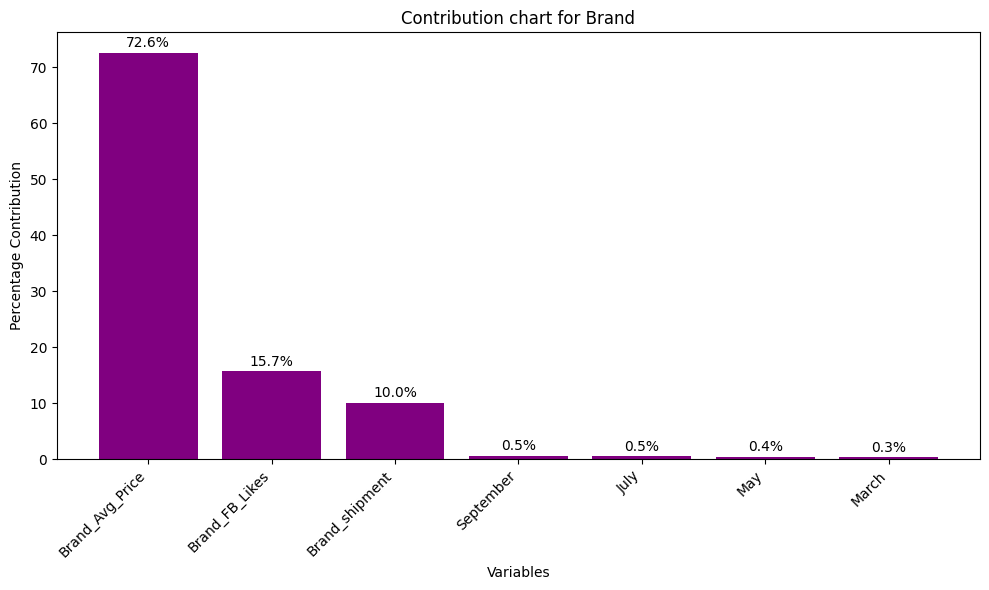

In [ ]:
# Sort the DataFrame by '% Contribution' in descending order
brand_df_sorted = brand_df.sort_values(by='% Contribution', ascending=False).reset_index(drop=True)

# Plotting the Waterfall Chart without the cumulative percentage
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each variable
for i in range(len(brand_df_sorted)):
    if i == 0:
        ax.bar(brand_df_sorted['Variables'][i], brand_df_sorted['% Contribution'][i], color='purple', label='% Contribution')
    else:
        ax.bar(brand_df_sorted['Variables'][i], brand_df_sorted['% Contribution'][i], color='purple')

    # Add labels to the bars
    ax.text(
        brand_df_sorted['Variables'][i],
        brand_df_sorted['% Contribution'][i] + 0.5,  # Position the label above the bar
        f"{brand_df_sorted['% Contribution'][i]:.1f}%",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Contribution chart for Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
# Create the DataFrame for plotting contribution chart
V1_df = pd.DataFrame()
V1_df['Variables'] = ['V1_Avg_Price','V1_NUMD','V2_NUMD','V1_shipment','V1_iMedia_No_of_Impressions','V1_TV_GRP','V1_Adstock_TV_GRP_70%','July','August','September']
V1_df['Coefficients'] = V1_coef_df['Co-efficient'].abs()
V1_df['Average'] = V1_avg_df['Average']
V1_df['Coef * Avg'] = V1_df['Coefficients'] * V1_df['Average']
total_coef_avg = V1_df['Coef * Avg'].sum()
V1_df['% Contribution'] = V1_df['Coef * Avg'] * 100 / total_coef_avg
V1_df

Variables  Coefficients       Average    Coef * Avg  \
0                 V1_Avg_Price     42.606025  3.626144e+02  15449.558583   
1                      V1_NUMD    569.459426  4.770732e+01  27167.381381   
2                      V2_NUMD    928.067086  4.797561e+01  44524.584356   
3                  V1_shipment      0.049376  6.245768e+04   3083.899552   
4  V1_iMedia_No_of_Impressions      0.000009  5.203598e+06     47.953863   
5                    V1_TV_GRP      0.310943  4.013317e+02    124.791130   
6        V1_Adstock_TV_GRP_70%      3.917582  1.303921e+03   5108.218793   
7                         July    465.134456  9.756098e-02     45.378971   
8                       August   1876.614297  9.756098e-02    183.084322   
9                    September    774.146100  9.756098e-02     75.526449   

   % Contribution  
0       16.125141  
1       28.355364  
2       46.471568  
3        3.218753  
4        0.050051  
5        0.130248  
6        5.331592  
7        0.047363  
8        0.191090  
9        0.078829

**Contribution Chart for V1**

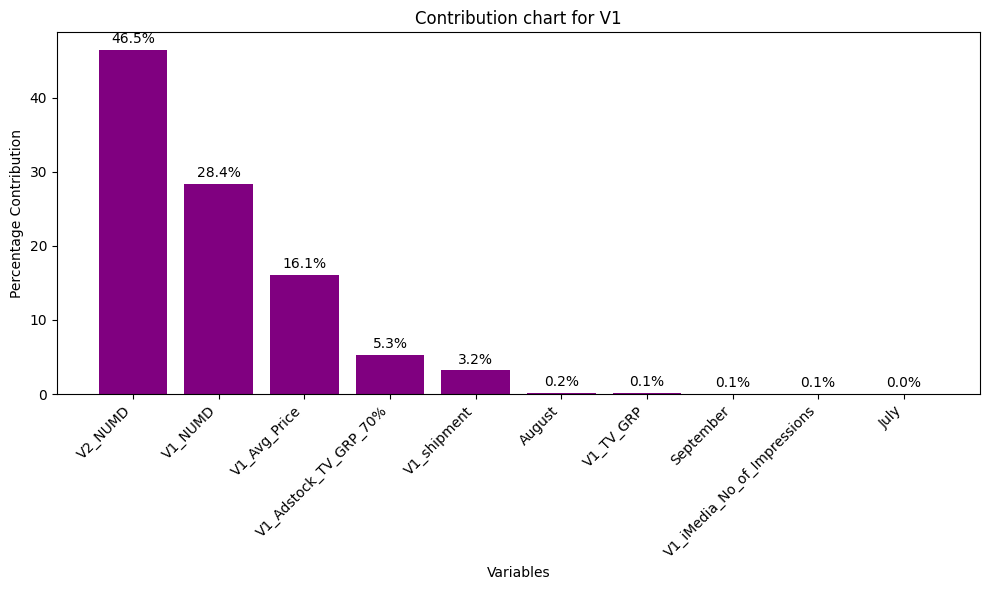

In [ ]:
# Sort the DataFrame by '% Contribution' in descending order
V1_df_sorted = V1_df.sort_values(by='% Contribution', ascending=False).reset_index(drop=True)

# Plotting the Waterfall Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each variable
for i in range(len(V1_df_sorted)):
    if i == 0:
        ax.bar(V1_df_sorted['Variables'][i], V1_df_sorted['% Contribution'][i], color='purple', label='% Contribution')
    else:
        ax.bar(V1_df_sorted['Variables'][i], V1_df_sorted['% Contribution'][i], color='purple')

    # Add labels to the bars
    ax.text(
        V1_df_sorted['Variables'][i],
        V1_df_sorted['% Contribution'][i] + 0.5,  # Position the label above the bar
        f"{V1_df_sorted['% Contribution'][i]:.1f}%",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Contribution chart for V1')
plt.xticks(rotation=45, ha='right')

# Remove the legend
# Remove the line for cumulative percentage
plt.tight_layout()
plt.show()


In [ ]:
# Create the DataFrame for plotting contribution chart
V2_df = pd.DataFrame()
V2_df['Variables'] = ['V2_Avg_Price','V1_TV_Spends','V1_iMedia_No_of_Impressions','V1_Adstock_TV_GRP_70%','April','July','September']
V2_df['Coefficients'] = V2_coef_df['Co-efficient'].abs()
V2_df['Average'] = V2_avg_df['Average']
V2_df['Coef * Avg'] = V2_df['Coefficients'] * V2_df['Average']
total_coef_avg = V2_df['Coef * Avg'].sum()
V2_df['% Contribution'] = V2_df['Coef * Avg'] * 100 / total_coef_avg
V2_df

Variables  Coefficients       Average    Coef * Avg  \
0                 V2_Avg_Price     59.396777  3.271898e+02  19434.019226   
1                 V1_TV_Spends      7.524248  2.137642e+01    160.841482   
2  V1_iMedia_No_of_Impressions      0.000014  5.203598e+06     74.438066   
3        V1_Adstock_TV_GRP_70%      0.388872  1.303921e+03    507.058425   
4                        April    140.800895  7.317073e-02     10.302504   
5                         July   1103.553022  9.756098e-02    107.663709   
6                    September    252.993929  9.756098e-02     24.682335   

   % Contribution  
0       95.644538  
1        0.791581  
2        0.366347  
3        2.495488  
4        0.050704  
5        0.529867  
6        0.121474

**Contribution Chart for V2**

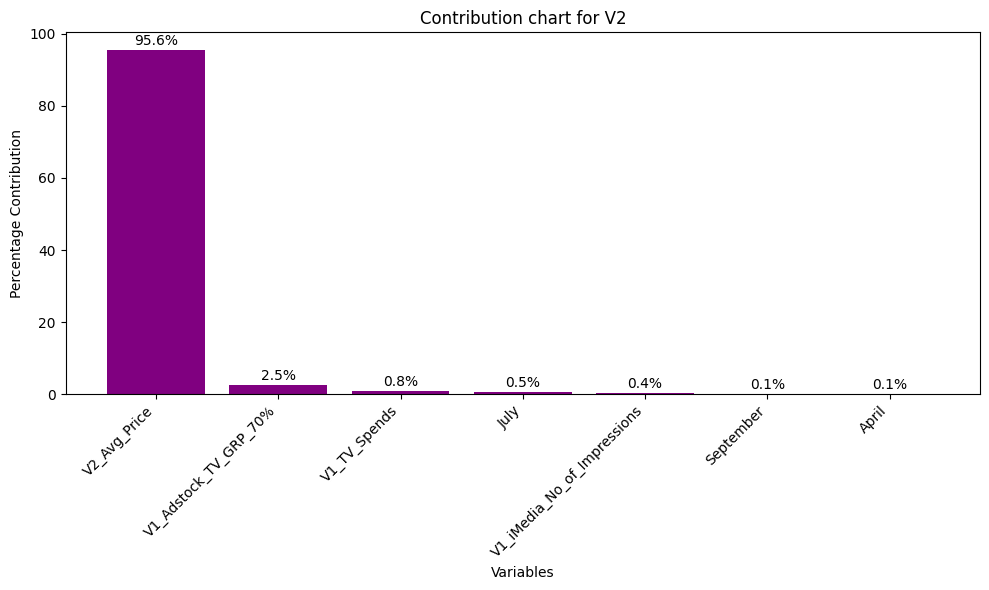

In [ ]:
# Sort the DataFrame by '% Contribution' in descending order
V2_df_sorted = V2_df.sort_values(by='% Contribution', ascending=False).reset_index(drop=True)

# Plotting the Waterfall Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each variable
for i in range(len(V2_df_sorted)):
    if i == 0:
        ax.bar(V2_df_sorted['Variables'][i], V2_df_sorted['% Contribution'][i], color='purple', label='% Contribution')
    else:
        ax.bar(V2_df_sorted['Variables'][i], V2_df_sorted['% Contribution'][i], color='purple')

    # Add labels to the bars
    ax.text(
        V2_df_sorted['Variables'][i],
        V2_df_sorted['% Contribution'][i] + 0.5,  # Position the label above the bar
        f"{V2_df_sorted['% Contribution'][i]:.1f}%",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Contribution chart for V2')
plt.xticks(rotation=45, ha='right')

# Remove the cumulative percentage line and labels
# Remove the legend
plt.tight_layout()
plt.show()



In [ ]:
# Create the DataFrame for plotting contribution chart
V3_df = pd.DataFrame()
V3_df['Variables'] = ['V3_Avg_Price','V3_shipment','V1_iMedia_No_of_Impressions','V1_Adstock_TV_GRP_70%','July','January']
V3_df['Coefficients'] = V3_coef_df['Co-efficient'].abs()
V3_df['Average'] = V3_avg_df['Average']
V3_df['Coef * Avg'] = V3_df['Coefficients'] * V3_df['Average']
total_coef_avg = V3_df['Coef * Avg'].sum()
V3_df['% Contribution'] = V3_df['Coef * Avg'] * 100 / total_coef_avg

V3_df

Variables  Coefficients       Average   Coef * Avg  \
0                 V3_Avg_Price     20.700996  4.511267e+02  9338.771474   
1                  V3_shipment      0.188256  1.143121e+04  2151.993078   
2  V1_iMedia_No_of_Impressions      0.000082  5.203598e+06   427.155012   
3        V1_Adstock_TV_GRP_70%      0.730276  1.303921e+03   952.222910   
4                         July    153.304722  9.756098e-02    14.956558   
5                      January    657.835736  7.317073e-02    48.134322   

   % Contribution  
0       72.207554  
1       16.639250  
2        3.302770  
3        7.362605  
4        0.115644  
5        0.372175

**Contribution Chart for V3**

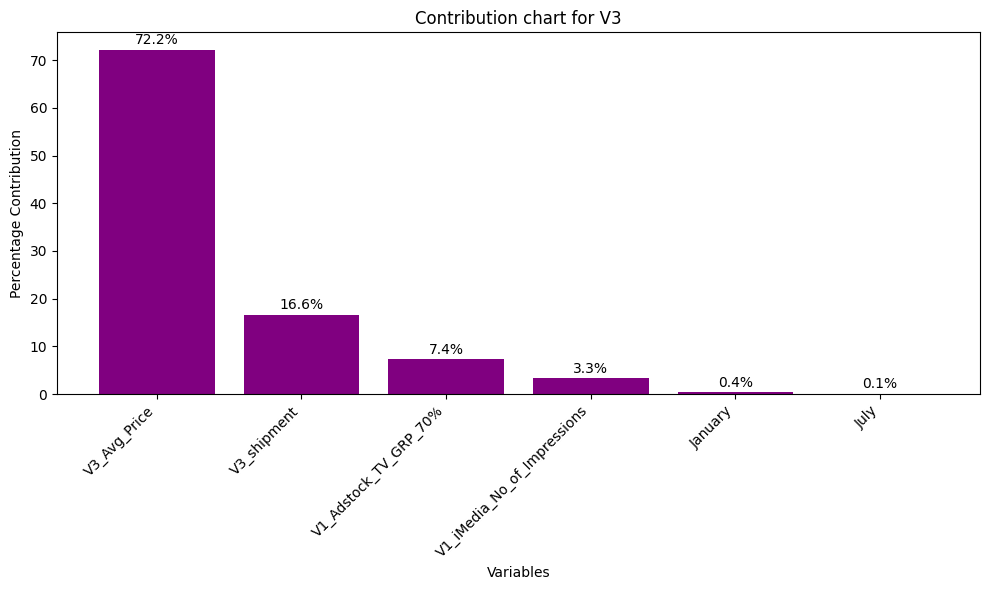

In [ ]:
# Sort the DataFrame by '% Contribution' in descending order
V3_df_sorted = V3_df.sort_values(by='% Contribution', ascending=False).reset_index(drop=True)

# Plotting the Waterfall Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each variable
for i in range(len(V3_df_sorted)):
    if i == 0:
        ax.bar(V3_df_sorted['Variables'][i], V3_df_sorted['% Contribution'][i], color='purple')
    else:
        ax.bar(V3_df_sorted['Variables'][i], V3_df_sorted['% Contribution'][i], color='purple')

    # Add labels to the bars
    ax.text(
        V3_df_sorted['Variables'][i],
        V3_df_sorted['% Contribution'][i] + 0.5,  # Position the label above the bar
        f"{V3_df_sorted['% Contribution'][i]:.1f}%",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Customize the chart
ax.set_xlabel('Variables')
ax.set_ylabel('Percentage Contribution')
ax.set_title('Contribution chart for V3')
plt.xticks(rotation=45, ha='right')

# Remove the cumulative percentage line and labels
# Remove the legend
plt.tight_layout()
plt.show()

